# Exploratory  Data Analysis : 2019

# Introduction
In this notebook we are going to check if amount of loan approved has anything to do with the race of the person. To achive this we are going to check the correlation of the columns with race of borrower and try find any patterns that relate to race. 

## Import relevant Packages

In [52]:
#Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Importing the data from Data from DW step

In [53]:
#Read Data
df_2019=pd.read_csv('Data/2019_dw_data.csv')

In [54]:
#Exploring the data
df_2019.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Year,2019,2019,2019,2019,2019
LoanCharacteristicsID,2407198,2407199,2407200,2407201,2407202
Bank,Boston,Boston,Boston,Boston,Boston
FIPSStateNumericCode,50,50,50,50,23
FIPSCountyCode,7,7,15,17,31
CoreBasedStatisticalAreaCode,15540,15540,99999,30100,38860
CensusTractIdentifier,34,29,9532,9594,254
CensusTractMinorityRatioPercent,4.577,3.421,6.152,3.935,6.031
CensusTractMedFamIncomeAmount,132474,100795,49625,62643,87679


In [55]:
#Drop Unnamed:0 column
df_2019=df_2019.iloc[:,1:]

In [56]:
#Check the shape of the DataFrame
df_2019.shape

(89767, 54)

In [57]:
#Check tha data again
df_2019.head().transpose()

,0,1,2,3,4
Year,2019,2019,2019,2019,2019
LoanCharacteristicsID,2407198,2407199,2407200,2407201,2407202
Bank,Boston,Boston,Boston,Boston,Boston
FIPSStateNumericCode,50,50,50,50,23
FIPSCountyCode,7,7,15,17,31
CoreBasedStatisticalAreaCode,15540,15540,99999,30100,38860
CensusTractIdentifier,34,29,9532,9594,254
CensusTractMinorityRatioPercent,4.577,3.421,6.152,3.935,6.031
CensusTractMedFamIncomeAmount,132474,100795,49625,62643,87679
LocalAreaMedianIncomeAmount,84290,84290,67566,67105,76445


## Check Borrower Count
- Check the number of borrowers to see how many borrowers are assigned to each loan. 

In [58]:
#Check the Borrower Counts using value counts.
df_2019['BorrowerCount'].value_counts()

2    51372
1    37910
3      401
4       83
5        1
Name: BorrowerCount, dtype: int64

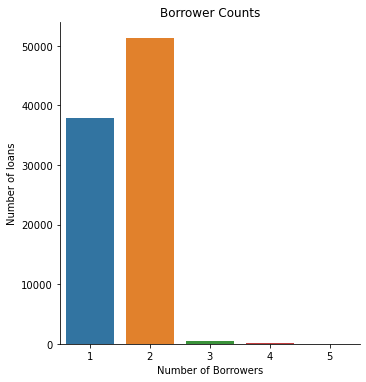

In [59]:
#Plot Borrower count
sns.catplot(x="BorrowerCount", kind="count", data=df_2019)
plt.xlabel('Number of Borrowers')
plt.ylabel('Number of loans')
plt.title("Borrower Counts")
plt.show()

Hence most of the loans have one and two borrowers. Therefore we will focus on the race of borrower1 and borrower2 only since most probably race of only first 2 borrower will contribute to the biases if there is any.

## Check race count of Borrower 1 and Borrower 2:  Borrower1Race1Type ,Borrower2Race1Type
We will check the frequency of the races of these two borrowers.

In [60]:
#Check the Borrower Counts using value counts. 
#Numeric code indicating the race of the Borrower. 1=American Indian or Alaska Native, 2=Asian, 
#3=Black or African American, 4=Native Hawaiian or other Pacific Islander, 
#5=White, 6=Information not provided by Borrower, 
#7=Not Applicable (First or primary borrower is an institution, corporation or partnership)
df_2019['Borrower1Race1Type'].value_counts()

5    76982
6     7352
2     3128
3     1677
1      516
4      112
Name: Borrower1Race1Type, dtype: int64

In [61]:
#Repplace values with names
df_2019=df_2019.replace({'Borrower1Race1Type': {1:'American Indian', 2:'Asian', 3:'Black', 4:'Native Hawaiian', 5:'White', 6:'No Information', 7:'Not Applicable'}})

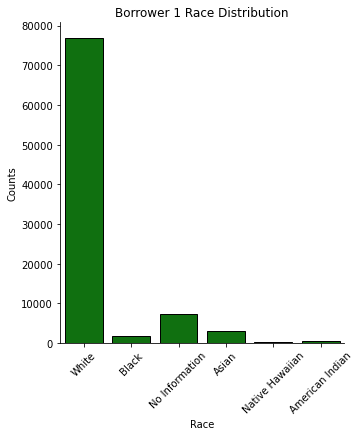

In [62]:
#Check Visually
#df_2019['Borrower1Race1Type'].hist()
sns.catplot(x="Borrower1Race1Type", kind="count",color='g',edgecolor="black", data=df_2019)
plt.xlabel('Race')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
plt.title("Borrower 1 Race Distribution")
plt.show()

Hence most of the borrower1 are of white race and arond 7000 borrowers did not provide any information.

In [63]:
#Borrower 2
#Numeric code indicating the race of the Co-Borrower. 1=American Indian or Alaska Native, 2=Asian, 
#3=Black or African American, 4=Native Hawaiian or other Pacific Islander, 5=White, 
#6=Information not provided by borrower, 
#7=Not Applicable (First or primary borrower is an institution, corporation or partnership), 8=No Co-Borrower
df_2019['Borrower2Race1Type'].value_counts()

5    44821
8    37965
6     4502
2     1577
3      638
1      199
4       64
7        1
Name: Borrower2Race1Type, dtype: int64

In [64]:
#Replace code with names 
#Repplace values with names
df_2019=df_2019.replace({'Borrower2Race1Type': {1:'American Indian', 2:'Asian', 3:'Black', 4:'Native Hawaiian', 5:'White', 6:'No Information', 7:'Not Applicable',8:'No Co-Borrower'}})

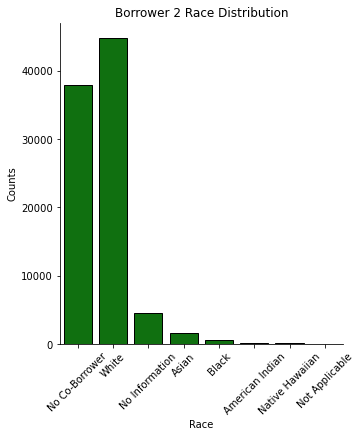

In [65]:
#Check Visually
sns.catplot(x="Borrower2Race1Type", kind="count",color='g',edgecolor="black", data=df_2019)
plt.xlabel('Race')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
plt.title("Borrower 2 Race Distribution")
plt.show()

Hence most of the borrower2 are of white race and around 38000 loans don't have co-borrower.

## Check Banks according to there race distribuation.

In [66]:
#Bank Frequency
df_2019['Bank'].value_counts()

Chicago          22462
Topeka           16093
Des Moines       14468
Cincinnati       11250
Dallas            8069
Indianapolis      5677
Pittsburgh        4458
Boston            2824
San Francisco     2487
New York          1979
Name: Bank, dtype: int64

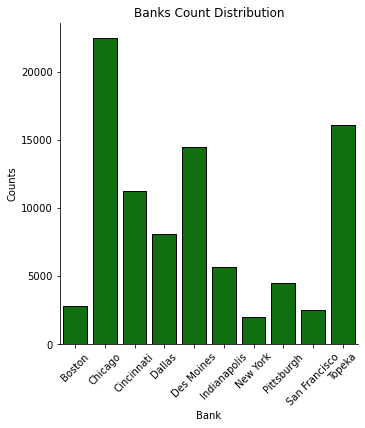

In [67]:
#Check the distribuation of banks Visually
sns.catplot(x="Bank", kind="count",color='g',edgecolor="black", data=df_2019)
plt.xlabel('Bank')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
plt.title("Banks Count Distribution")
plt.show()

Hence most Banks are from Chicago,Topeka and Des Moines. 
Now Lets Check the distribuation of races in each city.

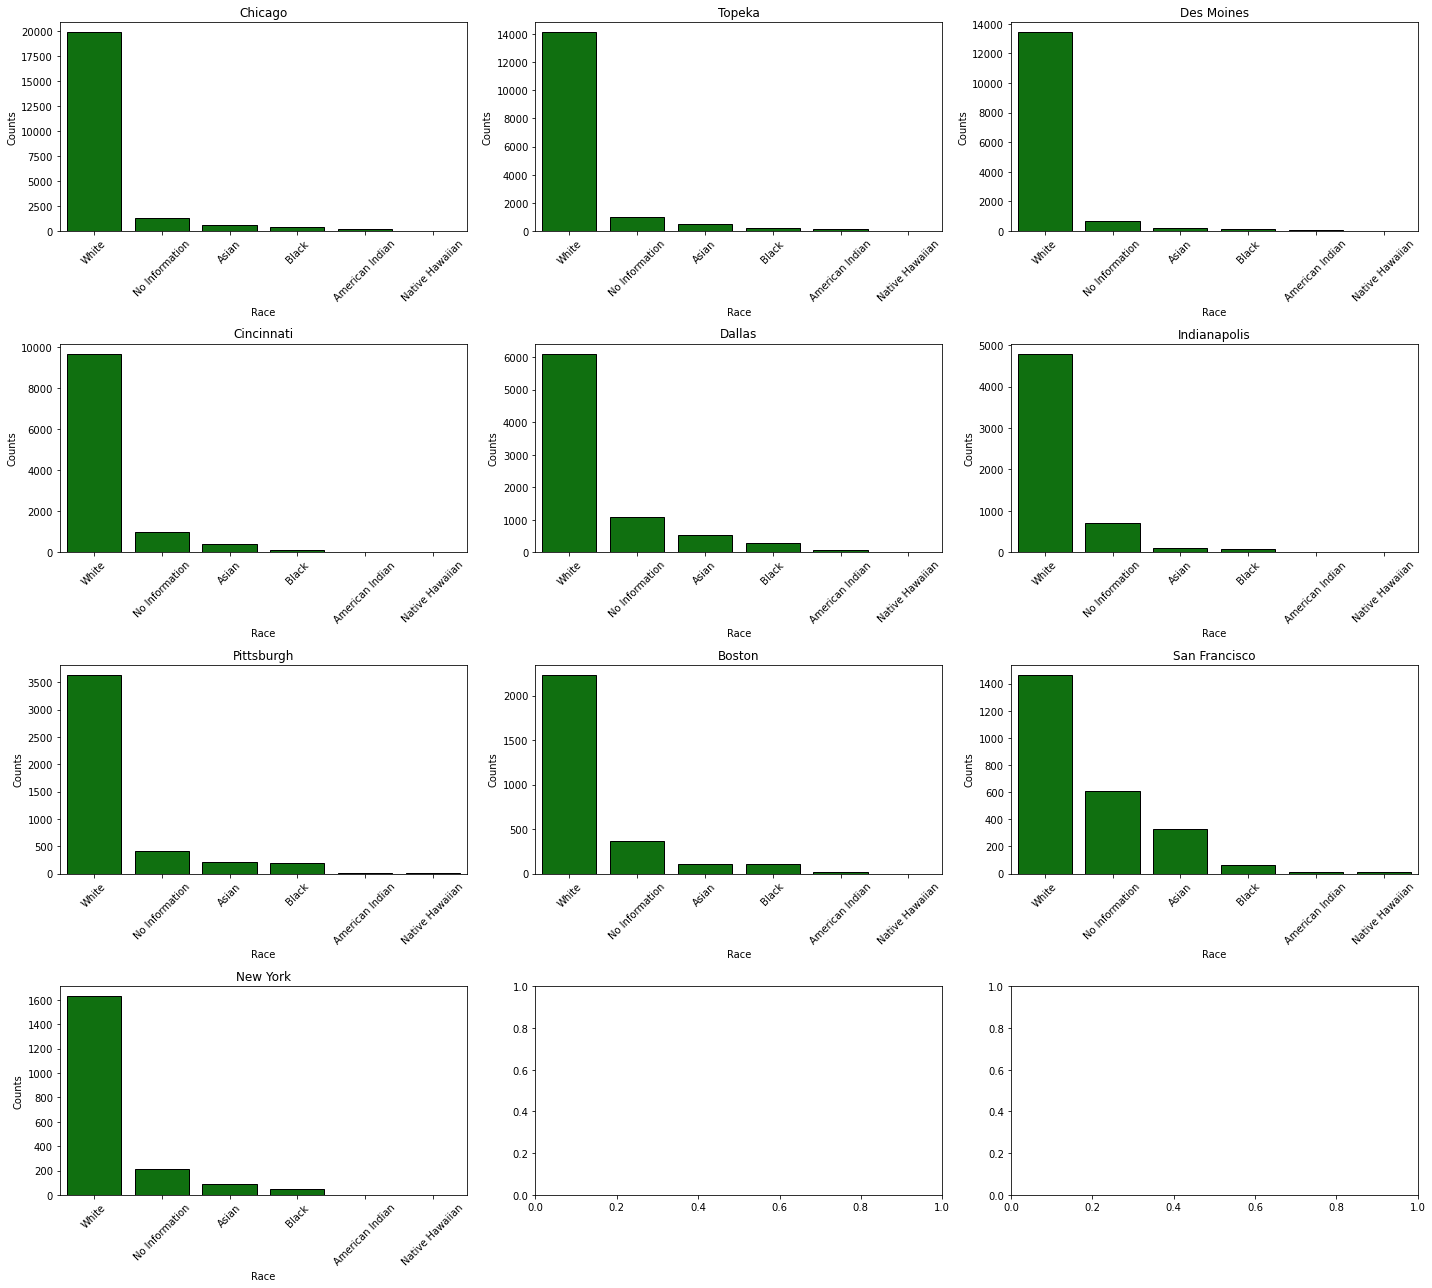

In [68]:
#View distribuation of races in all cities.
r=0
c=0
f, axes = plt.subplots(4, 3,figsize = (20,18))
for bank in ['Chicago','Topeka','Des Moines','Cincinnati','Dallas','Indianapolis','Pittsburgh','Boston','San Francisco','New York']:
    if c>2:
        r=r+1
        c=0
    sns.countplot(x="Borrower1Race1Type",color='g',edgecolor="black", data=df_2019[df_2019['Bank']==bank],order=df_2019["Borrower1Race1Type"].value_counts().index,ax=axes[r, c])
    axes[r, c].set_xlabel('Race')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(bank)
    c=c+1
f.tight_layout()
plt.show() 

Hence all the cities have majority of white borrowers to whom loan was approved.Lets check the distribuation of co-borrowers. 

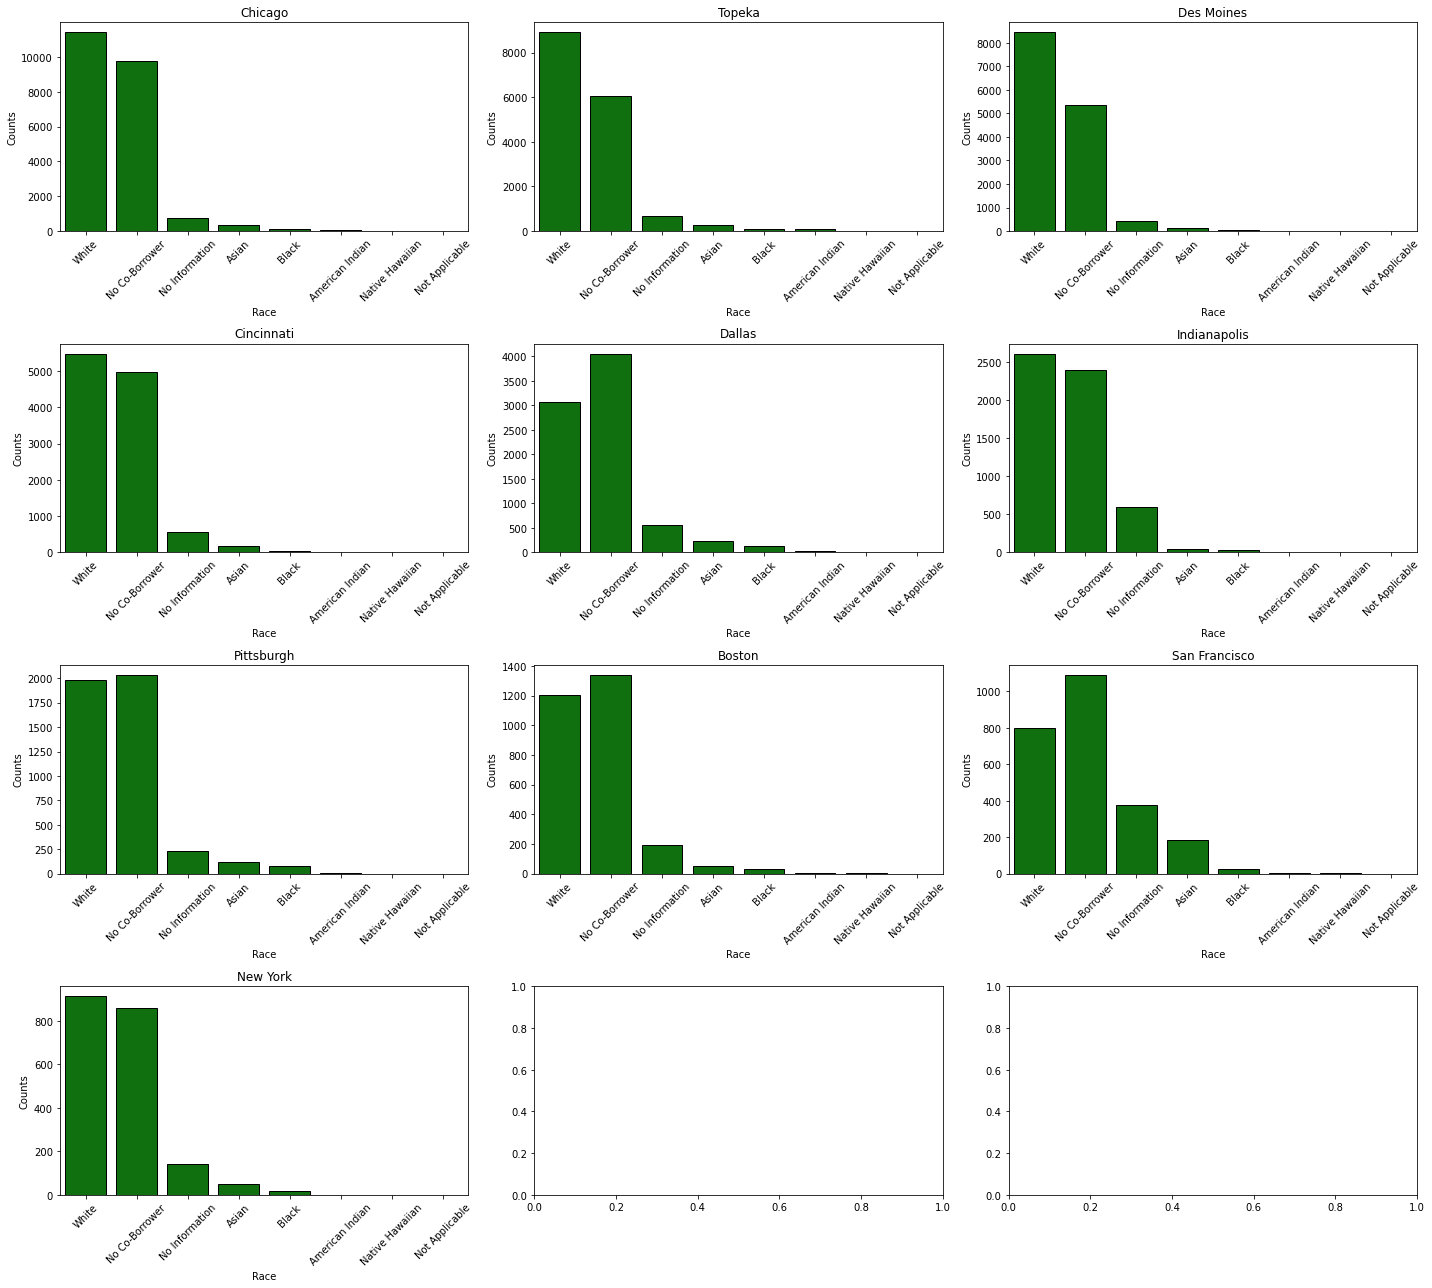

In [69]:
#View distribuation of races for co-borrowers.
r=0
c=0
f, axes = plt.subplots(4, 3,figsize = (20,18))
for bank in ['Chicago','Topeka','Des Moines','Cincinnati','Dallas','Indianapolis','Pittsburgh','Boston','San Francisco','New York']:
    if c>2:
        r=r+1
        c=0
    sns.countplot(x="Borrower2Race1Type",color='g',edgecolor="black", data=df_2019[df_2019['Bank']==bank],order=df_2019["Borrower2Race1Type"].value_counts().index,ax=axes[r, c])
    axes[r, c].set_xlabel('Race')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(bank)
    c=c+1
f.tight_layout()
plt.show() 

We see similar pattern in the distribuation of co-borrowers. Majority of co-borrowers are white in all the above cities.

## Lets check the statewise race distribuation

In [70]:
#Bank Frequency
df_2019['FIPSStateNumericCode'].value_counts()

55    10747
17     6843
39     6748
19     5782
20     5004
6      4910
18     4409
48     4409
31     4403
29     3628
27     3471
8      2734
42     2300
26     2197
25     2077
21     1502
46     1451
36     1377
51     1243
40     1197
12     1085
47      930
34      859
37      839
4       839
16      810
22      754
13      735
5       730
24      623
53      593
41      587
49      577
1       381
9       305
32      297
23      275
35      264
45      237
54      208
44      187
28      177
38      162
30      157
11      151
50      148
33      138
56      125
10       85
15       54
2        17
66        6
Name: FIPSStateNumericCode, dtype: int64

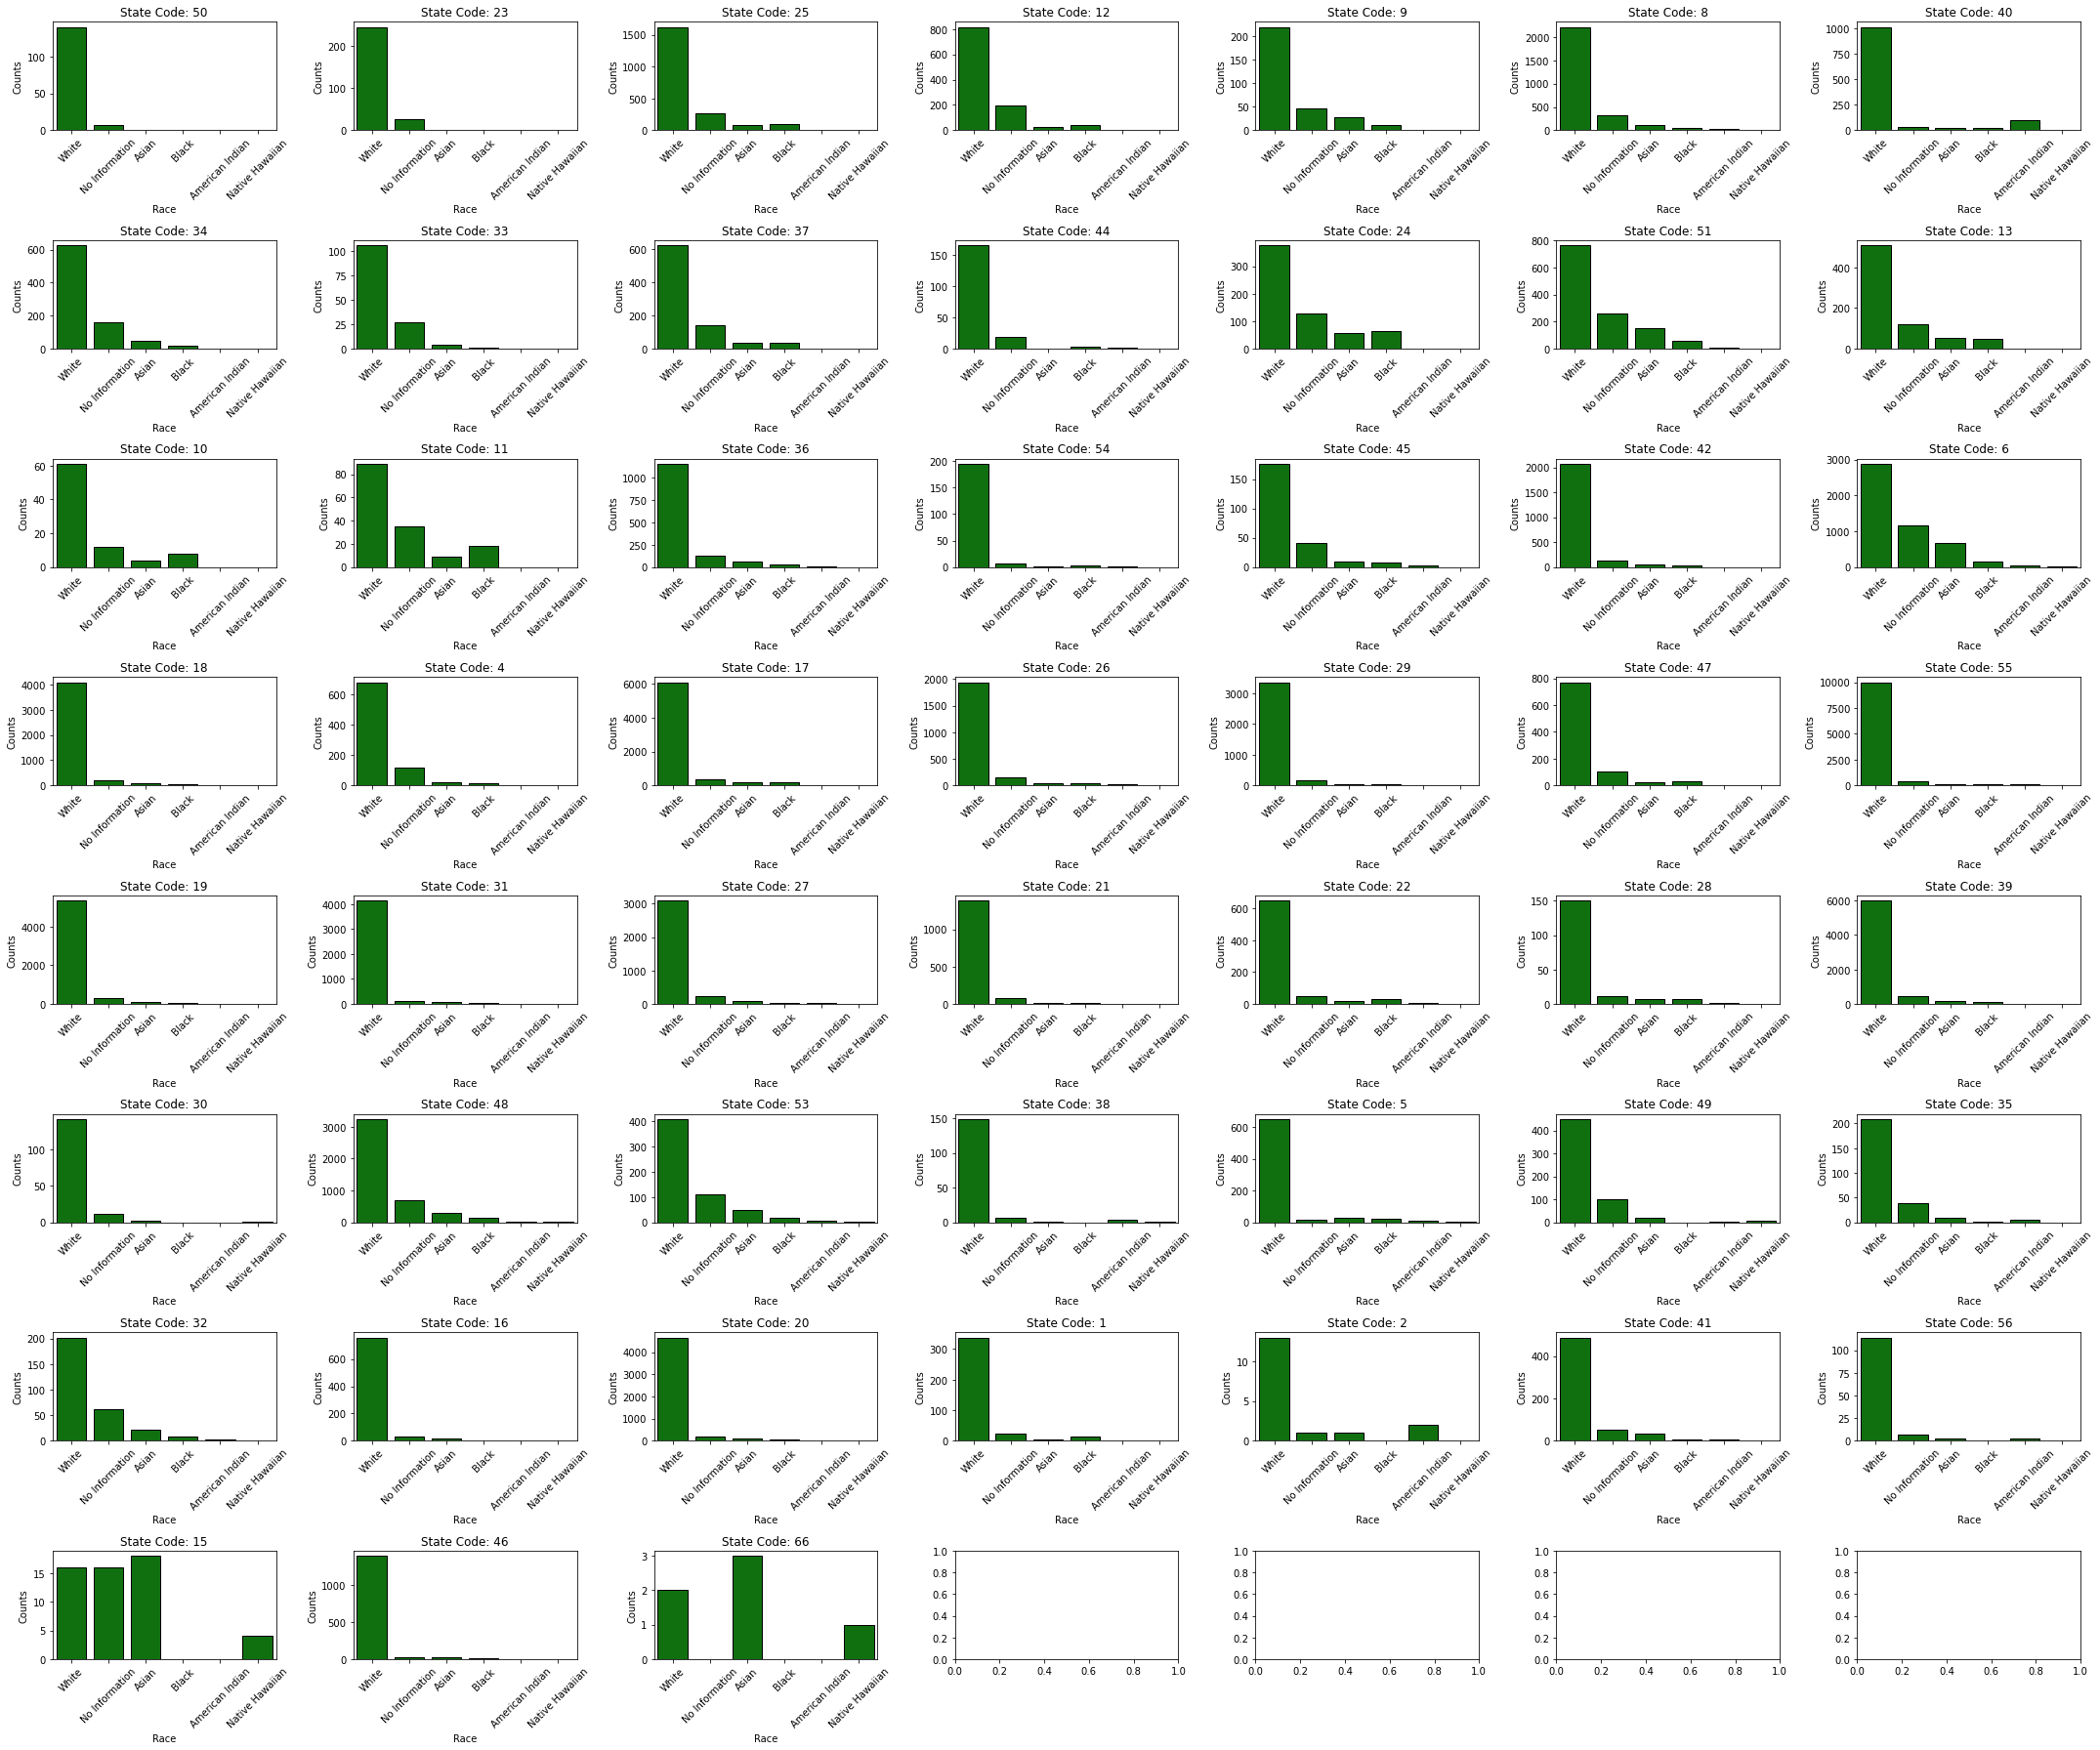

In [71]:
#Lets see statewise distribuation of races for Borrower1.
r=0
c=0
f, axes = plt.subplots(8, 7,figsize = (30,25))
for state_code in df_2019['FIPSStateNumericCode'].unique():
    if c>6:
        r=r+1
        c=0
    sns.countplot(x="Borrower1Race1Type",color='g',edgecolor="black", data=df_2019[df_2019['FIPSStateNumericCode']==state_code],order = df_2019['Borrower1Race1Type'].value_counts().index,ax=axes[r, c])
    axes[r, c].set_xlabel('Race')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title("State Code: " +str(state_code))
    c=c+1
f.tight_layout()
plt.show()

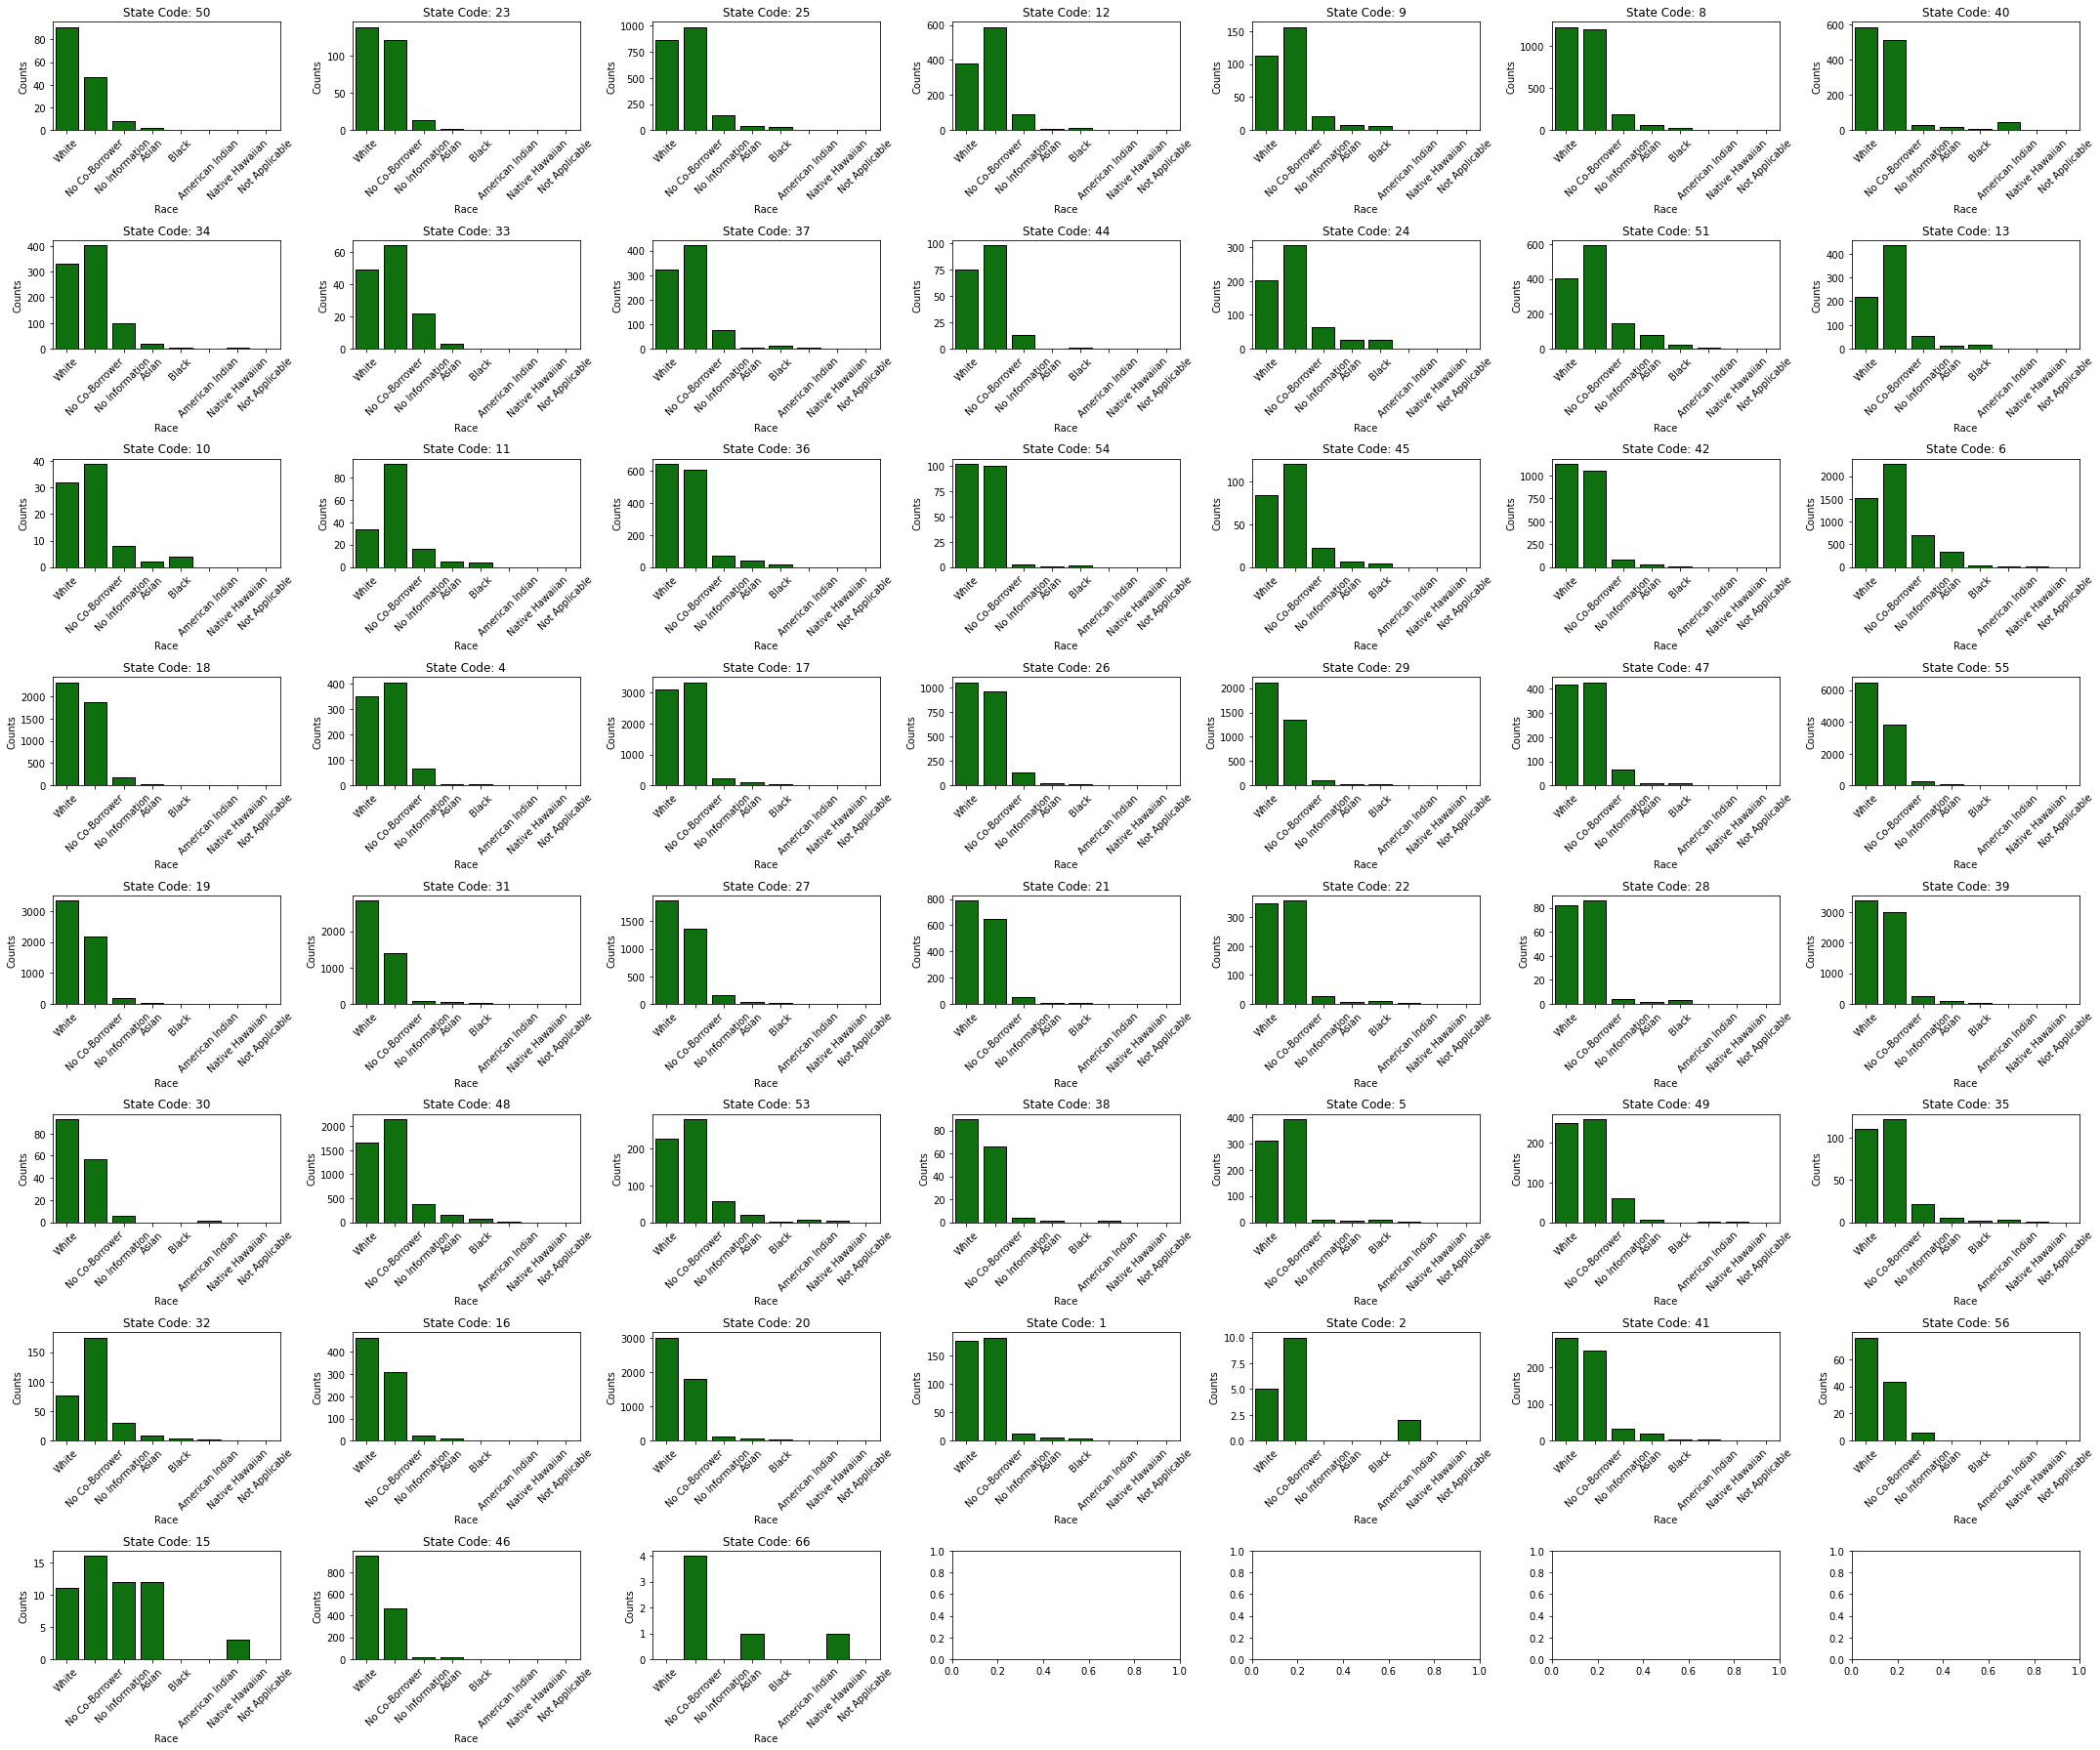

In [72]:
#Lets see statewise distribuation of races for Borrower2.
r=0
c=0
f, axes = plt.subplots(8, 7,figsize = (30,25))
for state_code in df_2019['FIPSStateNumericCode'].unique():
    if c>6:
        r=r+1
        c=0
    sns.countplot(x="Borrower2Race1Type",color='g',edgecolor="black", data=df_2019[df_2019['FIPSStateNumericCode']==state_code],order = df_2019['Borrower2Race1Type'].value_counts().index,ax=axes[r, c])
    axes[r, c].set_xlabel('Race')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title("State Code: " +str(state_code))
    c=c+1
f.tight_layout()
plt.show()

Hence all states have majority of loan borrowers are white except states with state code 15 and 66 where majority of borrowers are asians.But these states are have low numbers of loan approved.

## Lets check the percetage of minority population in the approved loan area to check if the high percentage area have proportionate number of loan are approved or not.
We are assuming that majority population is white and minority population are all the other races.(The percentage of the property's census tract population that is minority.)

In [73]:
df_2019[df_2019['CensusTractMinorityRatioPercent']>50]['CensusTractMinorityRatioPercent'].value_counts()

59.574    42
52.244    23
54.000    22
56.000    21
53.000    19
          ..
93.054     1
88.710     1
70.669     1
84.333     1
65.170     1
Name: CensusTractMinorityRatioPercent, Length: 3802, dtype: int64

In [74]:
other_race=["Asian","Black","American Indian","Native Hawaiian"]
df_temp=df_2019[df_2019["Borrower1Race1Type"].isin(other_race)]
df_2019['Borrower1Race1Type_others']=df_2019["Borrower1Race1Type"]
for race in other_race:
    df_2019["Borrower1Race1Type_others"].replace(race,"Other Races",inplace=True)

In [75]:
df_2019["Borrower1Race1Type_others"].value_counts()

White             76982
No Information     7352
Other Races        5433
Name: Borrower1Race1Type_others, dtype: int64

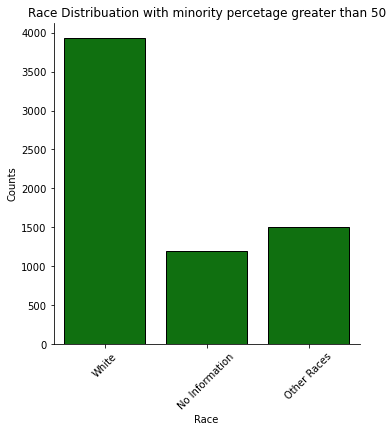

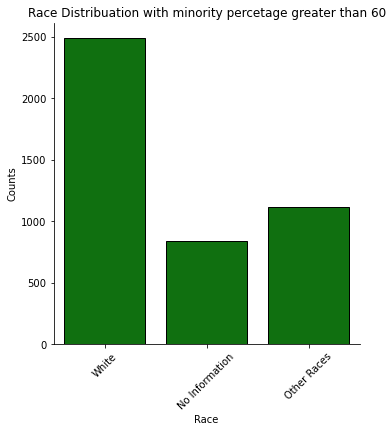

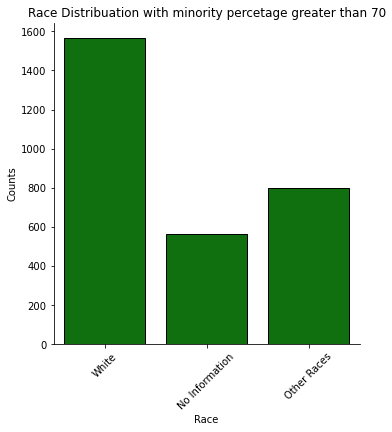

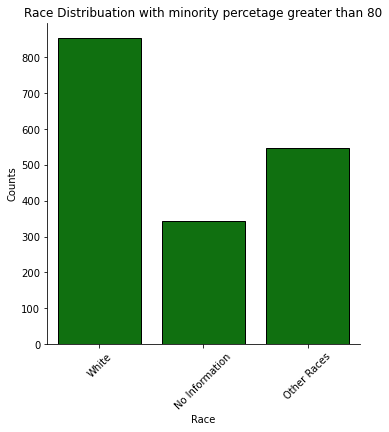

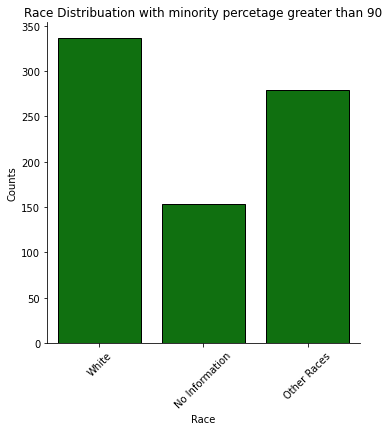

In [76]:
#Let visuallize the distribuation of races  of borrowers of loans which were approved from high minority percentage area.
for percentage in [50,60,70,80,90]:
    sns.catplot(x="Borrower1Race1Type_others", kind="count",color='g',edgecolor="black", data=df_2019[df_2019['CensusTractMinorityRatioPercent']>percentage],order=df_2019["Borrower1Race1Type_others"].value_counts().index)
    plt.xlabel('Race')
    plt.ylabel('Counts')
    plt.xticks(rotation = 45)
    plt.title("Race Distribuation with minority percetage greater than "+str(percentage))
    plt.show()

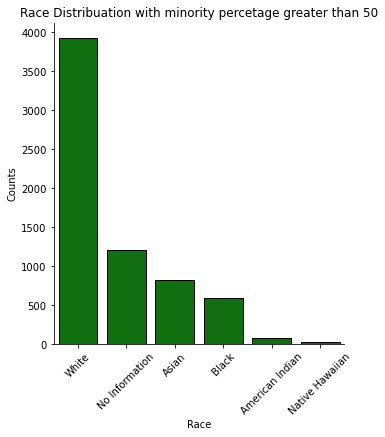

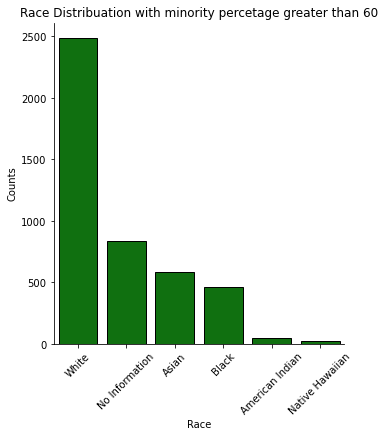

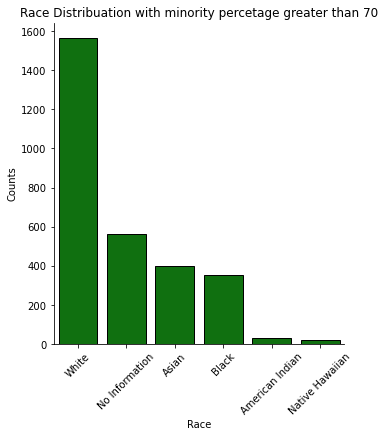

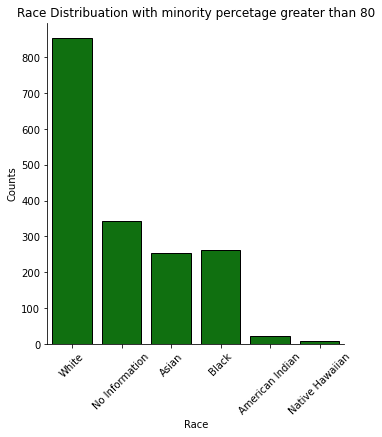

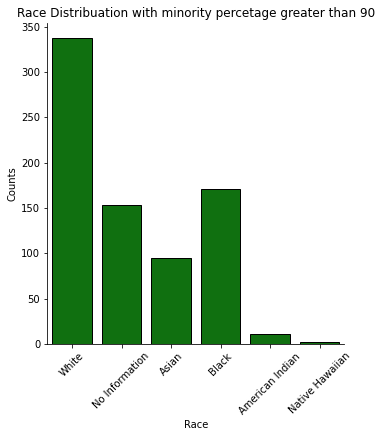

In [77]:
#Let visuallize the distribuation of races  of borrowers of loans which were approved from high minority percentage area.
for percentage in [50,60,70,80,90]:
    sns.catplot(x="Borrower1Race1Type", kind="count",color='g',edgecolor="black", data=df_2019[df_2019['CensusTractMinorityRatioPercent']>percentage],order=df_2019["Borrower1Race1Type"].value_counts().index)
    plt.xlabel('Race')
    plt.ylabel('Counts')
    plt.xticks(rotation = 45)
    plt.title("Race Distribuation with minority percetage greater than "+str(percentage))
    plt.show()


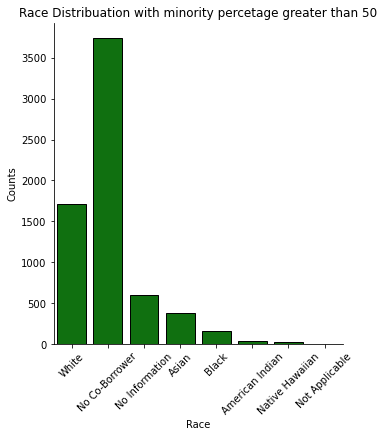

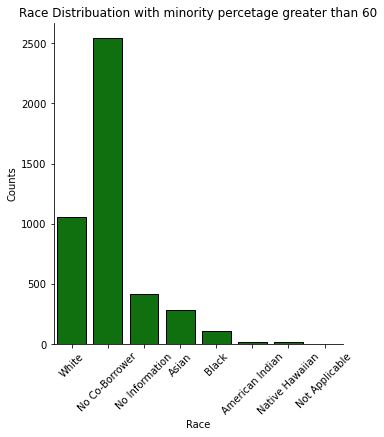

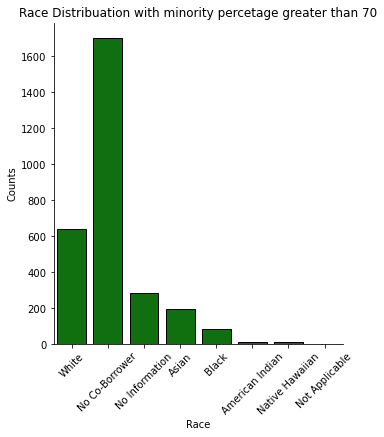

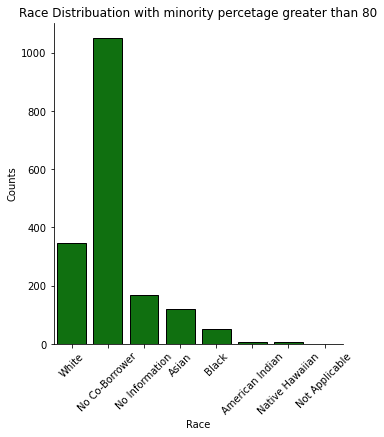

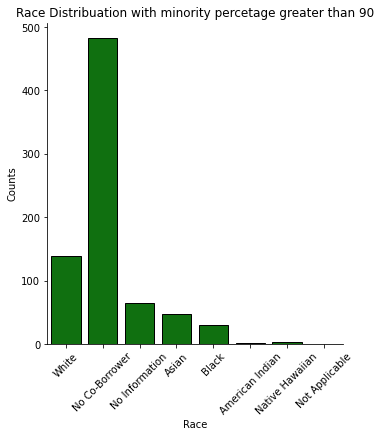

In [78]:
#Let visuallize the distribuation of races of co-borrowers loans which were approved from high minority percentage area.
for percentage in [50,60,70,80,90]:
    sns.catplot(x="Borrower2Race1Type", kind="count",color='g',edgecolor="black", data=df_2019[df_2019['CensusTractMinorityRatioPercent']>percentage],order=df_2019["Borrower2Race1Type"].value_counts().index)
    plt.xlabel('Race')
    plt.ylabel('Counts')
    plt.xticks(rotation = 45)
    plt.title("Race Distribuation with minority percetage greater than "+str(percentage))
    plt.show()

## Hence we see that even in areas with high minority percentages, the maximum numbers of loans borrowers were white which is major discrepency.Even with areas with 90 % minority , the majority of loan borrowers were white. 

# Now lets check if the total monthly income used to underwrite the loan is how much greater than local area median(yearly) income for each race.

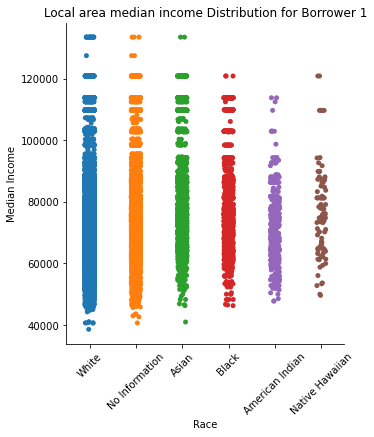

In [79]:
#Check Scatter plot of Local Area Median Income for borrower1
sns.catplot(x="Borrower1Race1Type", y="LocalAreaMedianIncomeAmount", data=df_2019,order=df_2019["Borrower1Race1Type"].value_counts().index)
plt.xlabel('Race')
plt.ylabel('Median Income')
plt.xticks(rotation = 45)
plt.title("Local area median income Distribution for Borrower 1")
plt.show()

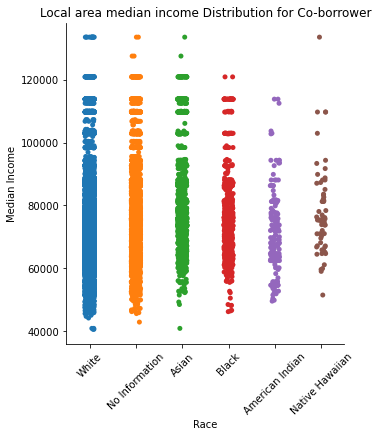

In [80]:
#Check Scatter plot of Local Area Median Income for borrower2
sns.catplot(x="Borrower2Race1Type", y="LocalAreaMedianIncomeAmount", data=df_2019,order=df_2019["Borrower1Race1Type"].value_counts().index)
plt.xlabel('Race')
plt.ylabel('Median Income')
plt.xticks(rotation = 45)
plt.title("Local area median income Distribution for Co-borrower")
plt.show()

Here local area median income seems to be yearly. Lets check the scatter plot of total monthly income.

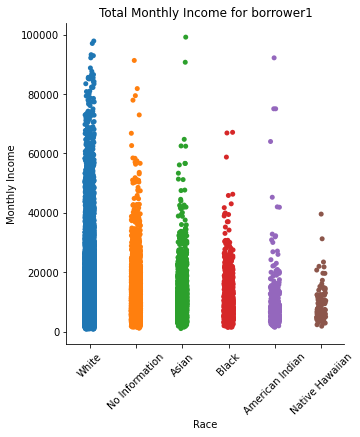

In [81]:
#Check Scatter plot of Total Monthly Income less than 100k used to underwrite the loan.
order=df_2019["Borrower1Race1Type"].value_counts().index
sns.catplot(x="Borrower1Race1Type", y="TotalMonthlyIncomeAmount", data=df_2019[df_2019["TotalMonthlyIncomeAmount"]<100000],order=order)
plt.xlabel('Race')
plt.ylabel('Monthly Income')
plt.xticks(rotation = 45)
plt.title("Total Monthly Income for borrower1")
plt.show()

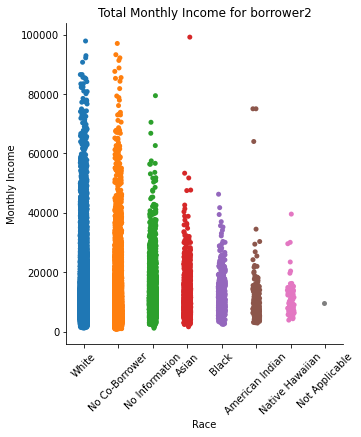

In [82]:
#Check Scatter plot of Total Monthly Income less than 100k used to underwrite the loan.
order=df_2019["Borrower2Race1Type"].value_counts().index
sns.catplot(x="Borrower2Race1Type", y="TotalMonthlyIncomeAmount", data=df_2019[df_2019["TotalMonthlyIncomeAmount"]<100000],order=order)
plt.xlabel('Race')
plt.ylabel('Monthly Income')
plt.xticks(rotation = 45)
plt.title("Total Monthly Income for borrower2")
plt.show()

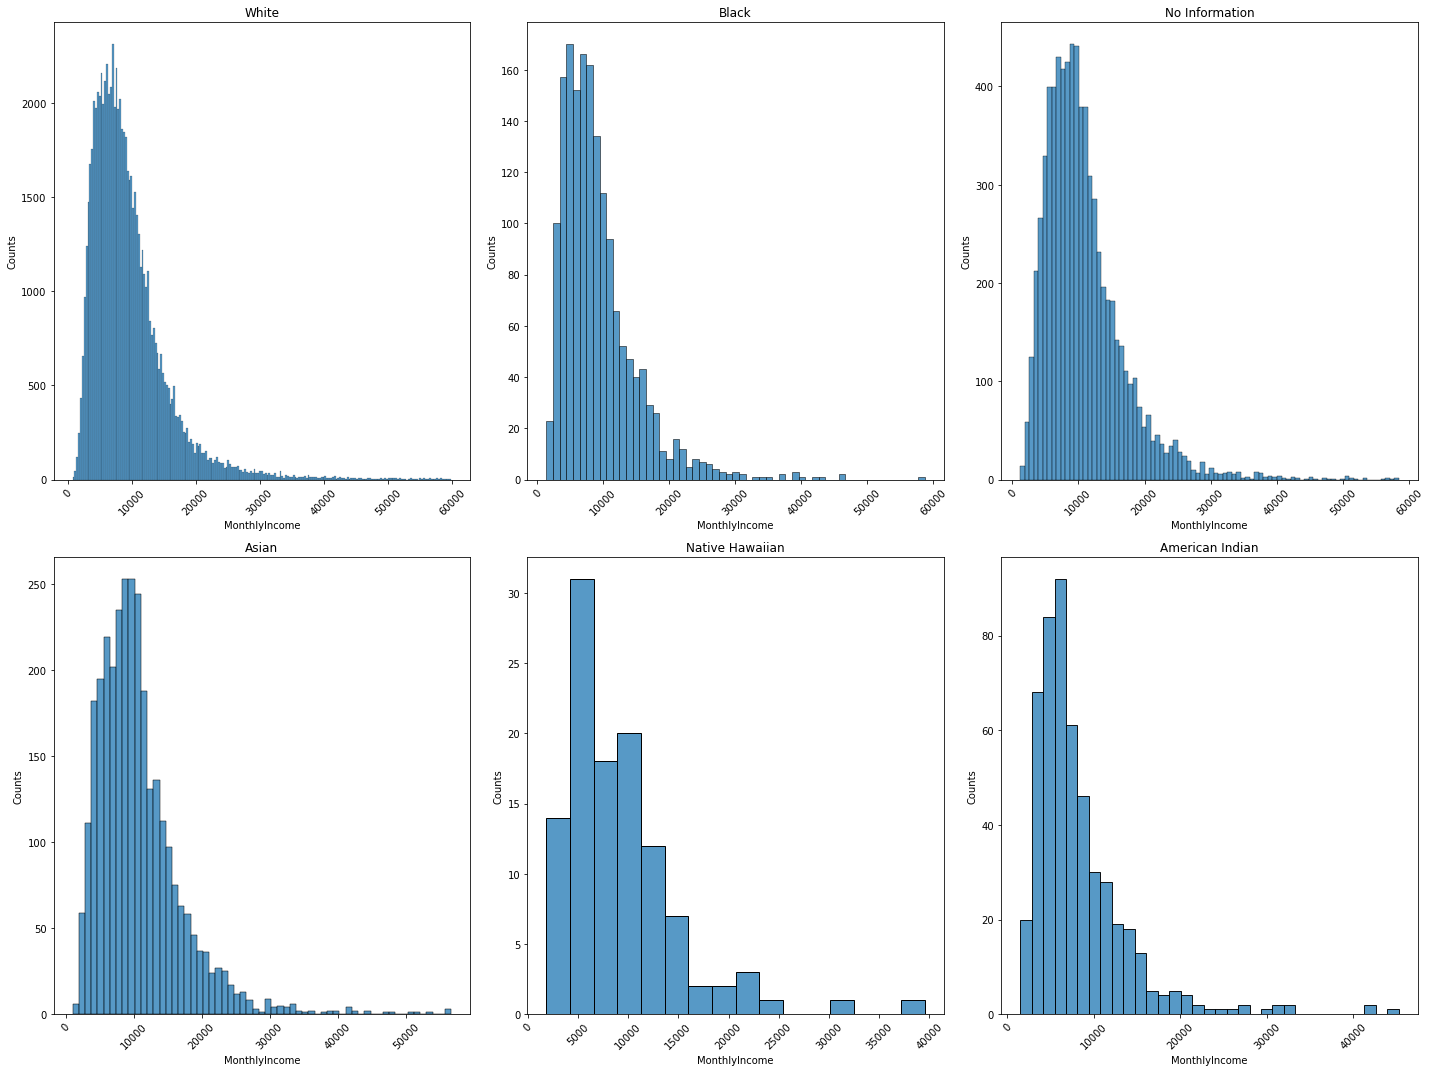

In [83]:
#Let check histgram of the Total Monthly salary for each race for borrower1
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,15))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.histplot(x="TotalMonthlyIncomeAmount", data=df_2019[(df_2019["Borrower1Race1Type"]==race) & (df_2019["TotalMonthlyIncomeAmount"]<60000)],ax=axes[r, c])
    axes[r, c].set_xlabel('MonthlyIncome')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show() 


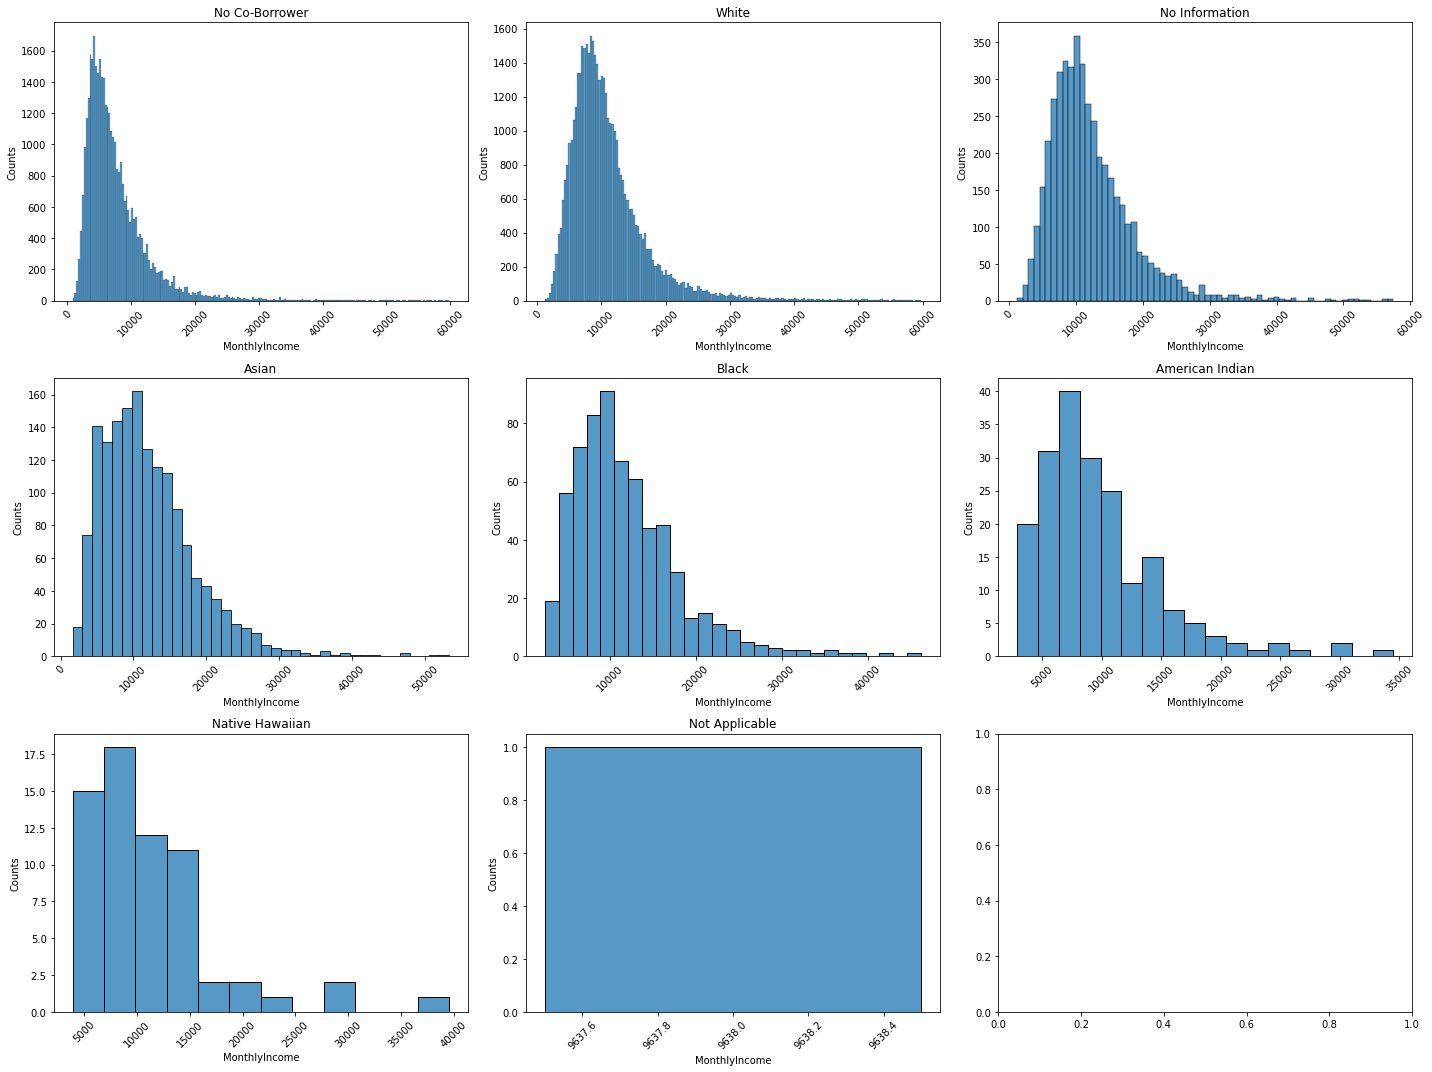

In [84]:
#Let check histgram of the Total Monthly salary for each race for borrower2
r=0
c=0
f, axes = plt.subplots(3, 3,figsize = (20,15))
for race in df_2019["Borrower2Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.histplot(x="TotalMonthlyIncomeAmount", data=df_2019[(df_2019["Borrower2Race1Type"]==race) & (df_2019["TotalMonthlyIncomeAmount"]<60000)],ax=axes[r, c])
    axes[r, c].set_xlabel('MonthlyIncome')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show() 


Hence distribuation of monthly income of all the races are almost same except for Native Hawaiian where it seems loans underwriting income is very low compared to other races.

In [85]:
#Convert Monthly income to yearly income
df_2019['TotalYearlyIncomeAmount']=df_2019['TotalMonthlyIncomeAmount']*12

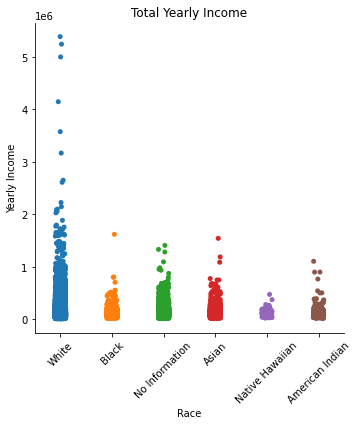

In [86]:
#Lets check scatter plot of the Total Yearly income
sns.catplot(x="Borrower1Race1Type", y="TotalYearlyIncomeAmount", data=df_2019)
plt.xlabel('Race')
plt.ylabel('Yearly Income')
plt.xticks(rotation = 45)
plt.title("Total Yearly Income")
plt.show()

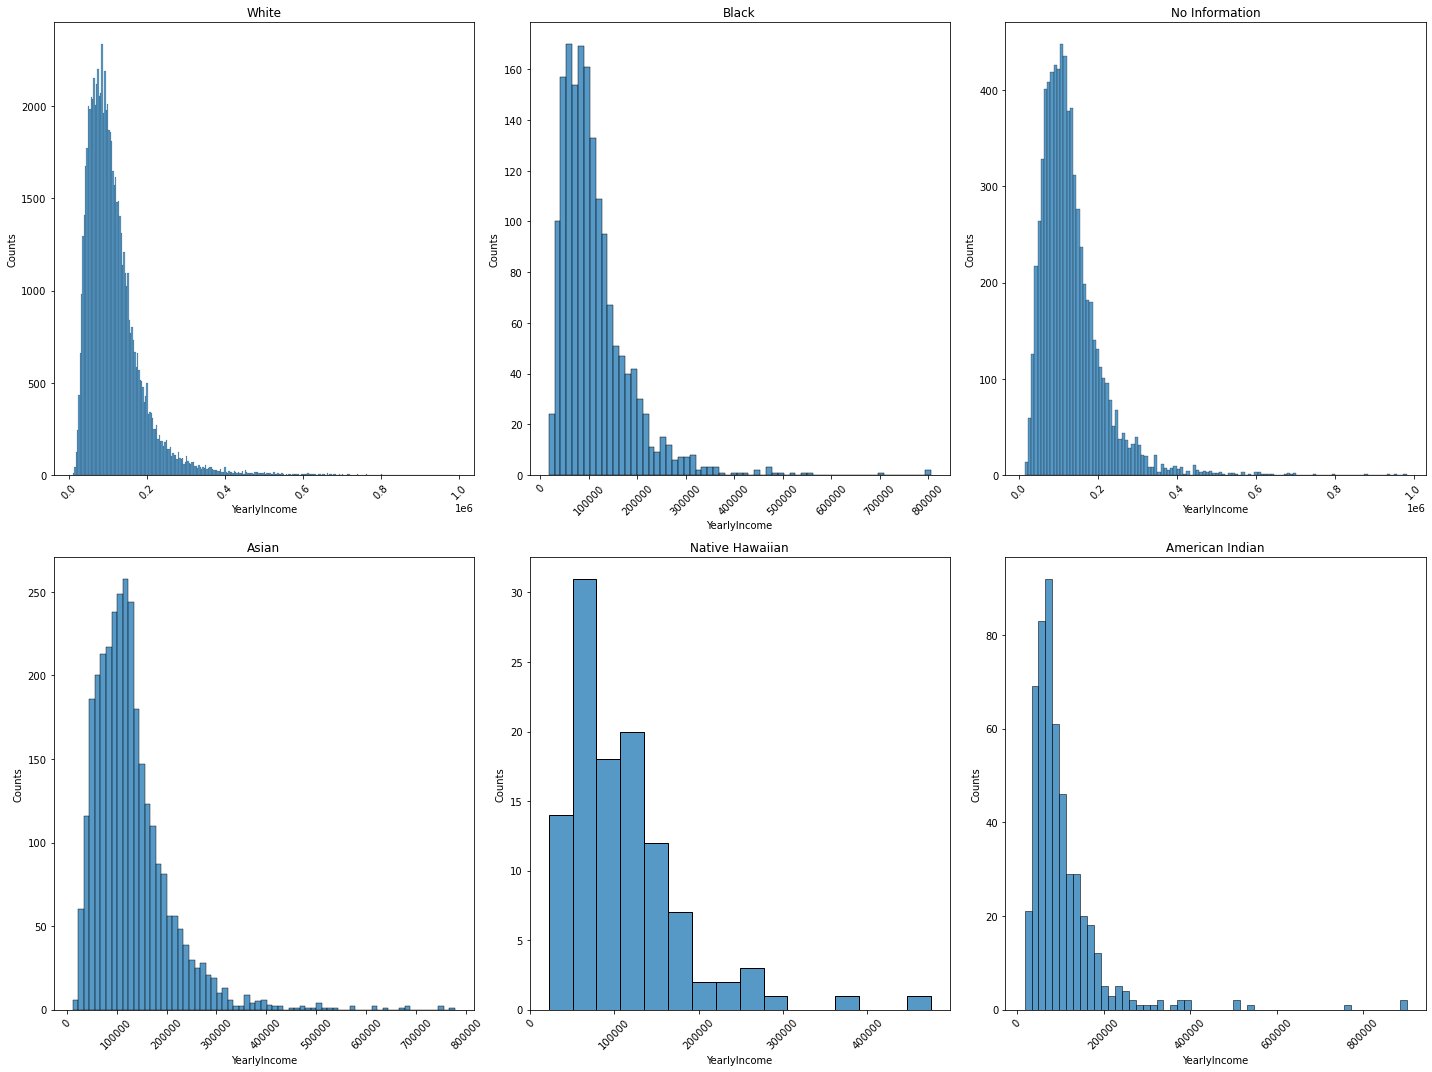

In [87]:
#Let check histgram of the Yealy salary for each race for borrower1
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,15))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.histplot(x="TotalYearlyIncomeAmount", data=df_2019[(df_2019["Borrower1Race1Type"]==race) & (df_2019["TotalYearlyIncomeAmount"]<1000000)],ax=axes[r, c])
    axes[r, c].set_xlabel('YearlyIncome')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show()

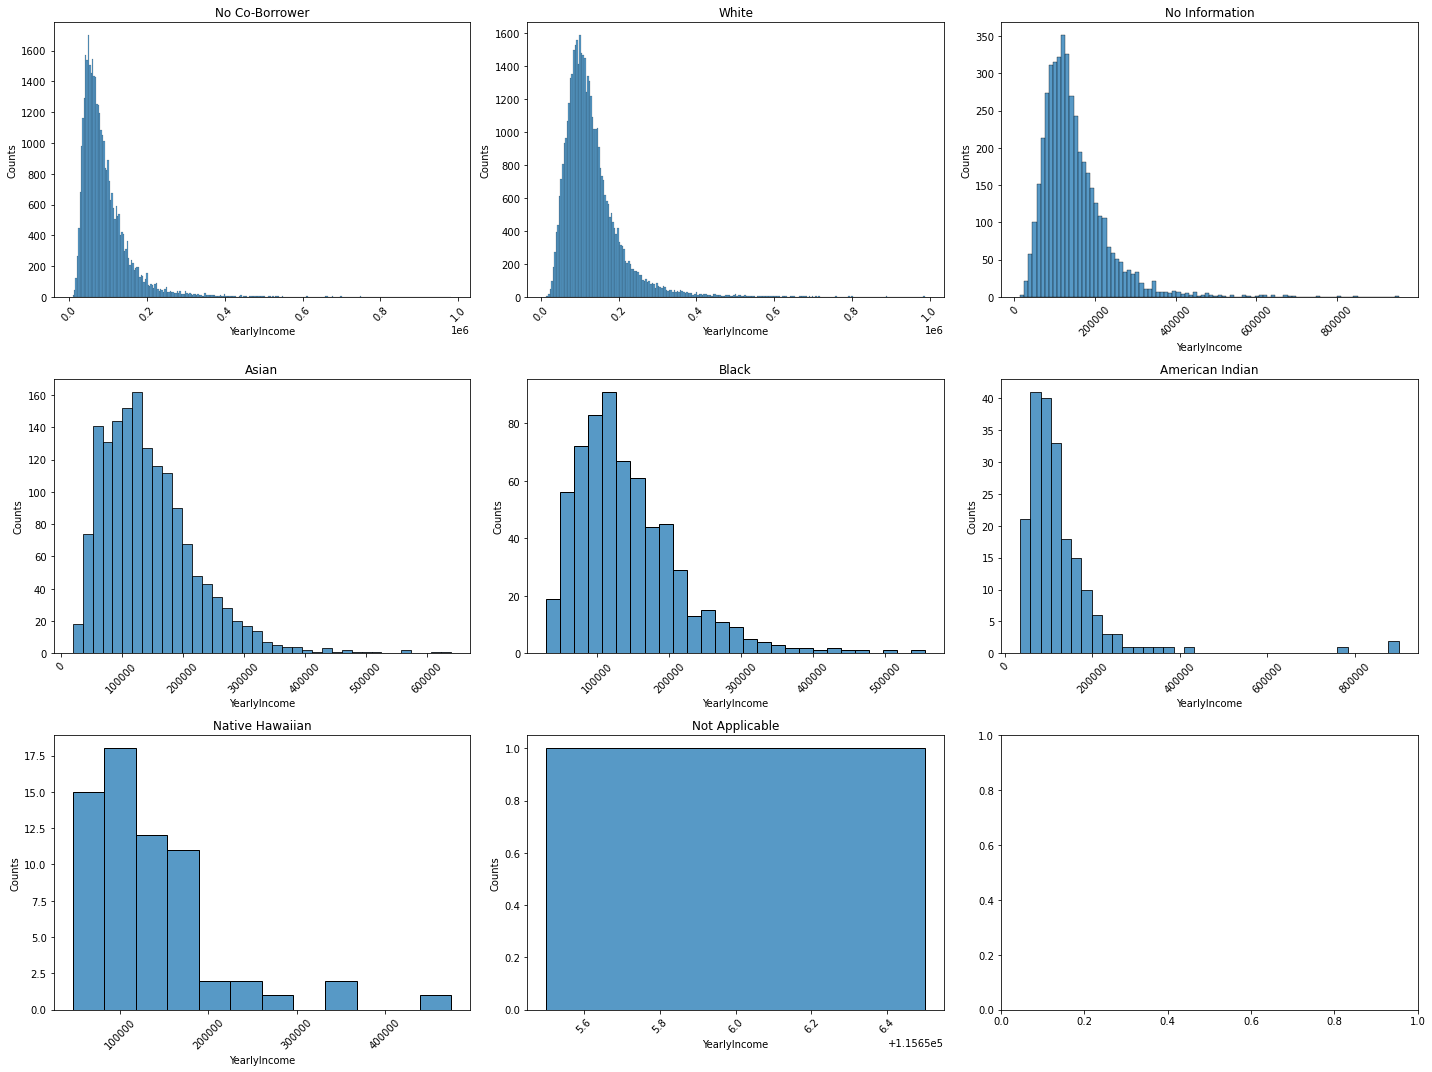

In [88]:
#Let check histgram of the Yealy salary for each race for borrower2
r=0
c=0
f, axes = plt.subplots(3, 3,figsize = (20,15))
for race in df_2019["Borrower2Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.histplot(x="TotalYearlyIncomeAmount", data=df_2019[(df_2019["Borrower2Race1Type"]==race) & (df_2019["TotalYearlyIncomeAmount"]<1000000)],ax=axes[r, c])
    axes[r, c].set_xlabel('YearlyIncome')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show()

Hence the same story is followed in yearly income as expected. Almost all the races have mode on 100k suggesting that most of the loans are approved on and around 100k yearly income.

## Lets see distribution of Yearly Income and Local area median income to see if loans are approved with the same income creteria for all the races.

In [89]:
#Diifrence betweeen local median income and yearly income
df_2019["Diff_median_yearly_income"]=df_2019["TotalYearlyIncomeAmount"]-df_2019["LocalAreaMedianIncomeAmount"]

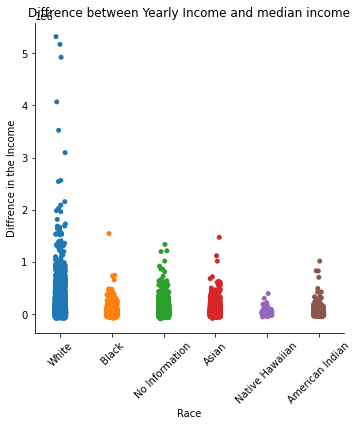

In [90]:
#Lets check scatter plot of the Difference
sns.catplot(x="Borrower1Race1Type", y="Diff_median_yearly_income", data=df_2019)
plt.xlabel('Race')
plt.ylabel('Diffrence in the Income')
plt.xticks(rotation = 45)
plt.title("Diffrence between Yearly Income and median income")
plt.show()

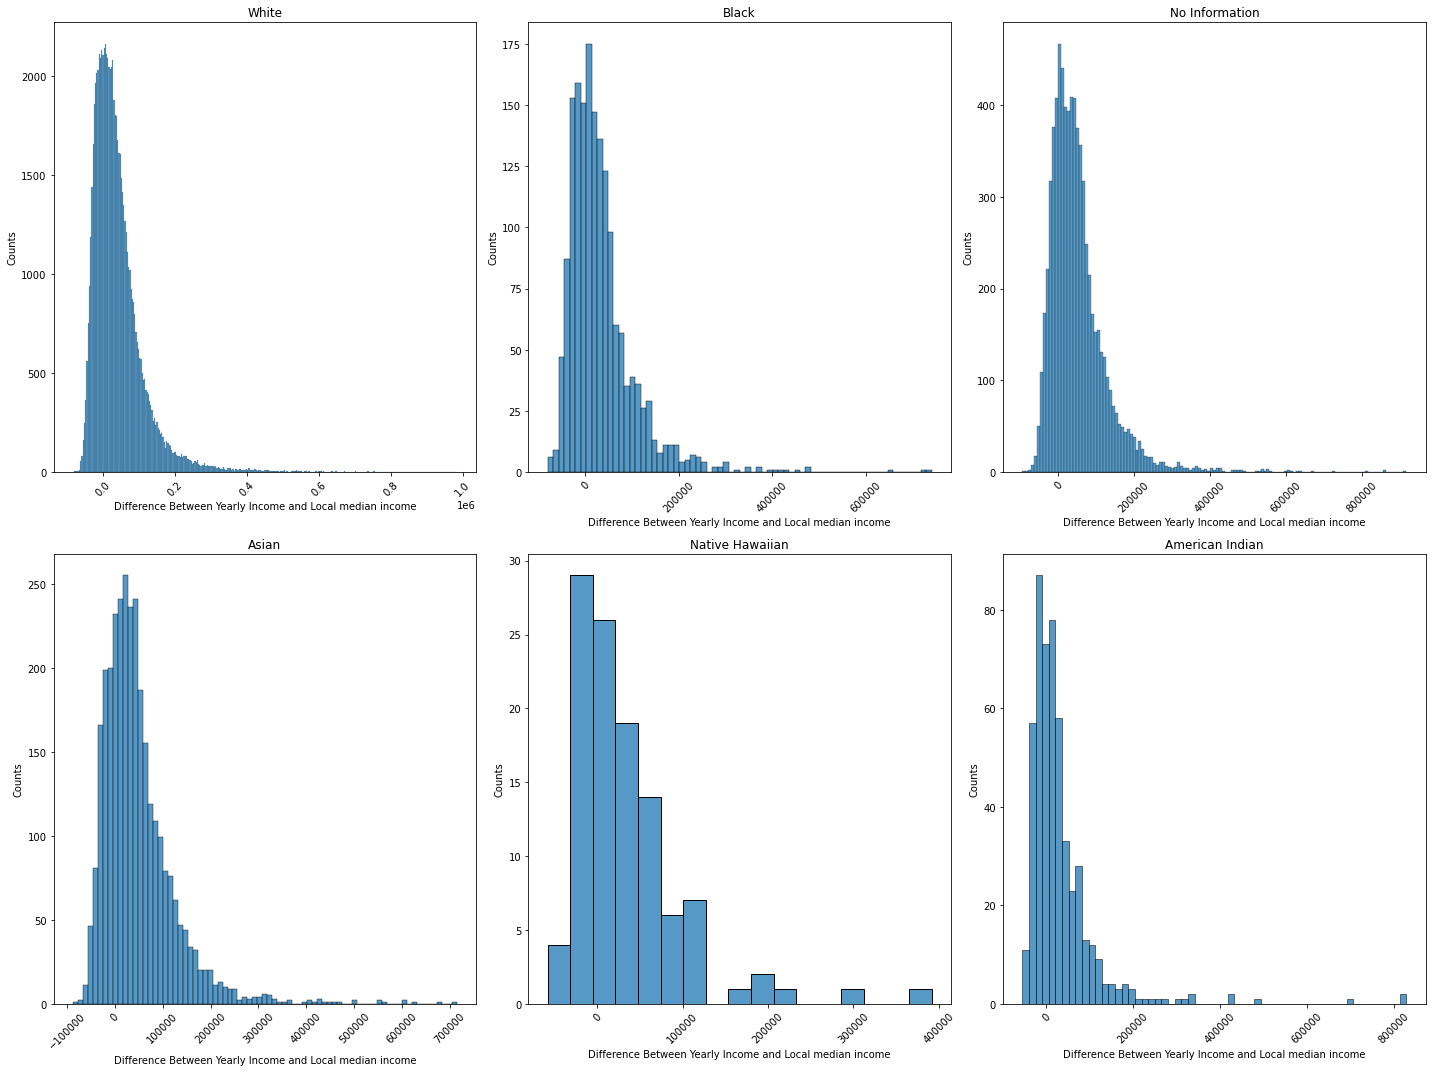

In [91]:
#Lets see the distribuation of the difference for each race.
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,15))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.histplot(x="Diff_median_yearly_income", data=df_2019[(df_2019["Borrower1Race1Type"]==race) & (df_2019["Diff_median_yearly_income"]<1000000)],ax=axes[r, c])
    axes[r, c].set_xlabel('Difference Between Yearly Income and Local median income')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show()

Hence all the races have similar pattern in the difference of the local area median income and Yearly income. All the races have few yearly incomes which are less than local area median income as shown by diffrences less than 0.0 in the histogram.

# Lets move to the LTV Ratio Percent(The loan-to-value ratio of the mortgage at time of origination.) to check if there is any disparity in the ratio based on the races. 
We can check the LTV distribuation to find any disparity.

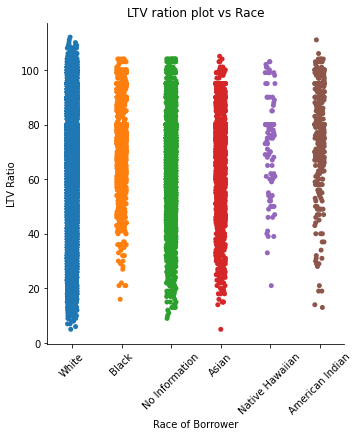

In [92]:
#Check the LTV ratio distribution based on race. 
sns.catplot(x="Borrower1Race1Type", y="LTVRatioPercent", data=df_2019)
plt.xlabel('Race of Borrower')
plt.ylabel('LTV Ratio')
plt.xticks(rotation = 45)
plt.title("LTV ration plot vs Race")
plt.show()

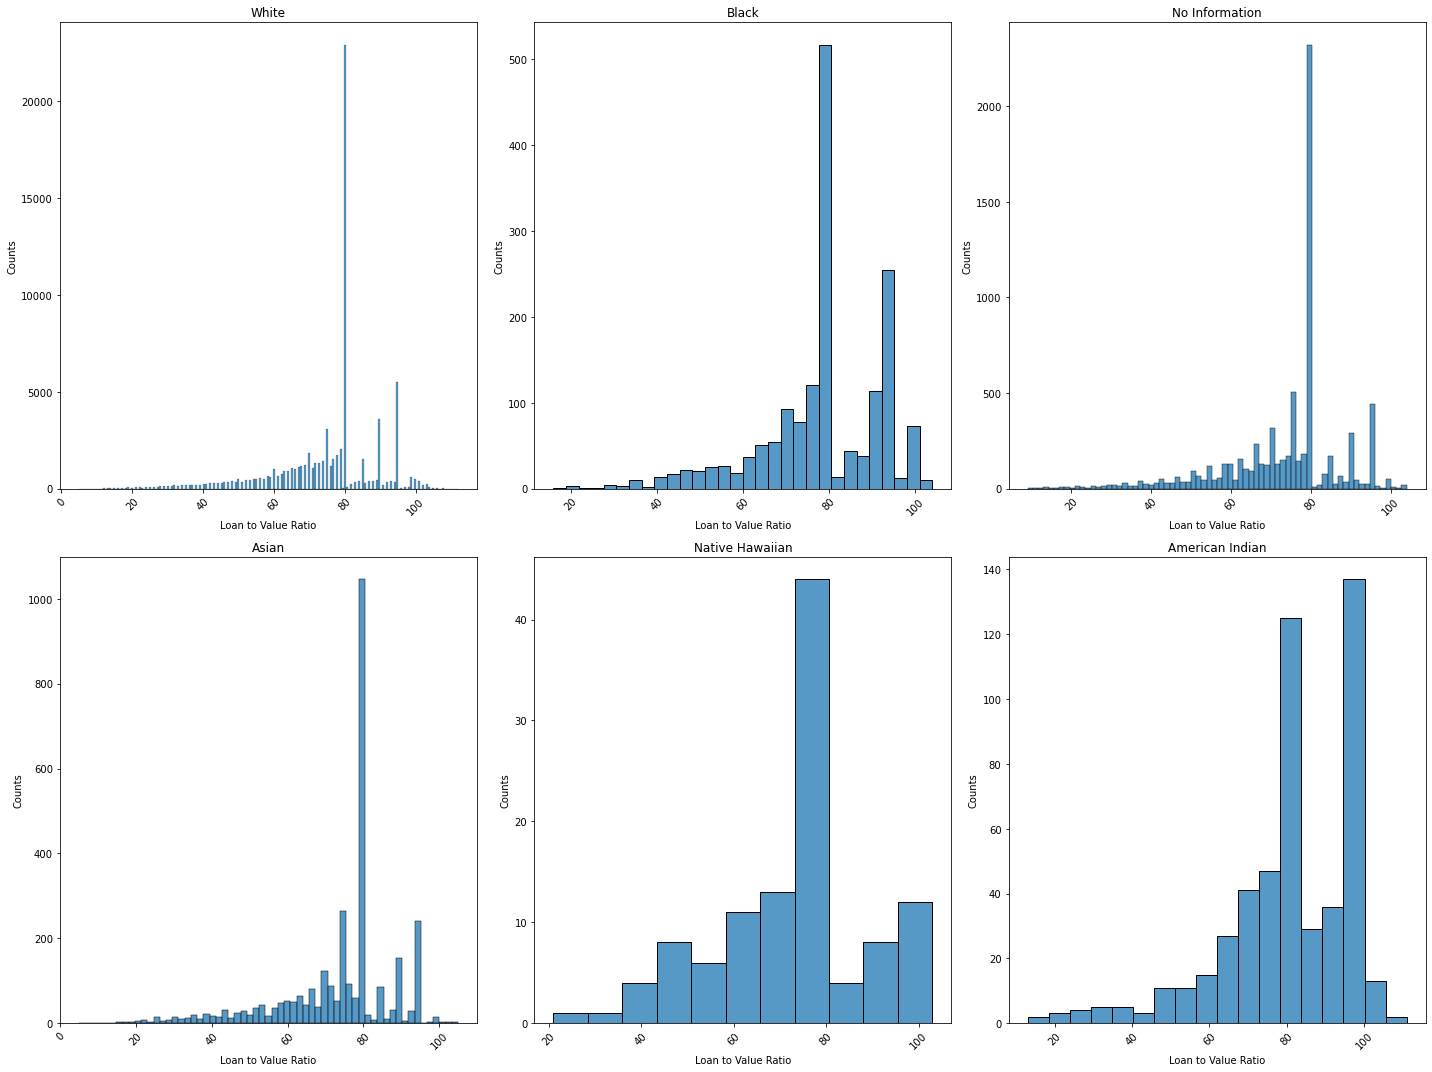

In [93]:
#Lets see the distribuation of the LTV for each race.
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,15))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.histplot(x="LTVRatioPercent", data=df_2019[df_2019["Borrower1Race1Type"]==race],ax=axes[r, c])
    axes[r, c].set_xlabel('Loan to Value Ratio')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show()

Hence almost all the race have got max loan worth 80% of the property value except American Indian who got loan worth 90% of the property value

# Check if LoanPurposeType have any relationship with race and check if some kind of loan is more popular among specific races.
Purpose of Loan: 
- 1 = Purchase, 
- 2 = No-Cash Out Refinancing, 
- 3 = Second Mortgage, 
- 4 = New Construction, 
- 5 = Rehabilitation or Home Improvement, 
- 6 = Cash-out Refinancing, 
- 7 = Other

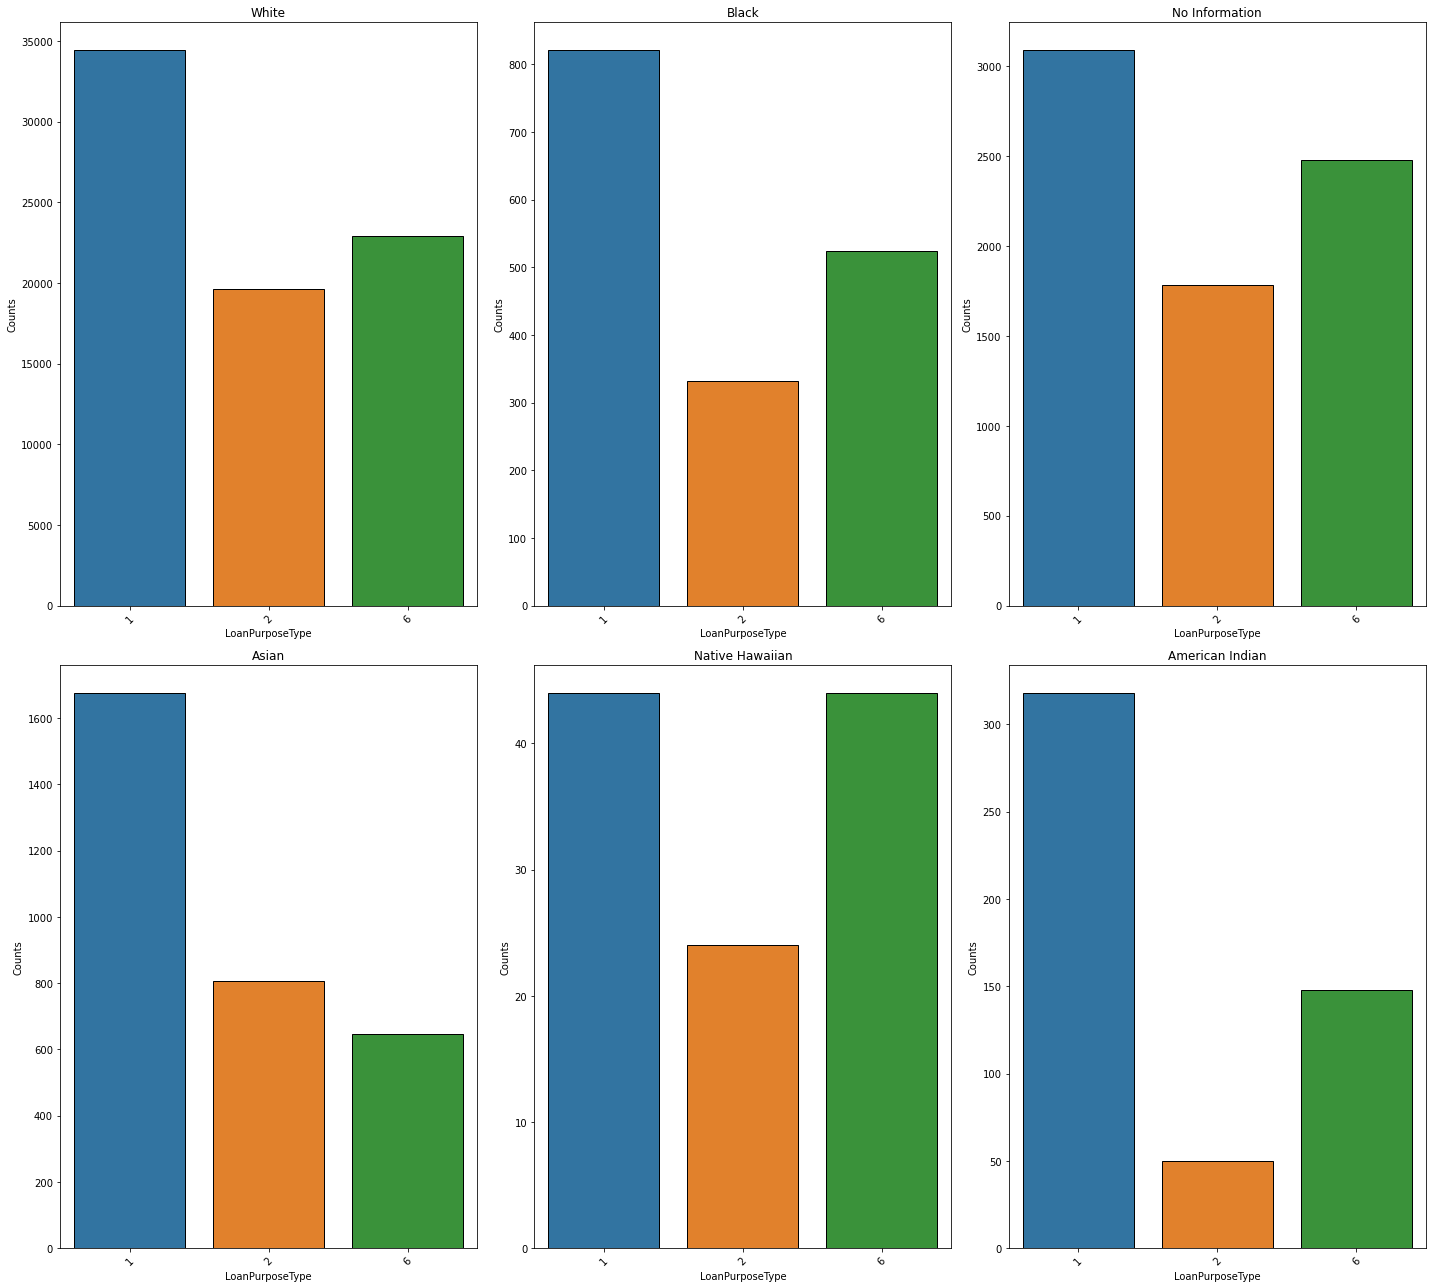

In [94]:
#Check the frequency count of the Loan Purpose types for each race.
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.countplot(x="LoanPurposeType",edgecolor="black", data=df_2019[df_2019['Borrower1Race1Type']==race],ax=axes[r, c])
    axes[r, c].set_xlabel('LoanPurposeType')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show() 

Hence the major purpose of borrowing the loan for all the races is purchase. 

# Check if MortgageType have any relationship with race and check if some kind of loan is more popular among specific races.
Type of Mortgage and whether the mortgage is guaranteed: 
- 0=Conventional, 
- 1=FHA, 
- 2=VA, 
- 3=USDA Rural Housing-FSA Guaranteed, 
- 4=HECMs, 
- 5=Title1-FHA

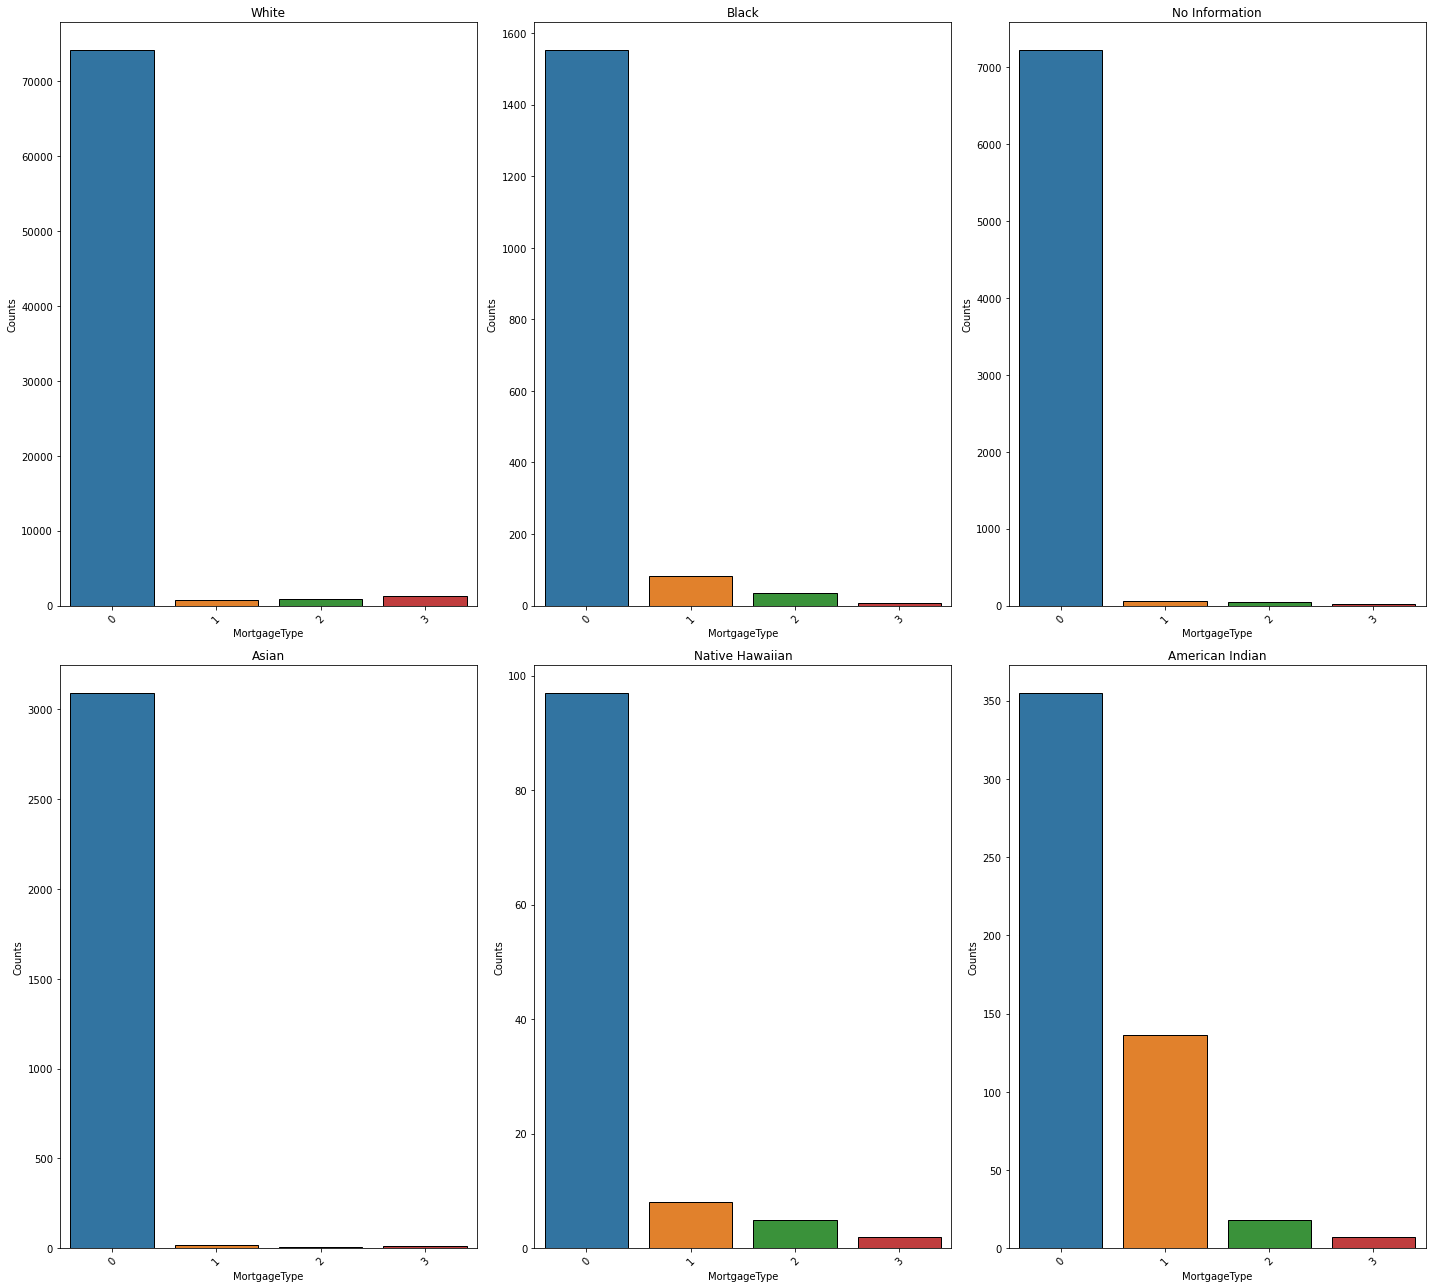

In [95]:
#Check the frequency count of the Loan Purpose types for each race.
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.countplot(x="MortgageType",edgecolor="black", data=df_2019[df_2019['Borrower1Race1Type']==race],ax=axes[r, c])
    axes[r, c].set_xlabel('MortgageType')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show() 

Hence the popular loan among all races is conventational loan. For American Indian FHA loan is also popular.

# Lets check if there is any diffrences in ScheduledTotalPaymentCount (Term of the Mortgage in Months) for diffrent races.

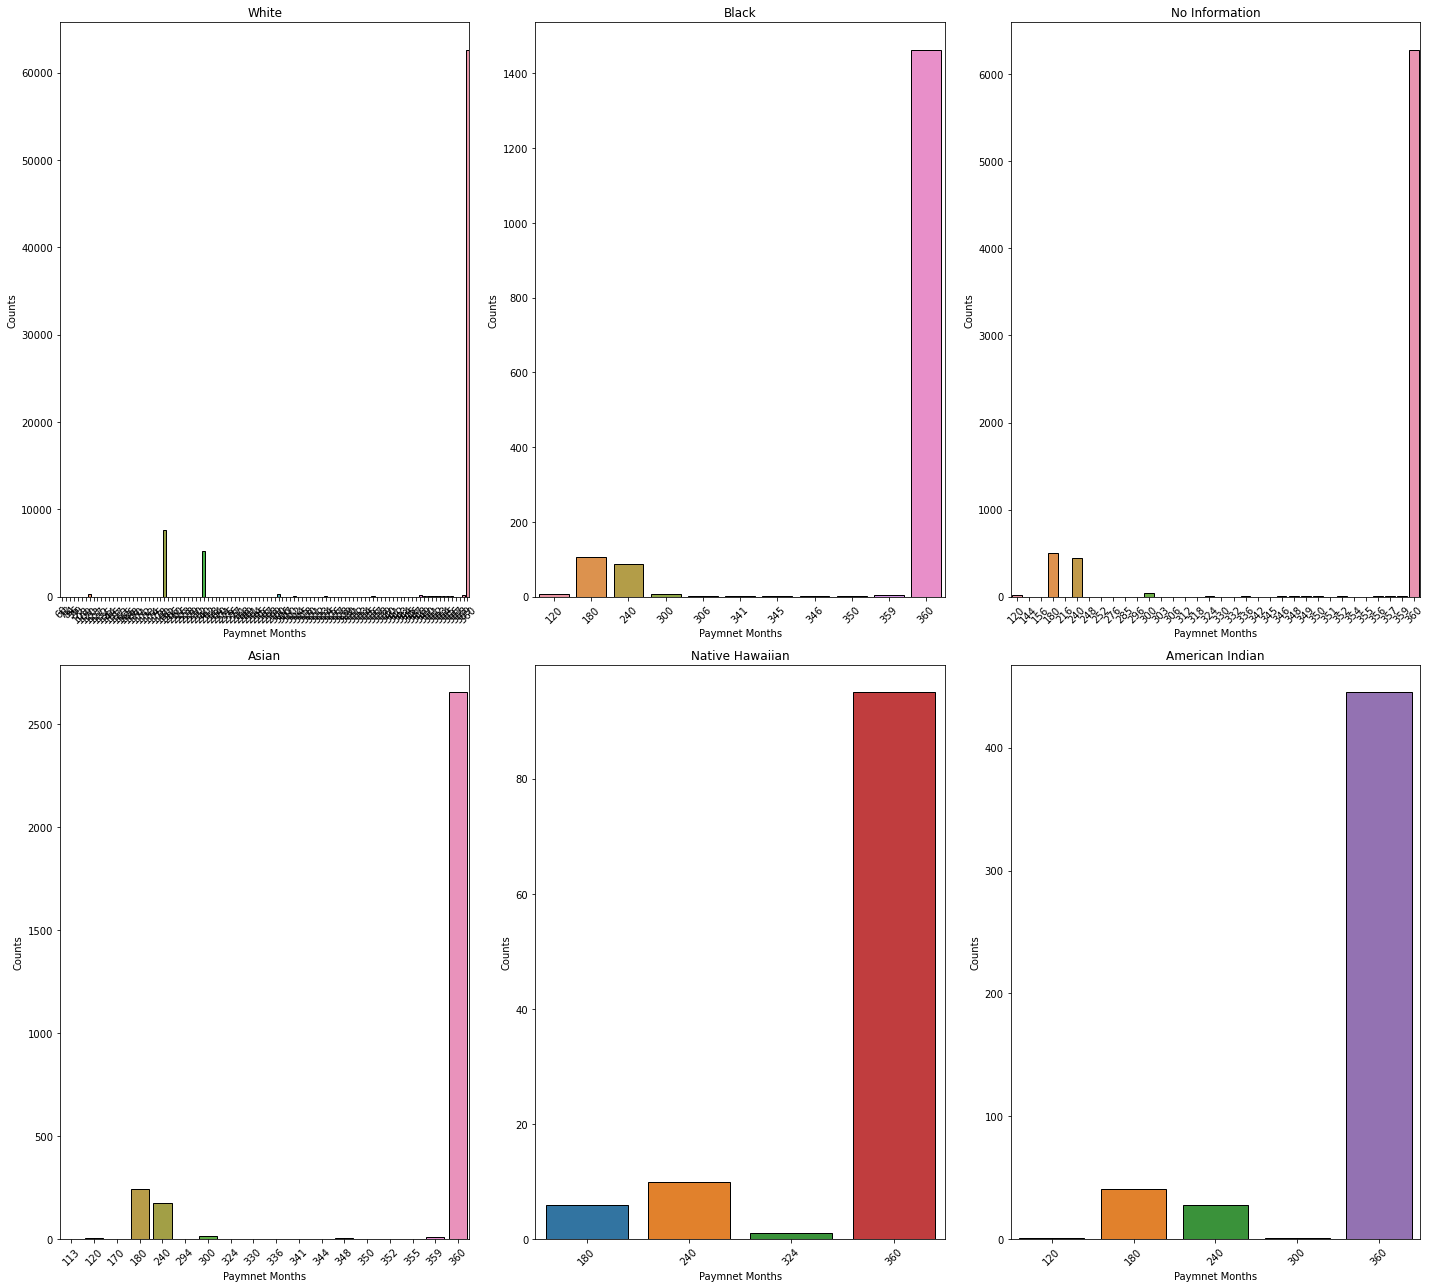

In [96]:
#Check the frequency count of the Payment months for each race.
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.countplot(x="ScheduledTotalPaymentCount",edgecolor="black", data=df_2019[df_2019['Borrower1Race1Type']==race],ax=axes[r, c])
    axes[r, c].set_xlabel('Paymnet Months')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show() 

Hence for all the races have max scheduled payments months is 360 and almost similar pattern is observed in all the races.

# Lets check the type of instituation from which loan was borrowed for each race. 
Type of Institution from which the FHLBank acquired the mortgage. 
- 01=Insured depository institution, 
- 02=Housing Associate, 
- 03=Insurance Company, 
- 04=Non-Federally Insured CU, 
- 05=Non-Depository CDFI, 
- 06=Other FHLBank, 
- 09=Other

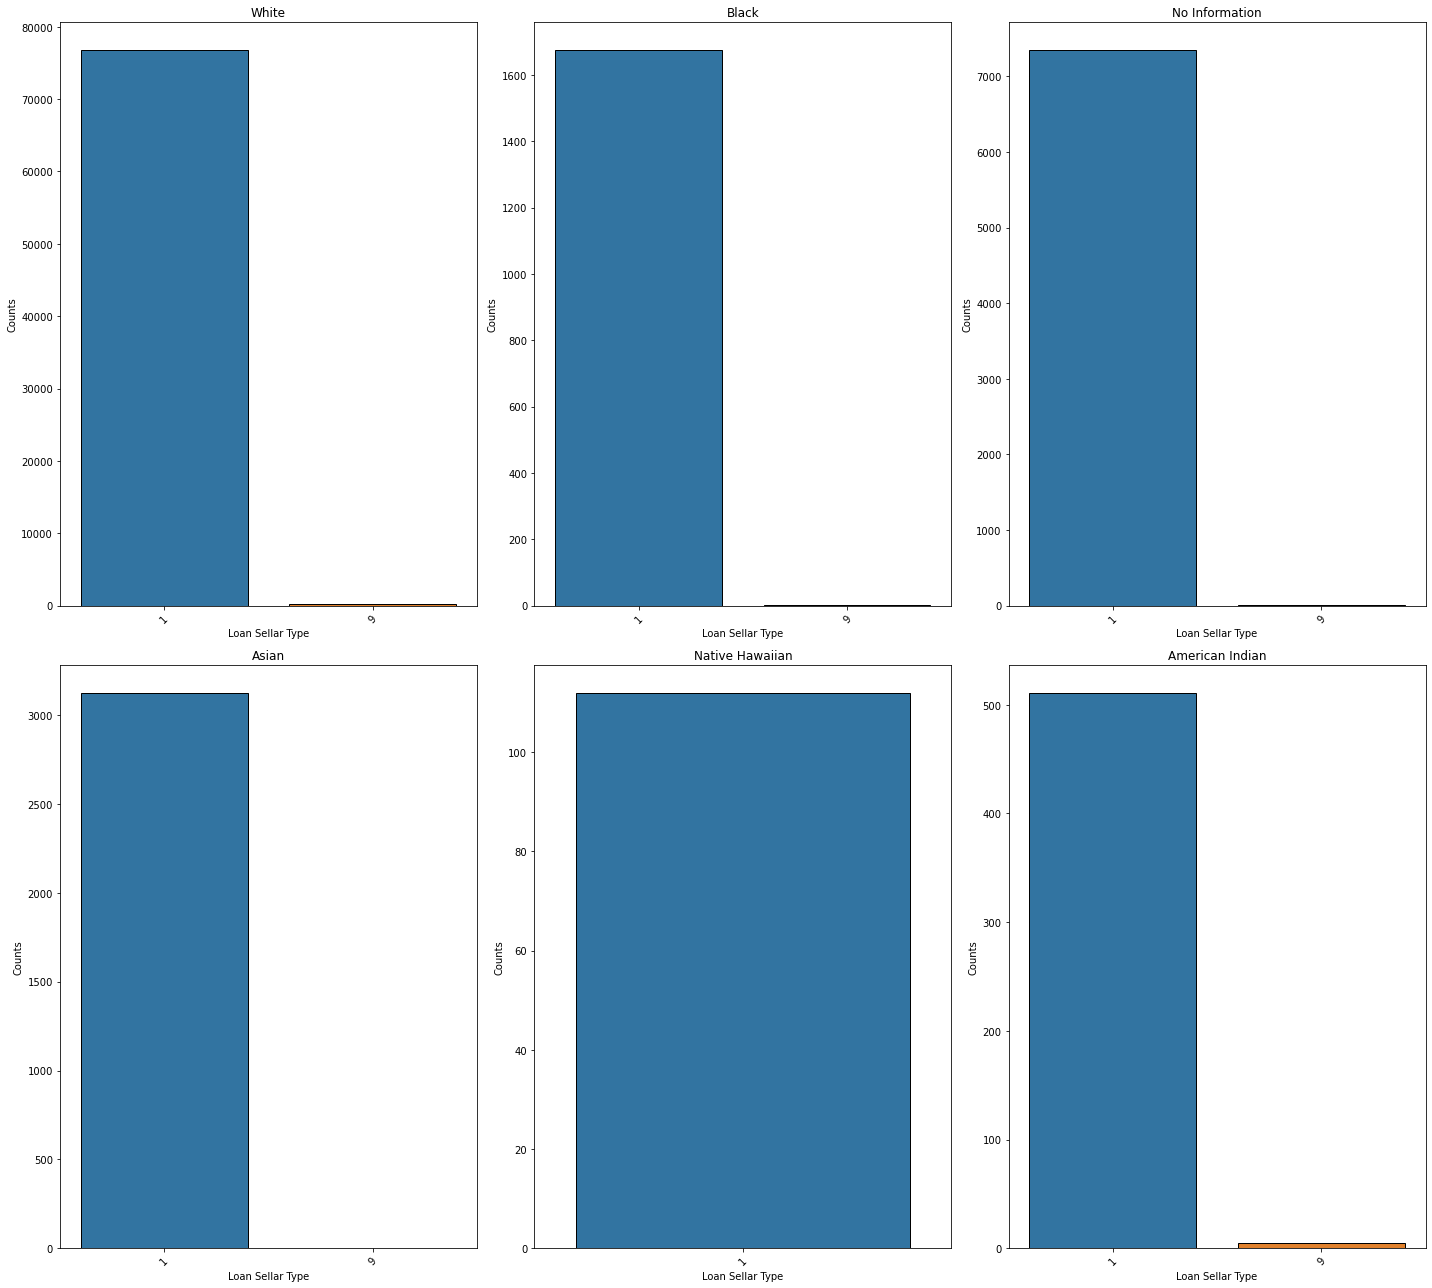

In [97]:
#Check the frequency count of the Seller types for each race.
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.countplot(x="MortgageLoanSellerInstType",edgecolor="black", data=df_2019[df_2019['Borrower1Race1Type']==race],ax=axes[r, c])
    axes[r, c].set_xlabel('Loan Sellar Type')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show() 

Hence Insured depository institutions are popular among all the races.

# Lets check borrower counts for each race.

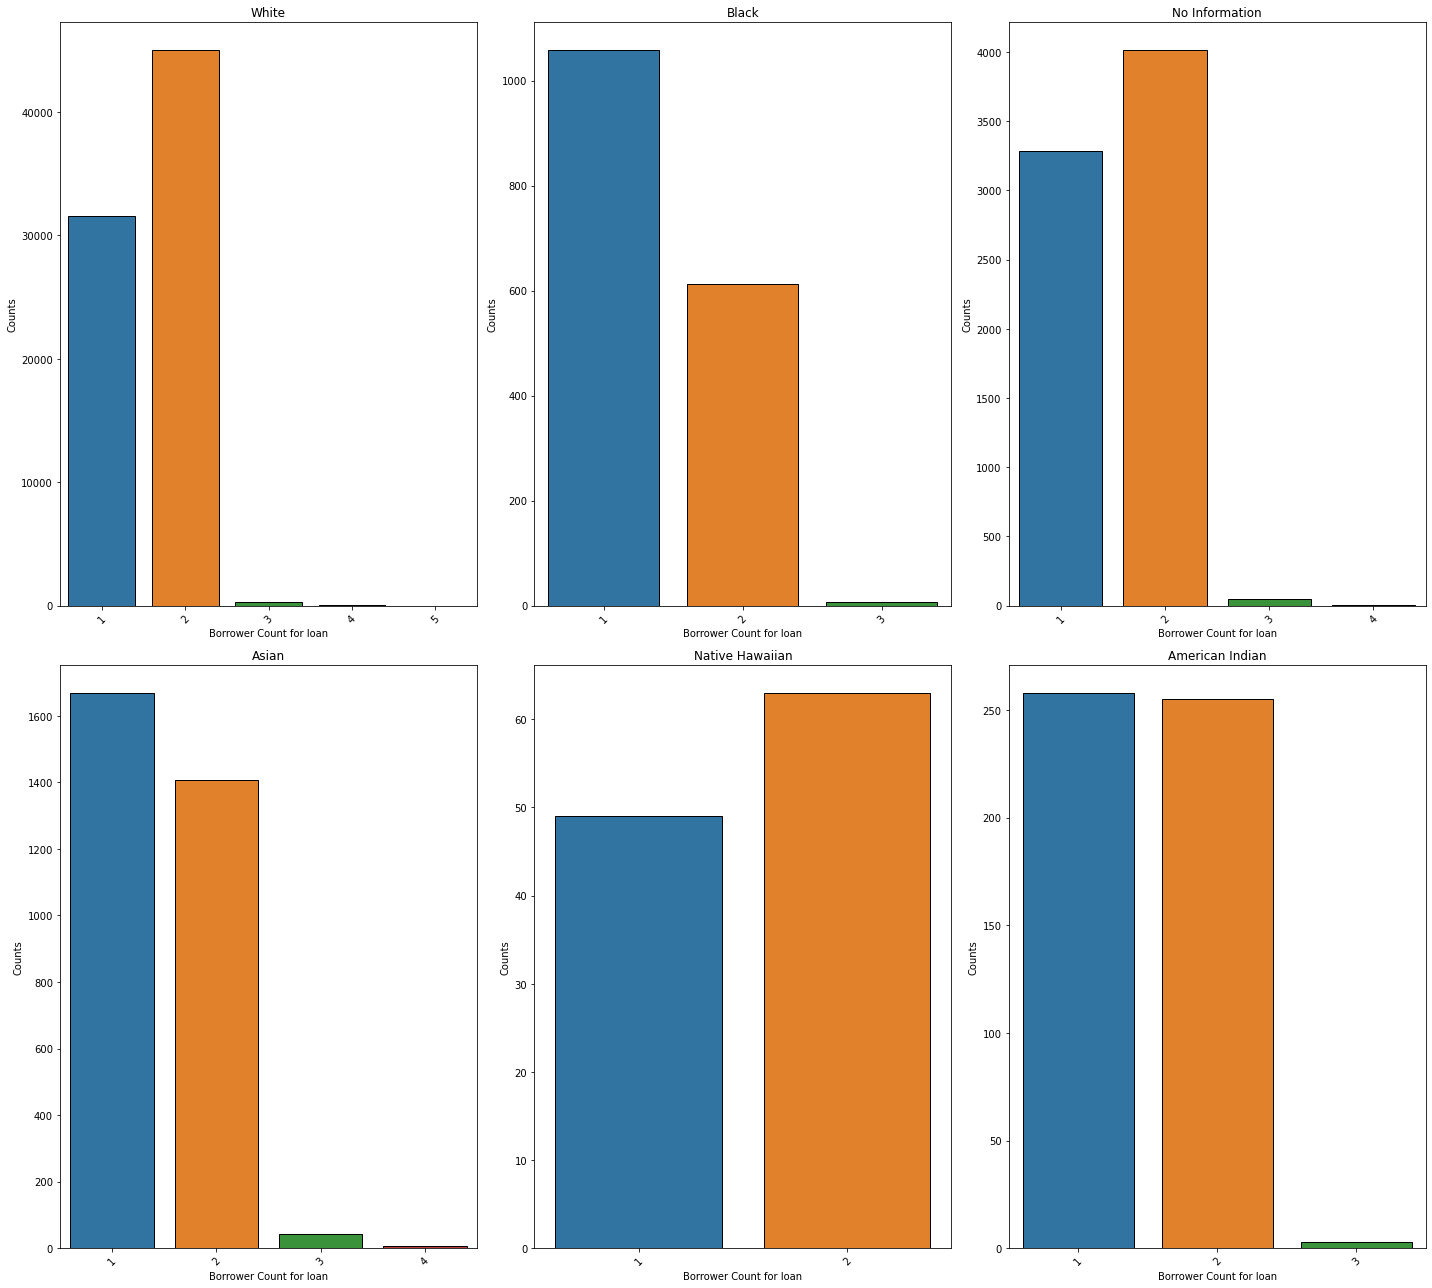

In [98]:
#Check the number of borrower for each race
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.countplot(x="BorrowerCount",edgecolor="black", data=df_2019[df_2019['Borrower1Race1Type']==race],ax=axes[r, c])
    axes[r, c].set_xlabel('Borrower Count for loan')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show() 

Hence majority of white and native hawaiian loans have co-borrowers whereas all the other races have majority loans with one borrower.

# Check if the loan borrowers were first time home borrower.

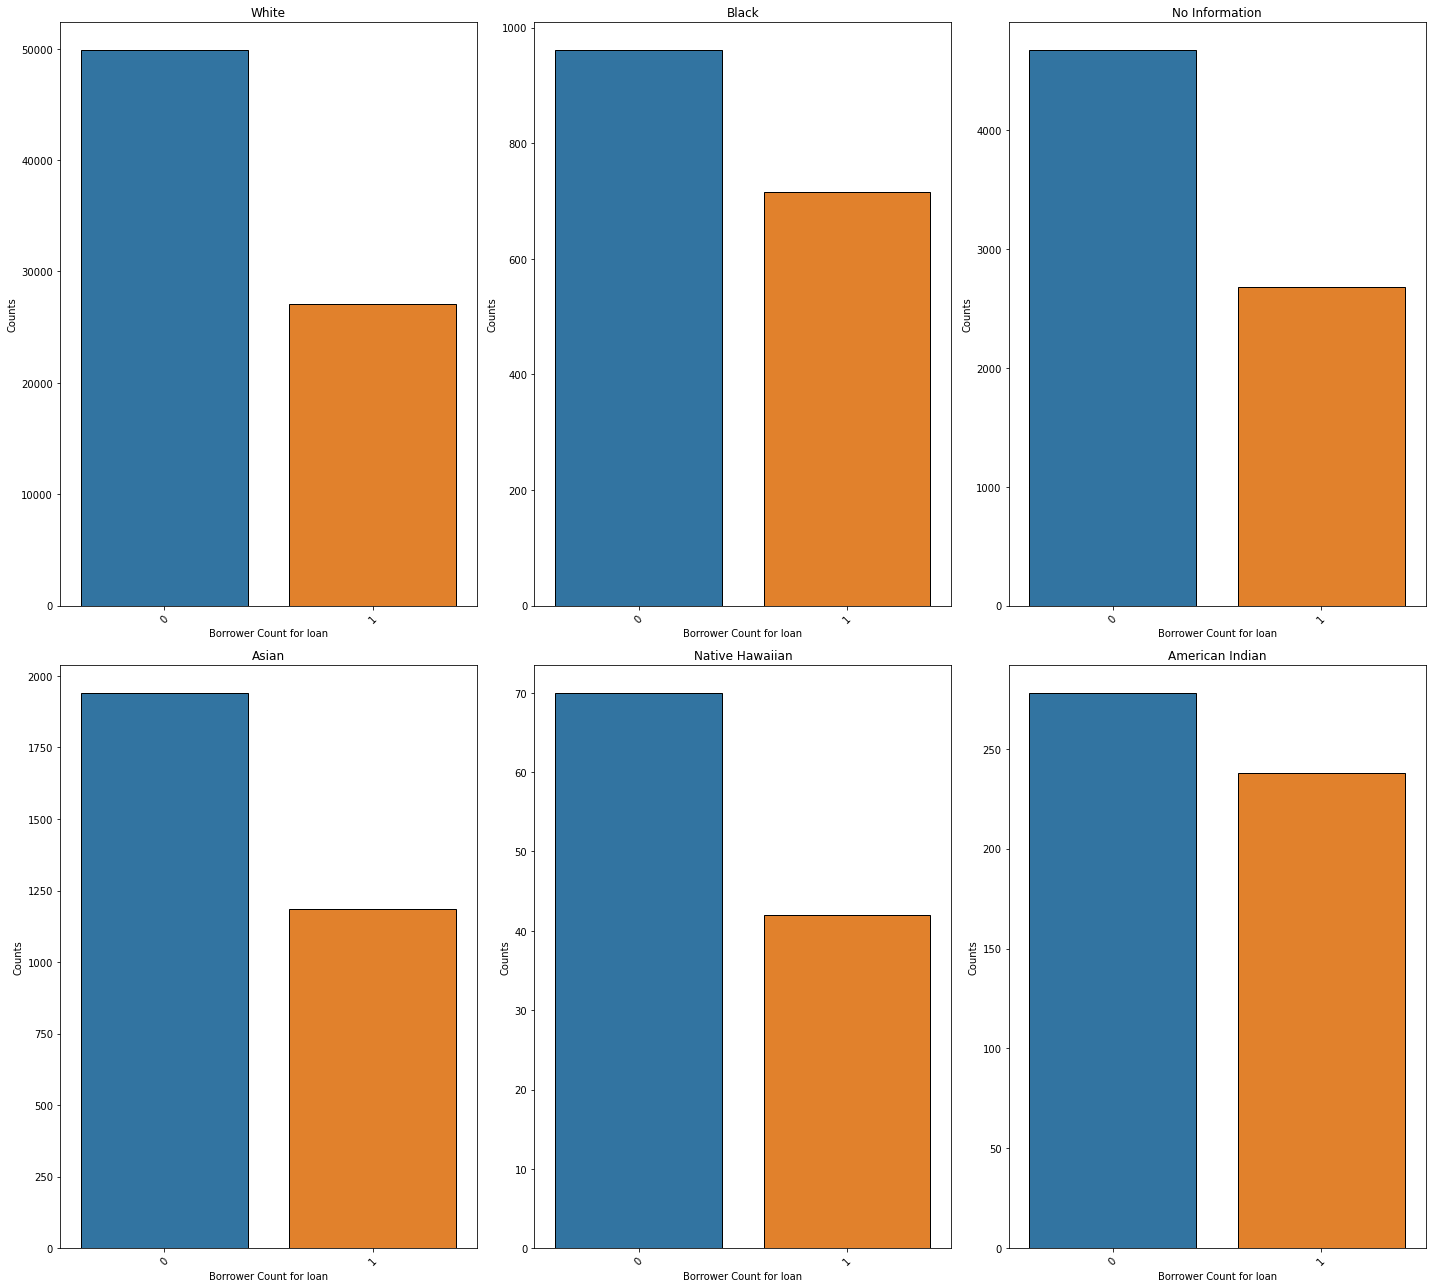

In [99]:
#Check the number of borrower for each race
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.countplot(x="BorrowerFirstTimeHomebuyer",edgecolor="black", data=df_2019[df_2019['Borrower1Race1Type']==race],ax=axes[r, c])
    axes[r, c].set_xlabel('Borrower Count for loan')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show() 

Hence borrowers buying first time home were highest among black and american indian population.

# Lets check if gender have any patterns with borrower race.
Numeric code indicating the sex of the first or primary borrower. 
- 1=Male, 
- 2=Female, 
- 3=Information not provided by borrower, 
- 4=Not Applicable (First or primary borrower is an institution, corporation or partnership), 
- 6=Borrower selected both male and female

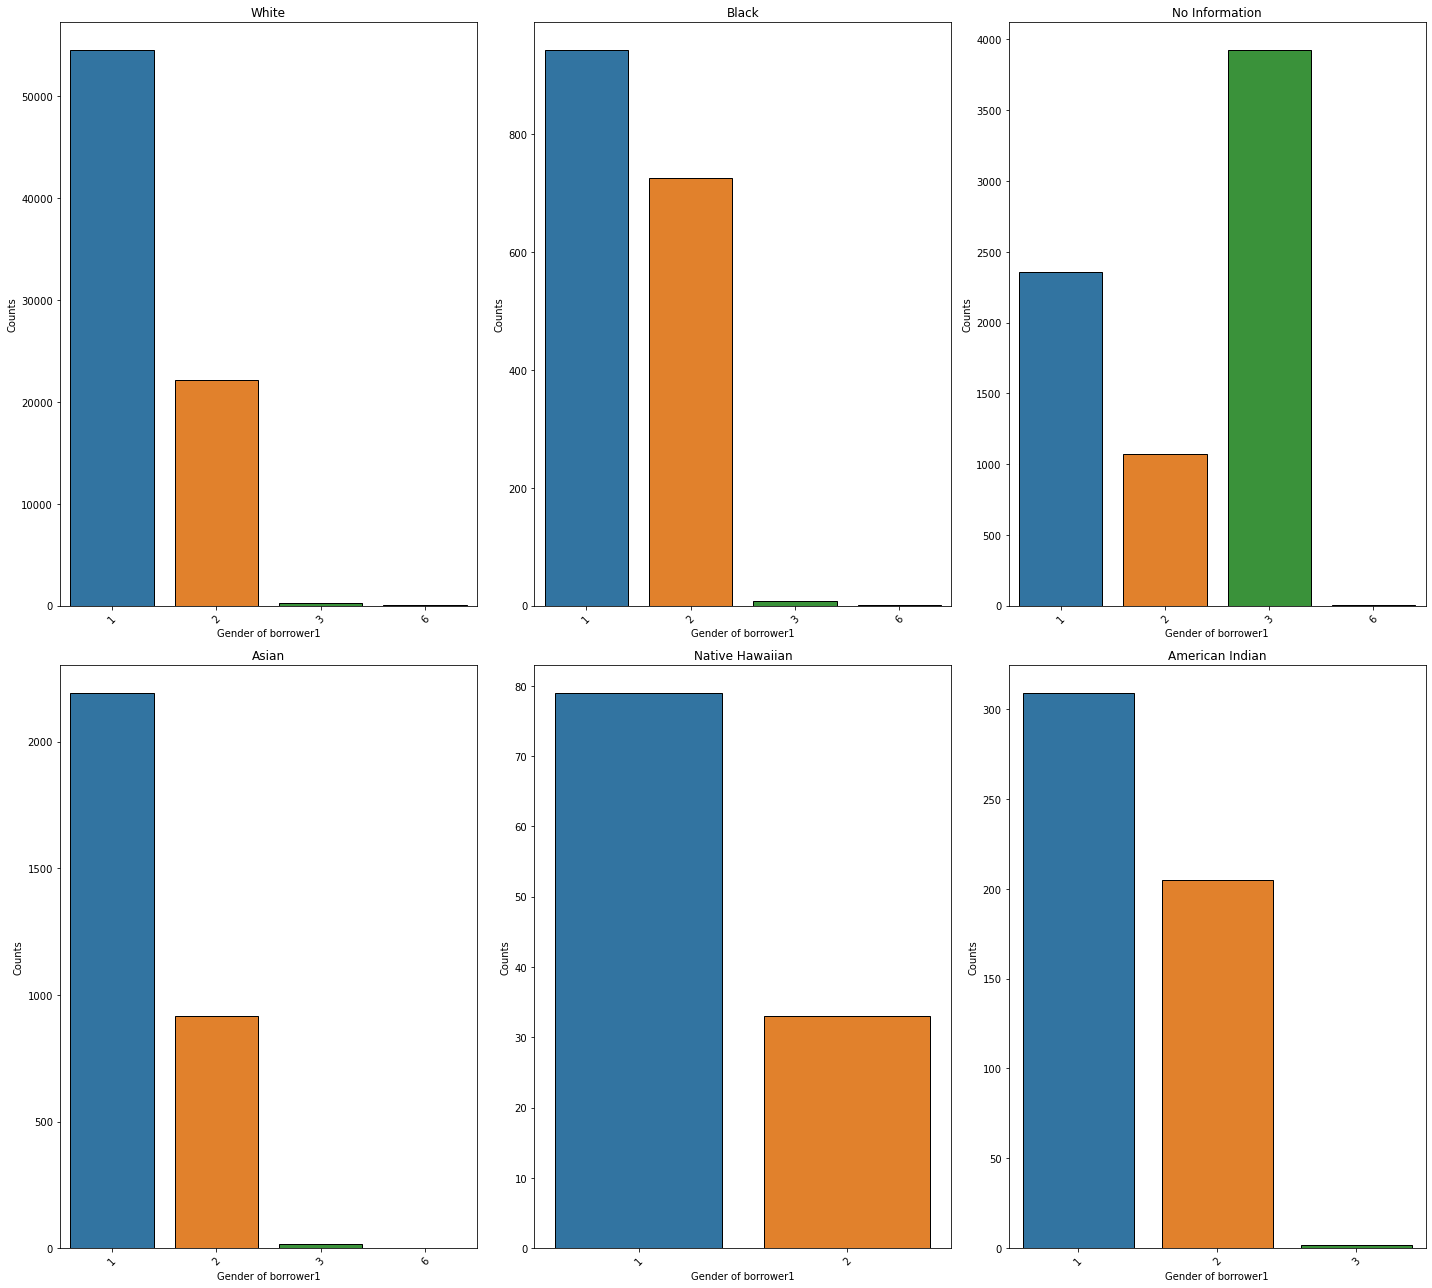

In [100]:
#Check the gender of borrower1 for each race
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.countplot(x="Borrower1GenderType",edgecolor="black", data=df_2019[df_2019['Borrower1Race1Type']==race],ax=axes[r, c])
    axes[r, c].set_xlabel('Gender of borrower1')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show() 

Hence most of the borrower1 are male for all the races.

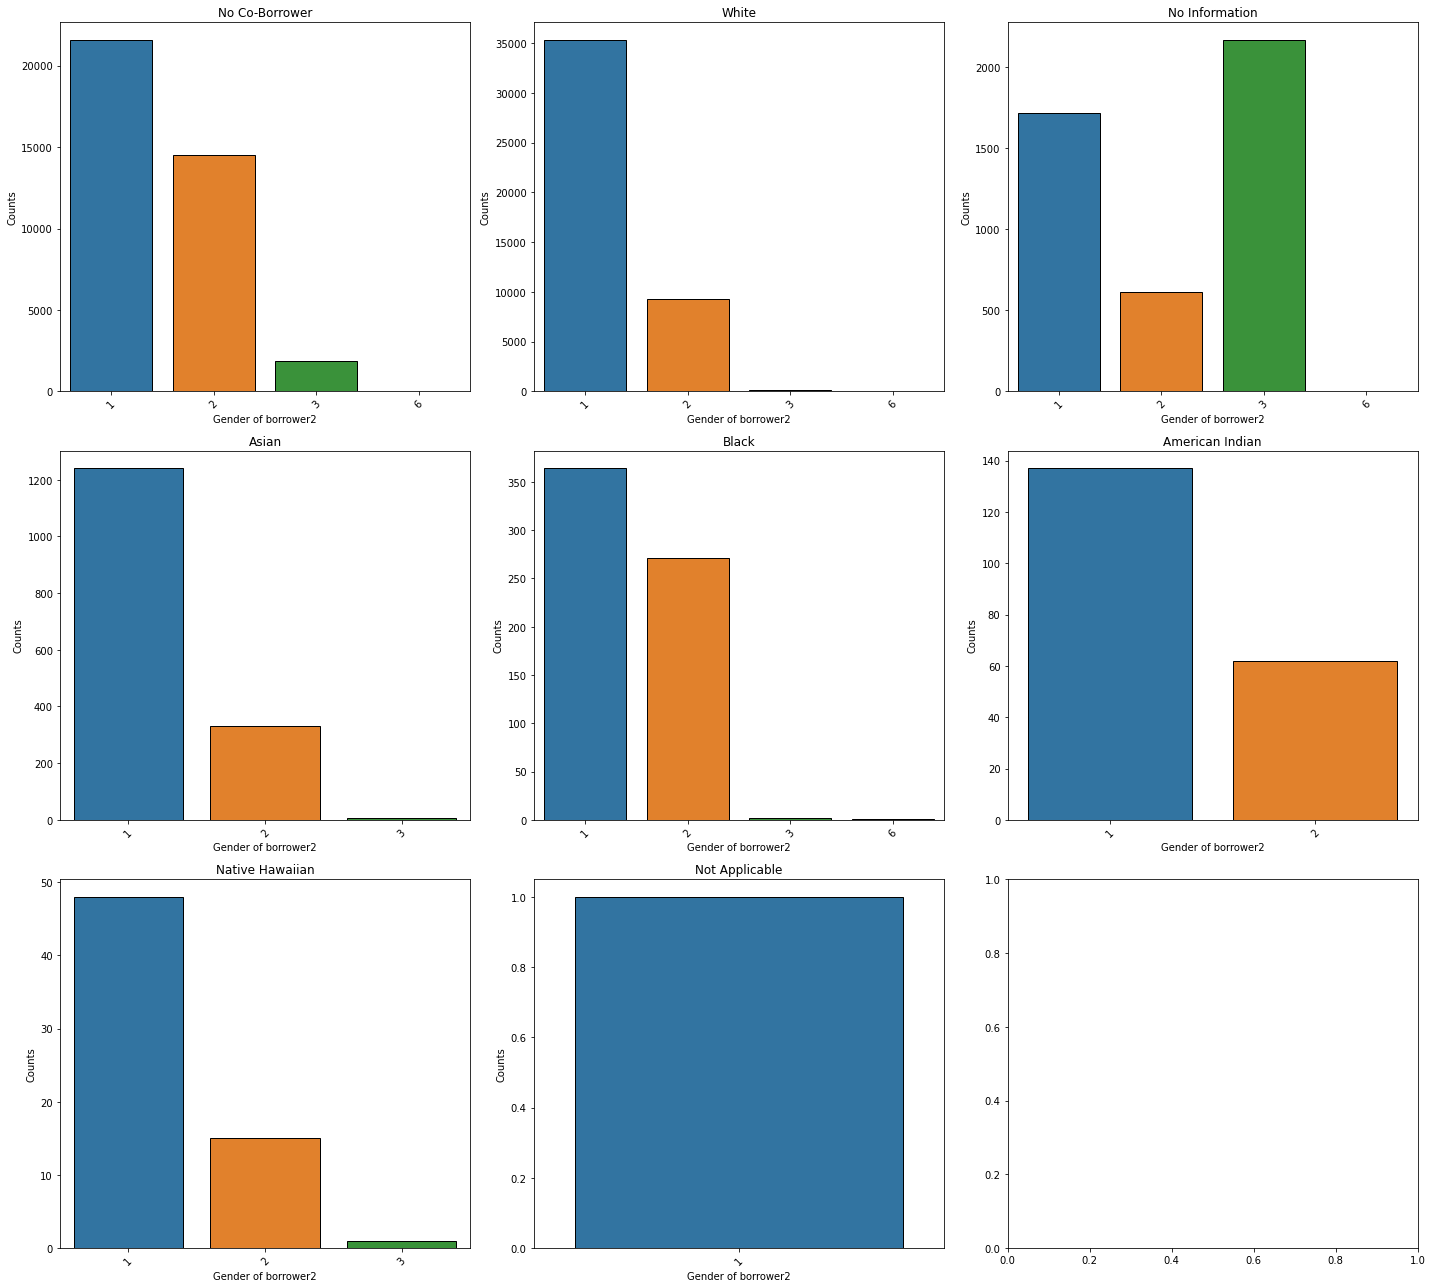

In [101]:
#Check the gender of borrower2 for each race
r=0
c=0
f, axes = plt.subplots(3, 3,figsize = (20,18))
for race in df_2019["Borrower2Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.countplot(x="Borrower1GenderType",edgecolor="black", data=df_2019[df_2019['Borrower2Race1Type']==race],ax=axes[r, c])
    axes[r, c].set_xlabel('Gender of borrower2')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show() 

Hence for co-borrowers too majority of coborrowers are male.

# Lets check if age of borrowers have anything to do with race.

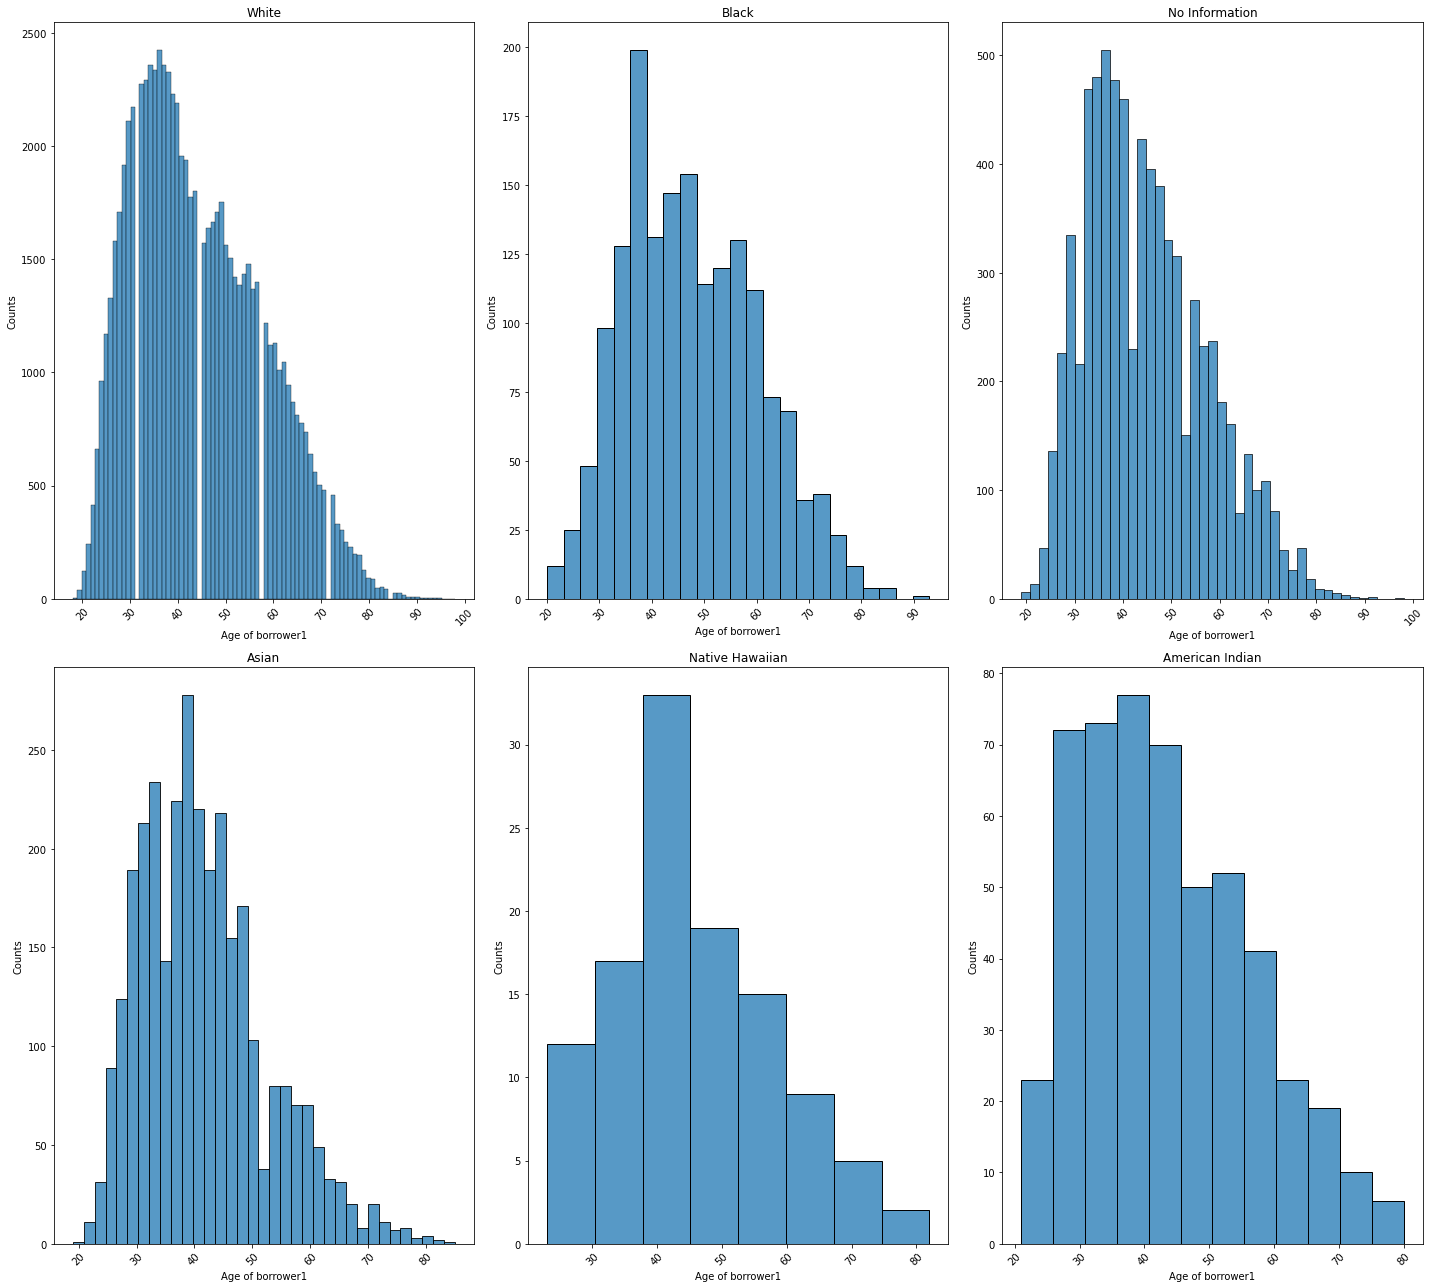

In [102]:
#Check the age of borrower
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.histplot(x="Borrower1AgeAtApplicationYears",edgecolor="black", data=df_2019[df_2019['Borrower1Race1Type']==race],ax=axes[r, c])
    axes[r, c].set_xlabel('Age of borrower1')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show() 

For all the races mojarity of borrowers age between 20 to 80 years old.

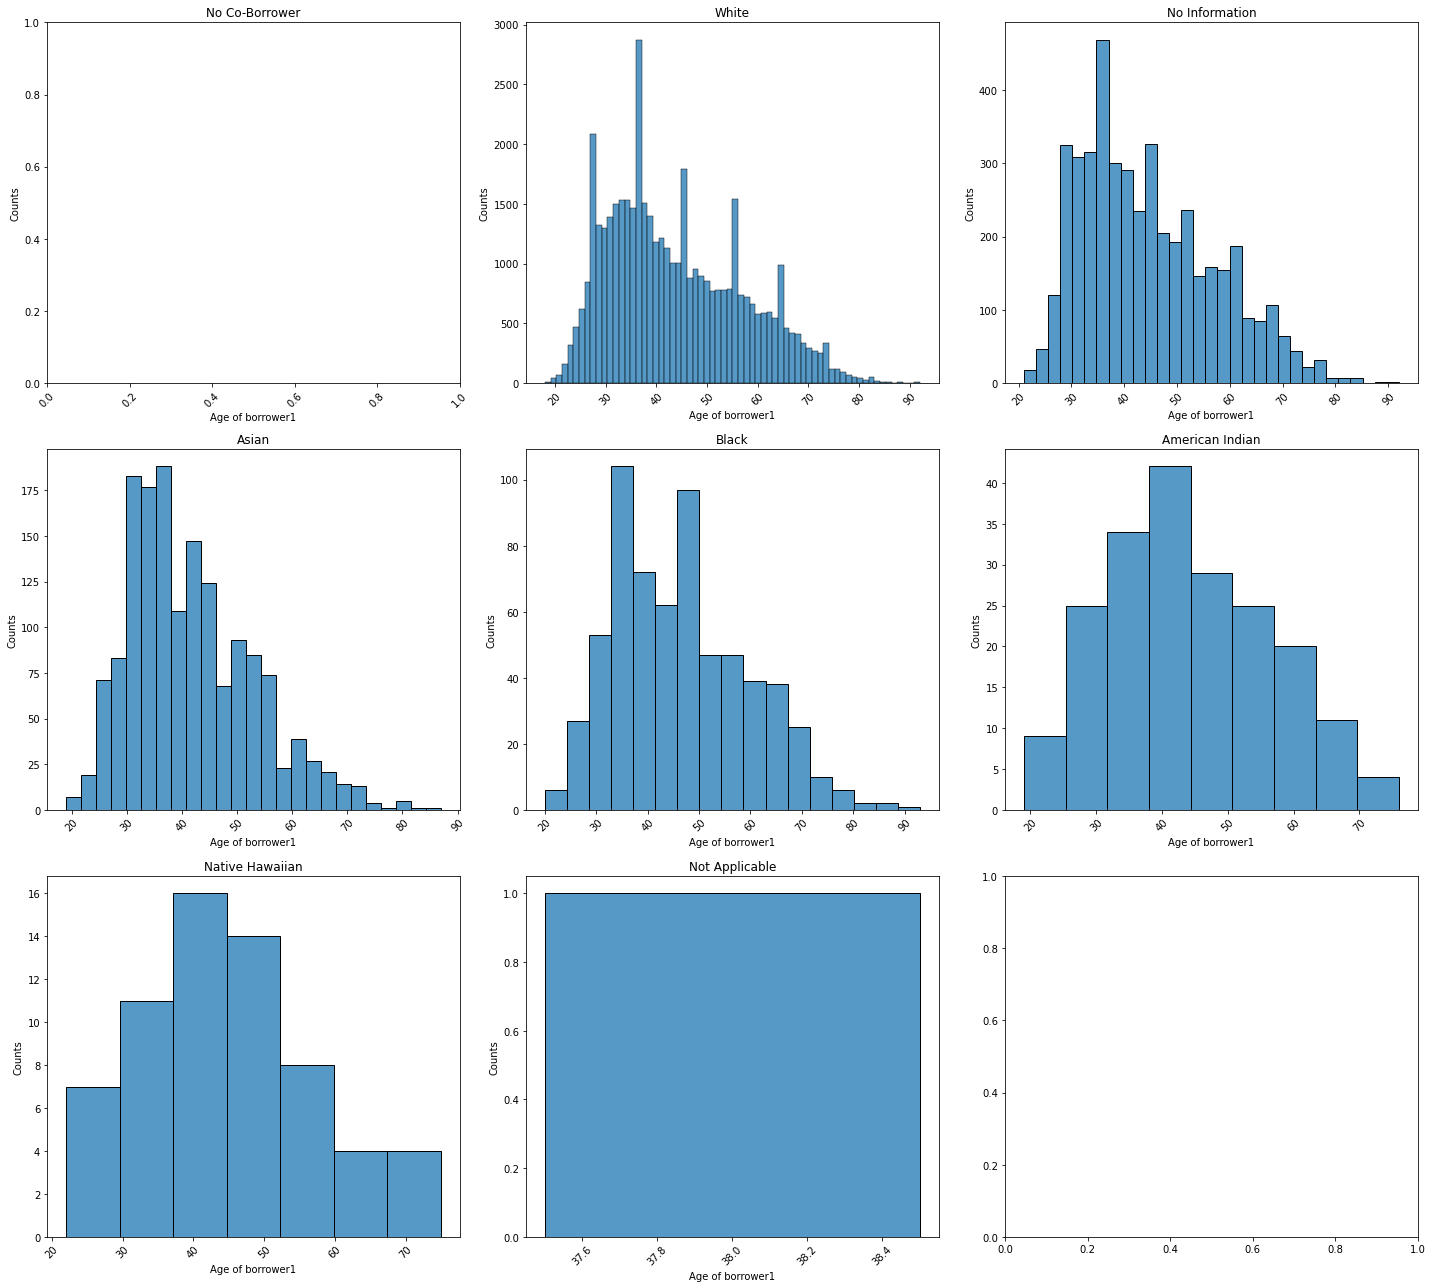

In [103]:
#Check the age of borrower2 
r=0
c=0
f, axes = plt.subplots(3, 3,figsize = (20,18))
for race in df_2019["Borrower2Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.histplot(x="Borrower2AgeAtApplicationYears",edgecolor="black", data=df_2019[(df_2019['Borrower2Race1Type']==race) & (df_2019["Borrower2AgeAtApplicationYears"]<100)],ax=axes[r, c])
    axes[r, c].set_xlabel('Age of borrower1')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show() 

Hence for co-borrower also most of the applicant have age between 20 and 80 years.

# Let check the usages of the property used for loan and see how is it related to race.
Numeric code indicating whether property is owner occupied, second home or a rental investment property. 
- 1=Principal Residence, 
- 2=Second Home, 
- 3=Investment Property

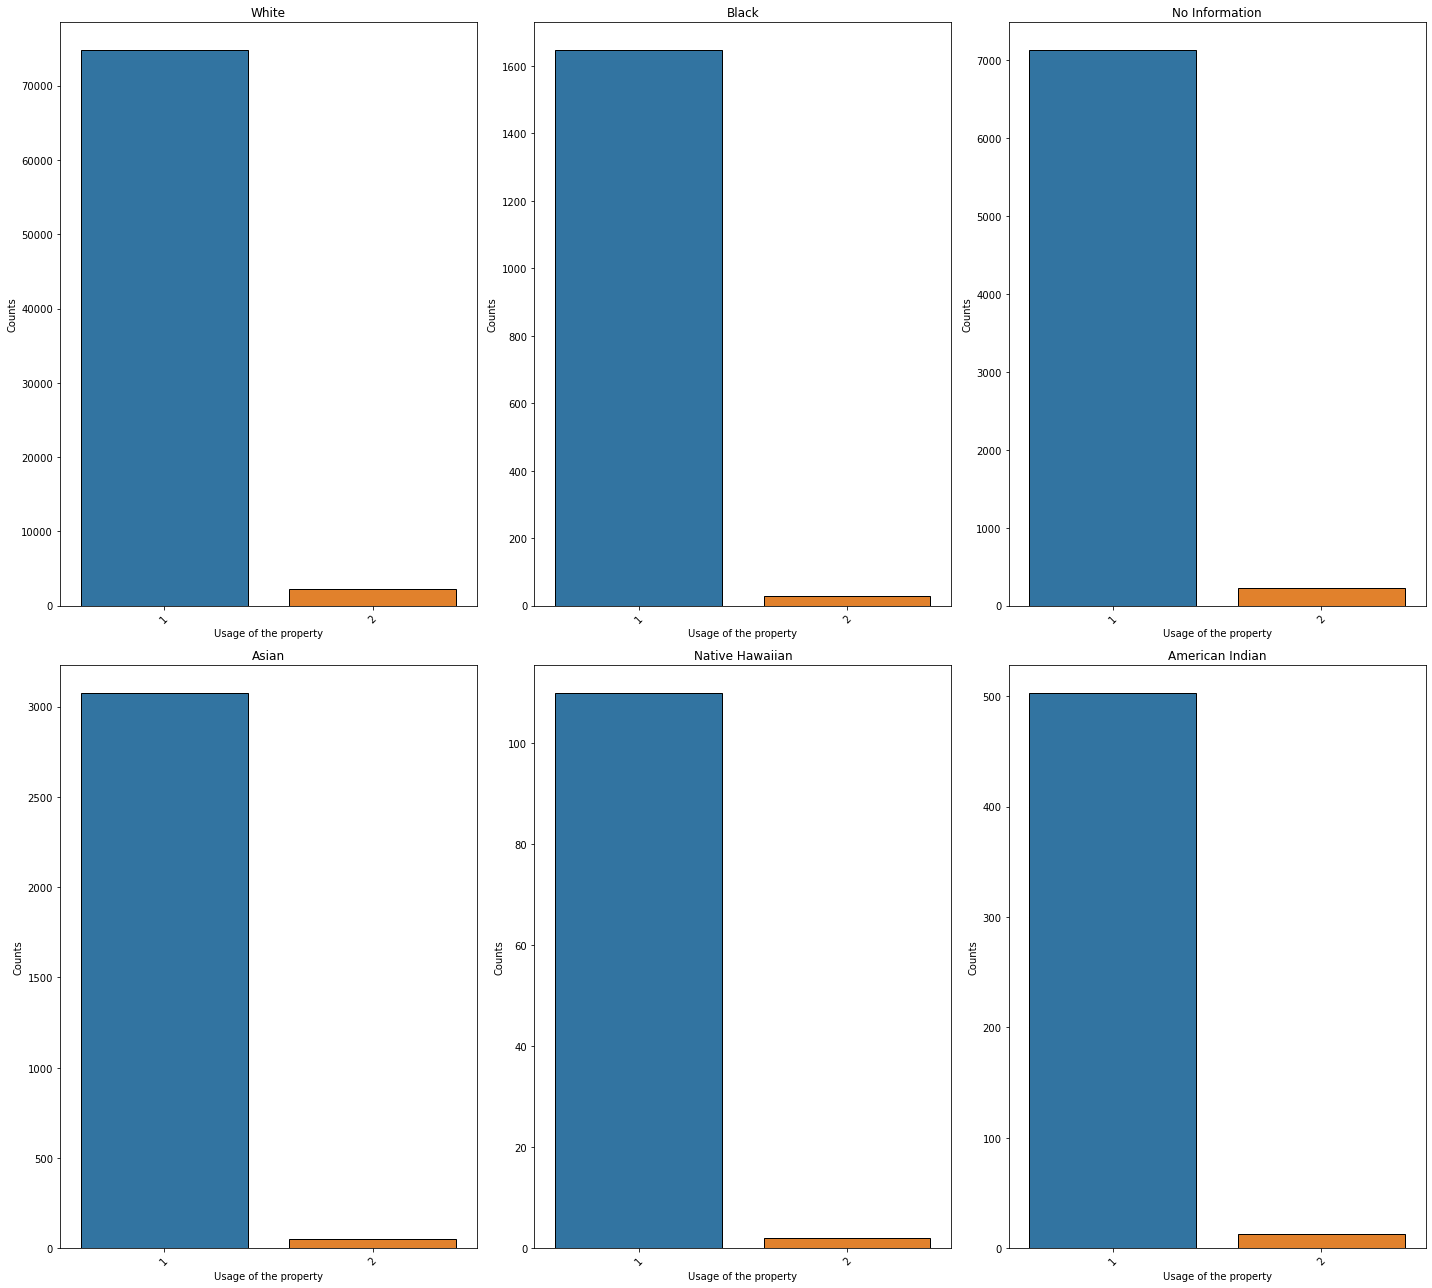

In [104]:
#check the propert usage type
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.countplot(x="PropertyUsageType",edgecolor="black", data=df_2019[df_2019['Borrower1Race1Type']==race],ax=axes[r, c])
    axes[r, c].set_xlabel('Usage of the property')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show() 

Hence we see similar patterns in all the races. For most of the loans, principle residence is used for mortgage.

# Let check the size of the property to see if there is any difference in the size of the property used to underwrite the loan for diffrent races.

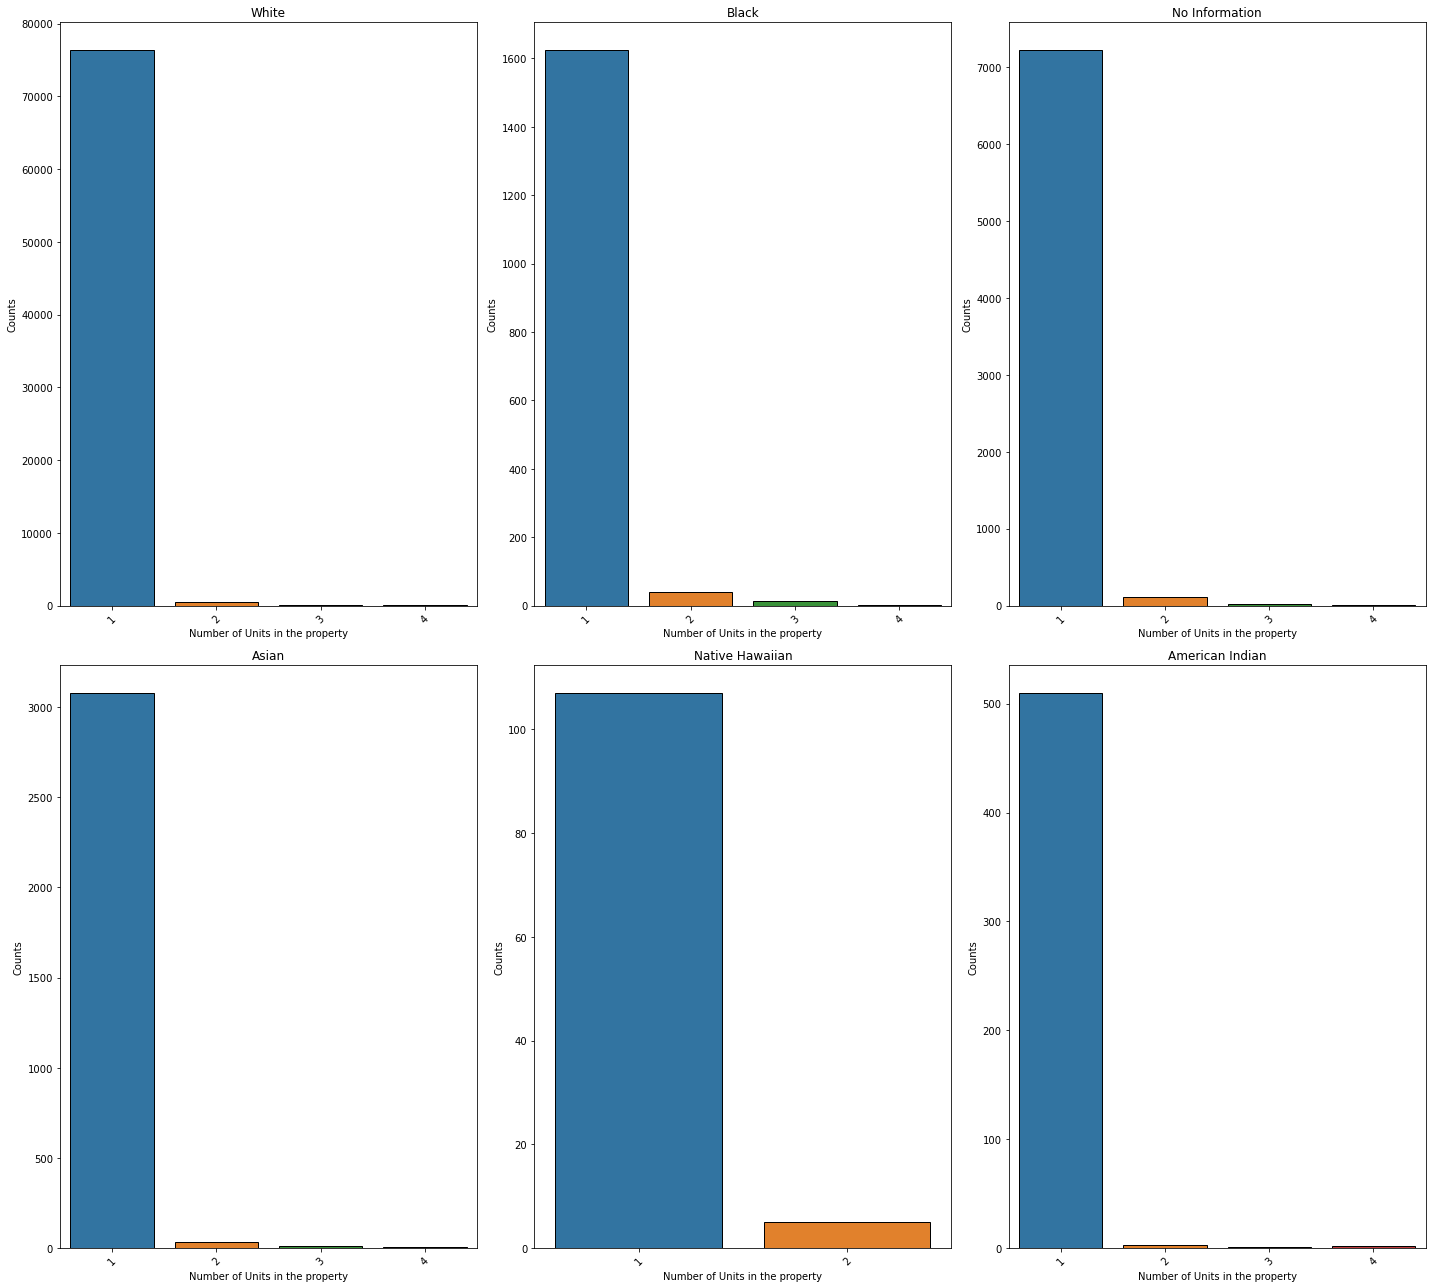

In [105]:
#Check the number of units present vs race
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.countplot(x="PropertyUnitCount",edgecolor="black", data=df_2019[df_2019['Borrower1Race1Type']==race],ax=axes[r, c])
    axes[r, c].set_xlabel('Number of Units in the property')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show() 

Hence almost all the properties have 1 unit present in the property.

# Let's check if interest rate have any relationship with race.

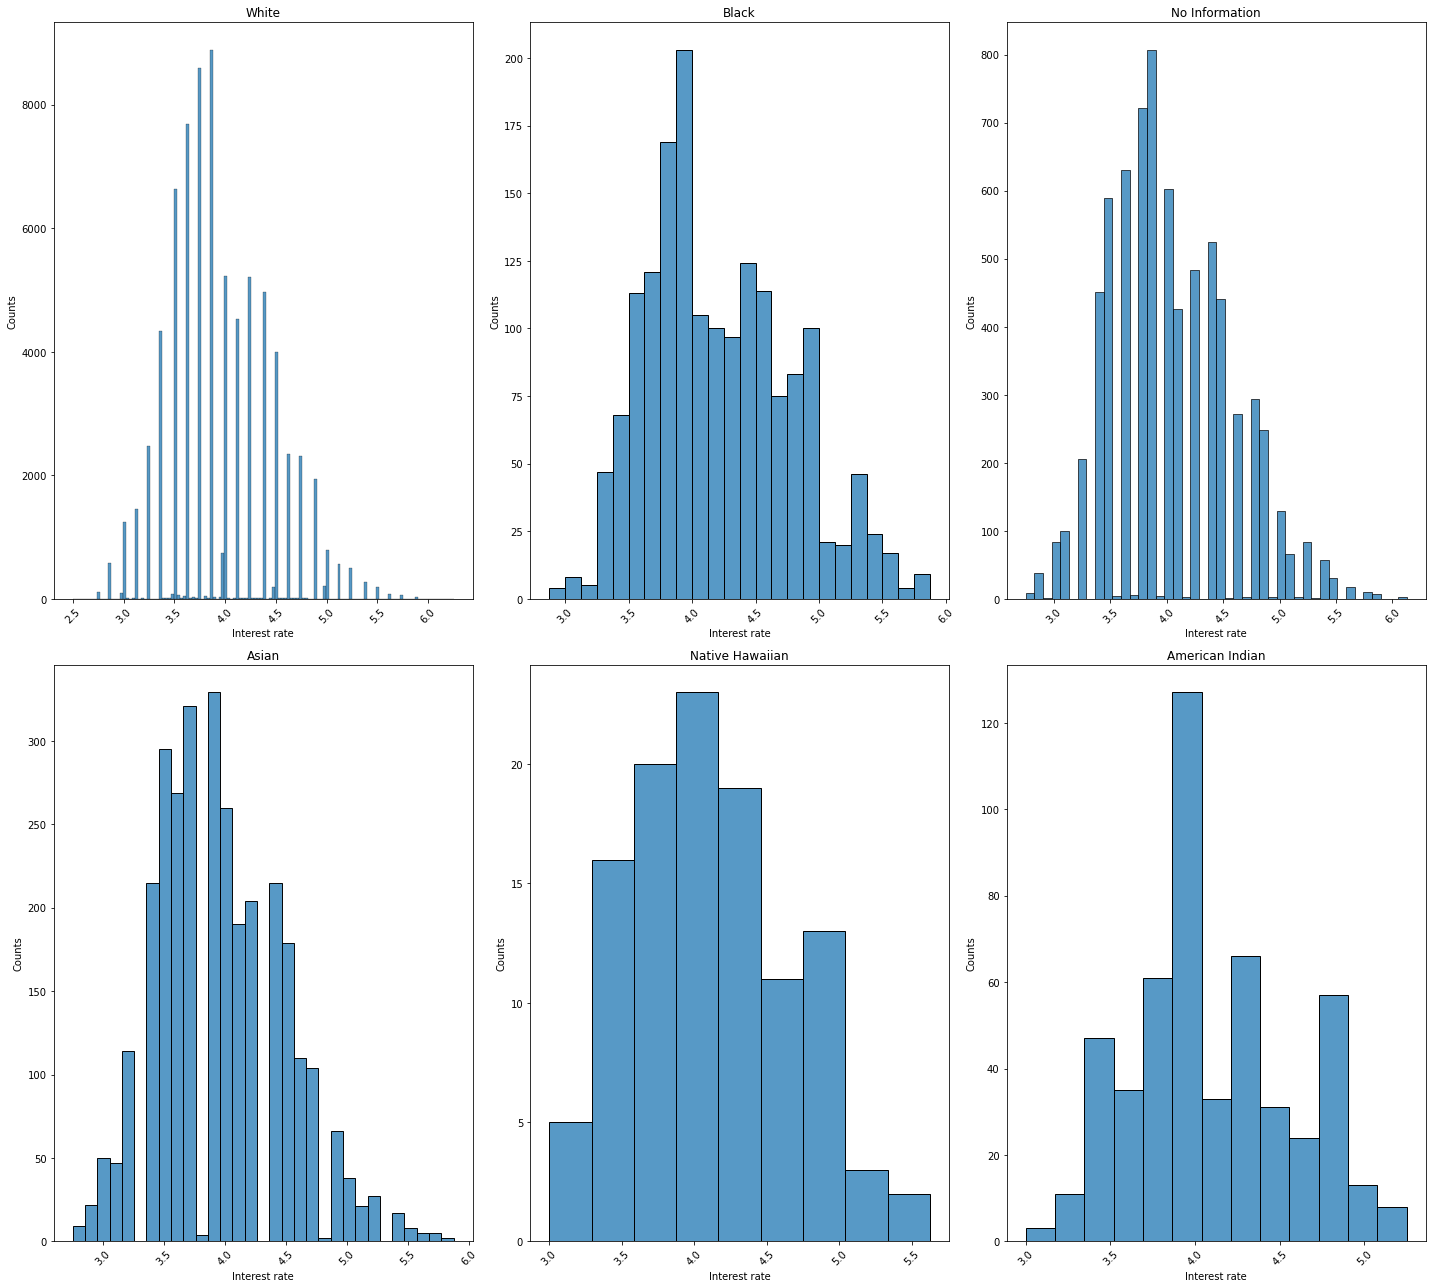

In [106]:
#Check interest rate vs race.
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.histplot(x="NoteRatePercent",edgecolor="black", data=df_2019[df_2019['Borrower1Race1Type']==race],ax=axes[r, c])
    axes[r, c].set_xlabel('Interest rate')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show() 

Hence we see similar pattern in the intrest rate for all the races.

# Check if Note Amount has anything have to do with race.

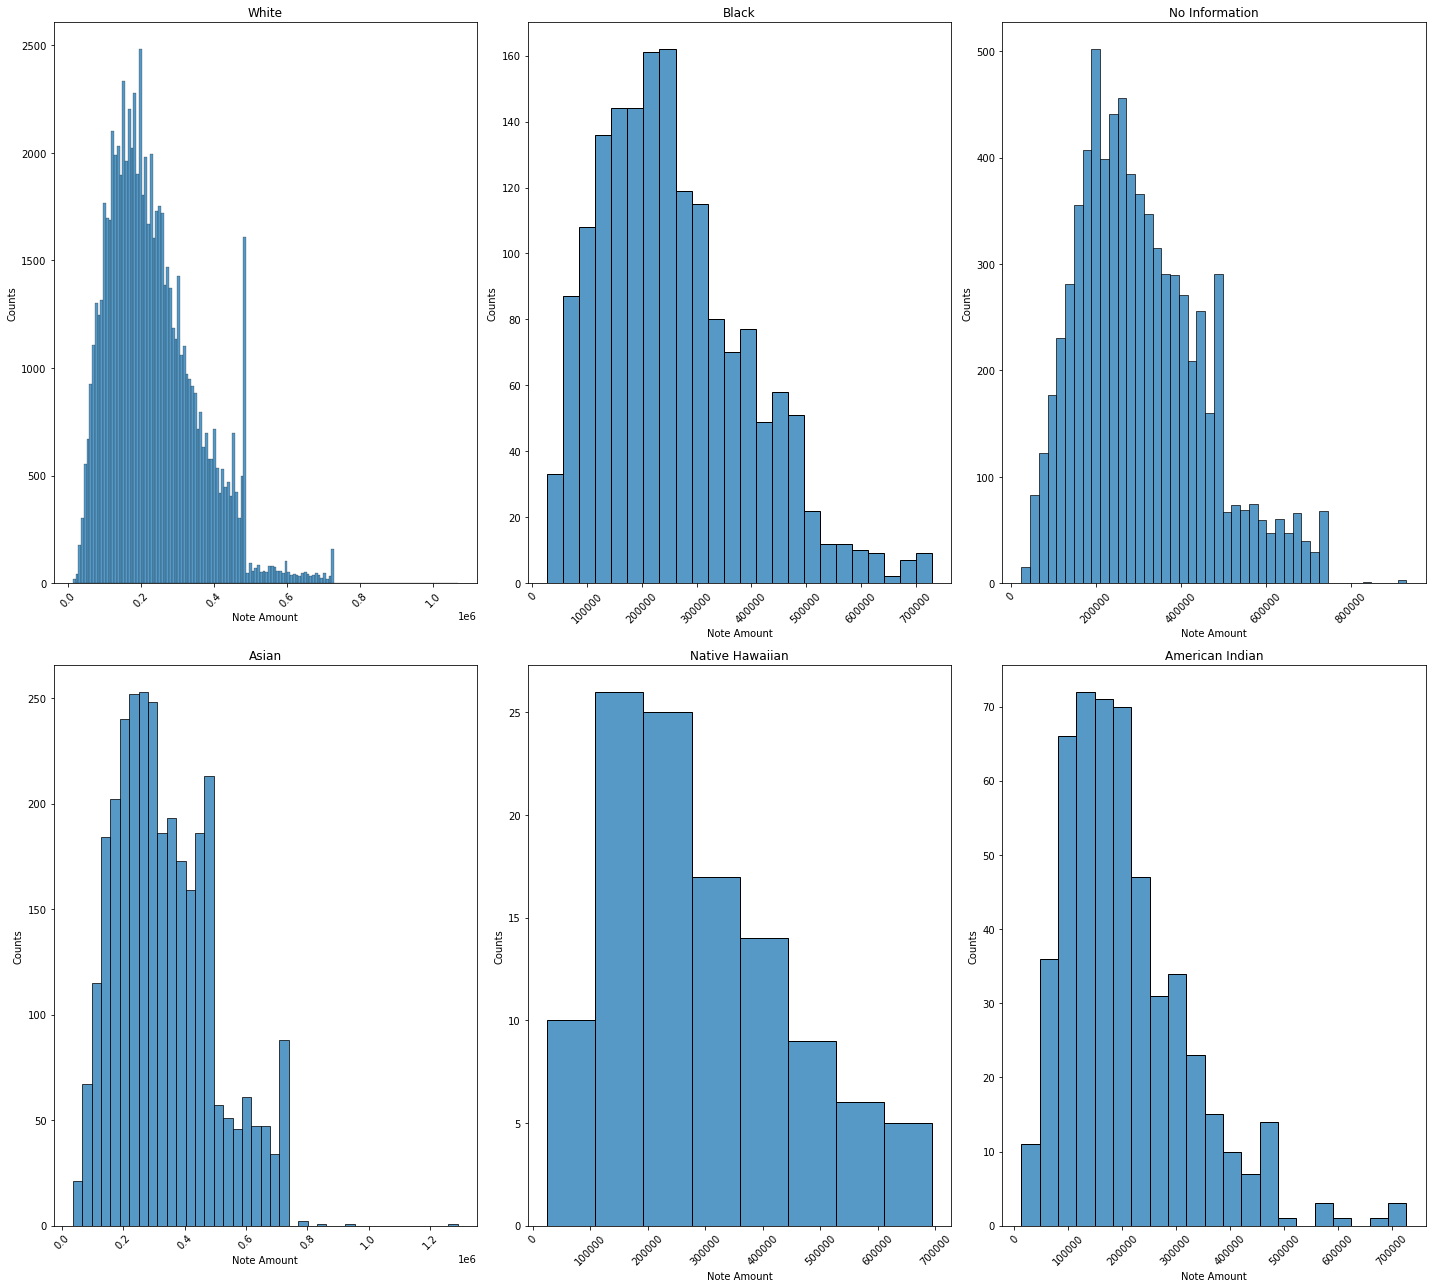

In [107]:
#Check interest rate vs race.
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.histplot(x="NoteAmount",edgecolor="black", data=df_2019[df_2019['Borrower1Race1Type']==race],ax=axes[r, c])
    axes[r, c].set_xlabel('Note Amount')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show() 

Hence all the races have similar pattern in note amount.

# Check if HousingExpenseRatioPercent (Ratio of mortgage principal and interest and housing expenses to total borrower income.) is equally distribuated for each race.

In [108]:
df_2019[df_2019['HousingExpenseRatioPercent']>100]['HousingExpenseRatioPercent']

59187    999.0
Name: HousingExpenseRatioPercent, dtype: float64

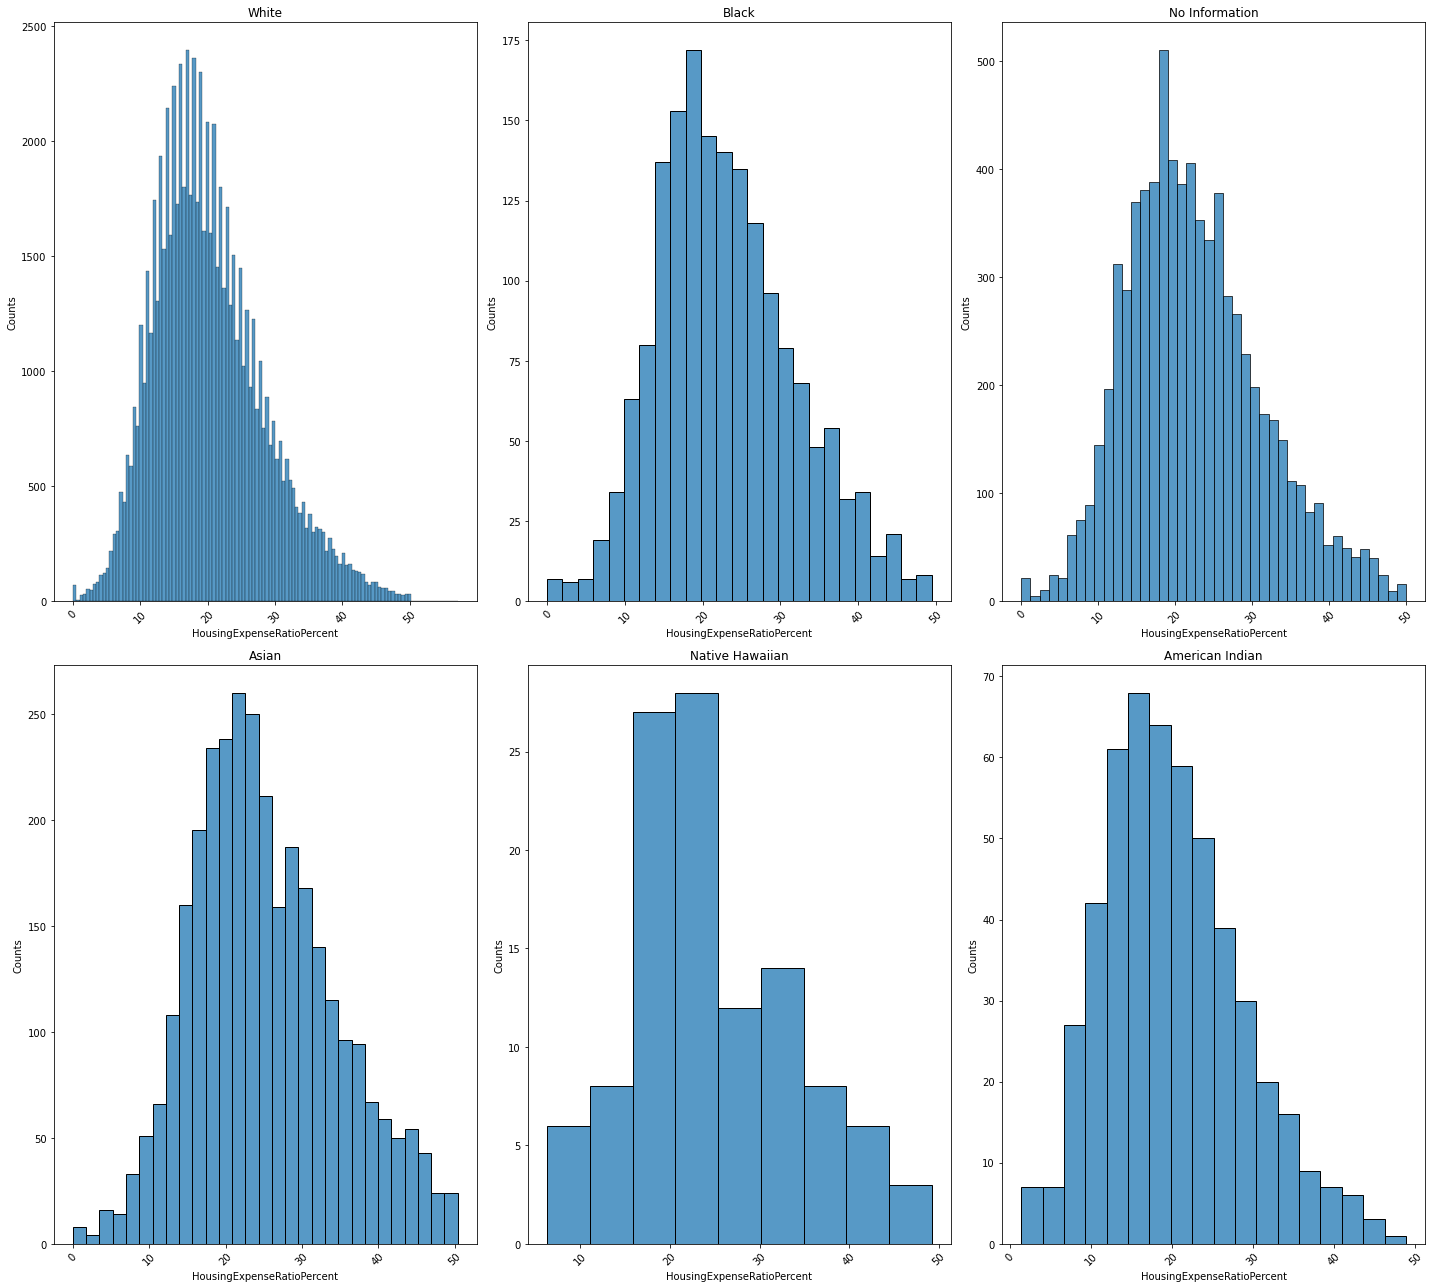

In [109]:
#Check HousingExpenseRatioPercent vs race.
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.histplot(x="HousingExpenseRatioPercent",edgecolor="black", data=df_2019[(df_2019['Borrower1Race1Type']==race)&(df_2019['HousingExpenseRatioPercent']<60)],ax=axes[r, c])
    axes[r, c].set_xlabel('HousingExpenseRatioPercent')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show()

Hence we see similar pattern in the Expense vs Income ratio for all the races.

# Now lets check if the total debt and income ratio is same for all the races.

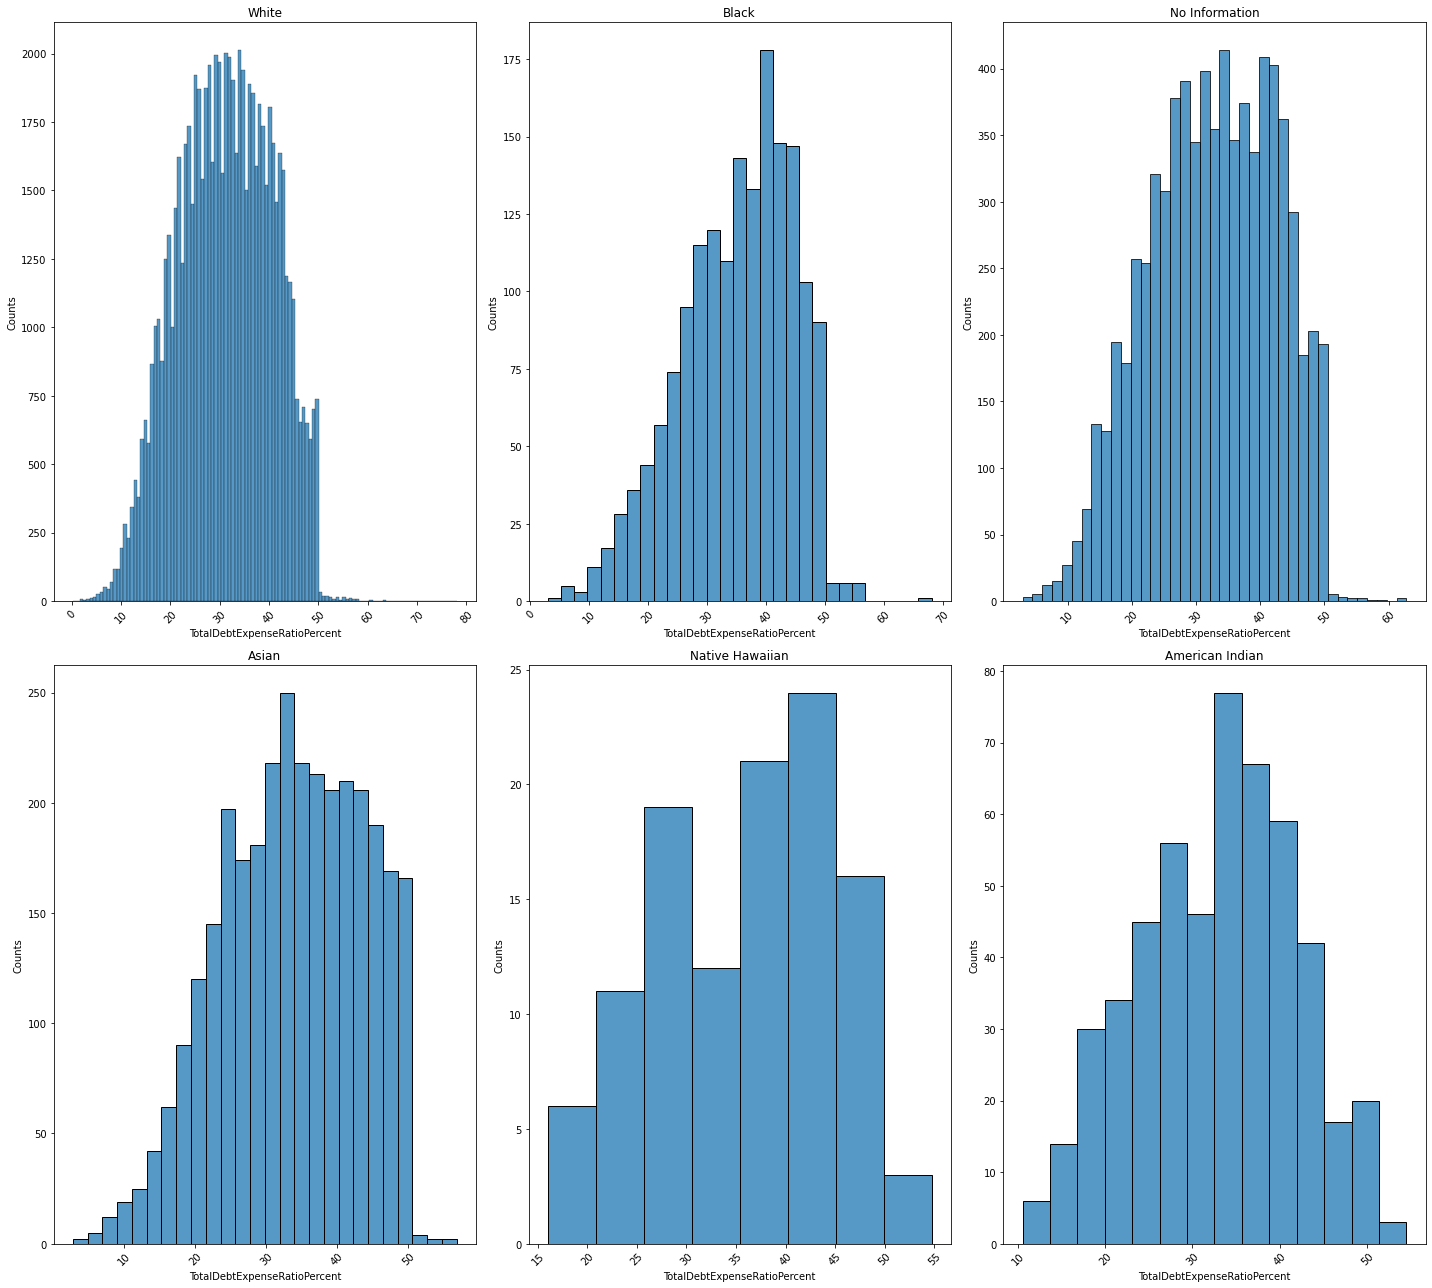

In [110]:
#Check HousingExpenseRatioPercent vs race.
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.histplot(x="TotalDebtExpenseRatioPercent",edgecolor="black", data=df_2019[(df_2019['Borrower1Race1Type']==race)],ax=axes[r, c])
    axes[r, c].set_xlabel('TotalDebtExpenseRatioPercent')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show()

Hence in most of the cases,all the races have total debt vs expense ratio is less than 50%. We also see that there is sharp decline in the count of the ratio after 45% which shows most of the loans are afforable as compared to monthly income. Since there decline in graph after 45% , lets check the distribuation of loans with debt vs expense ratio greater than 45% as compared to race of the borrower.

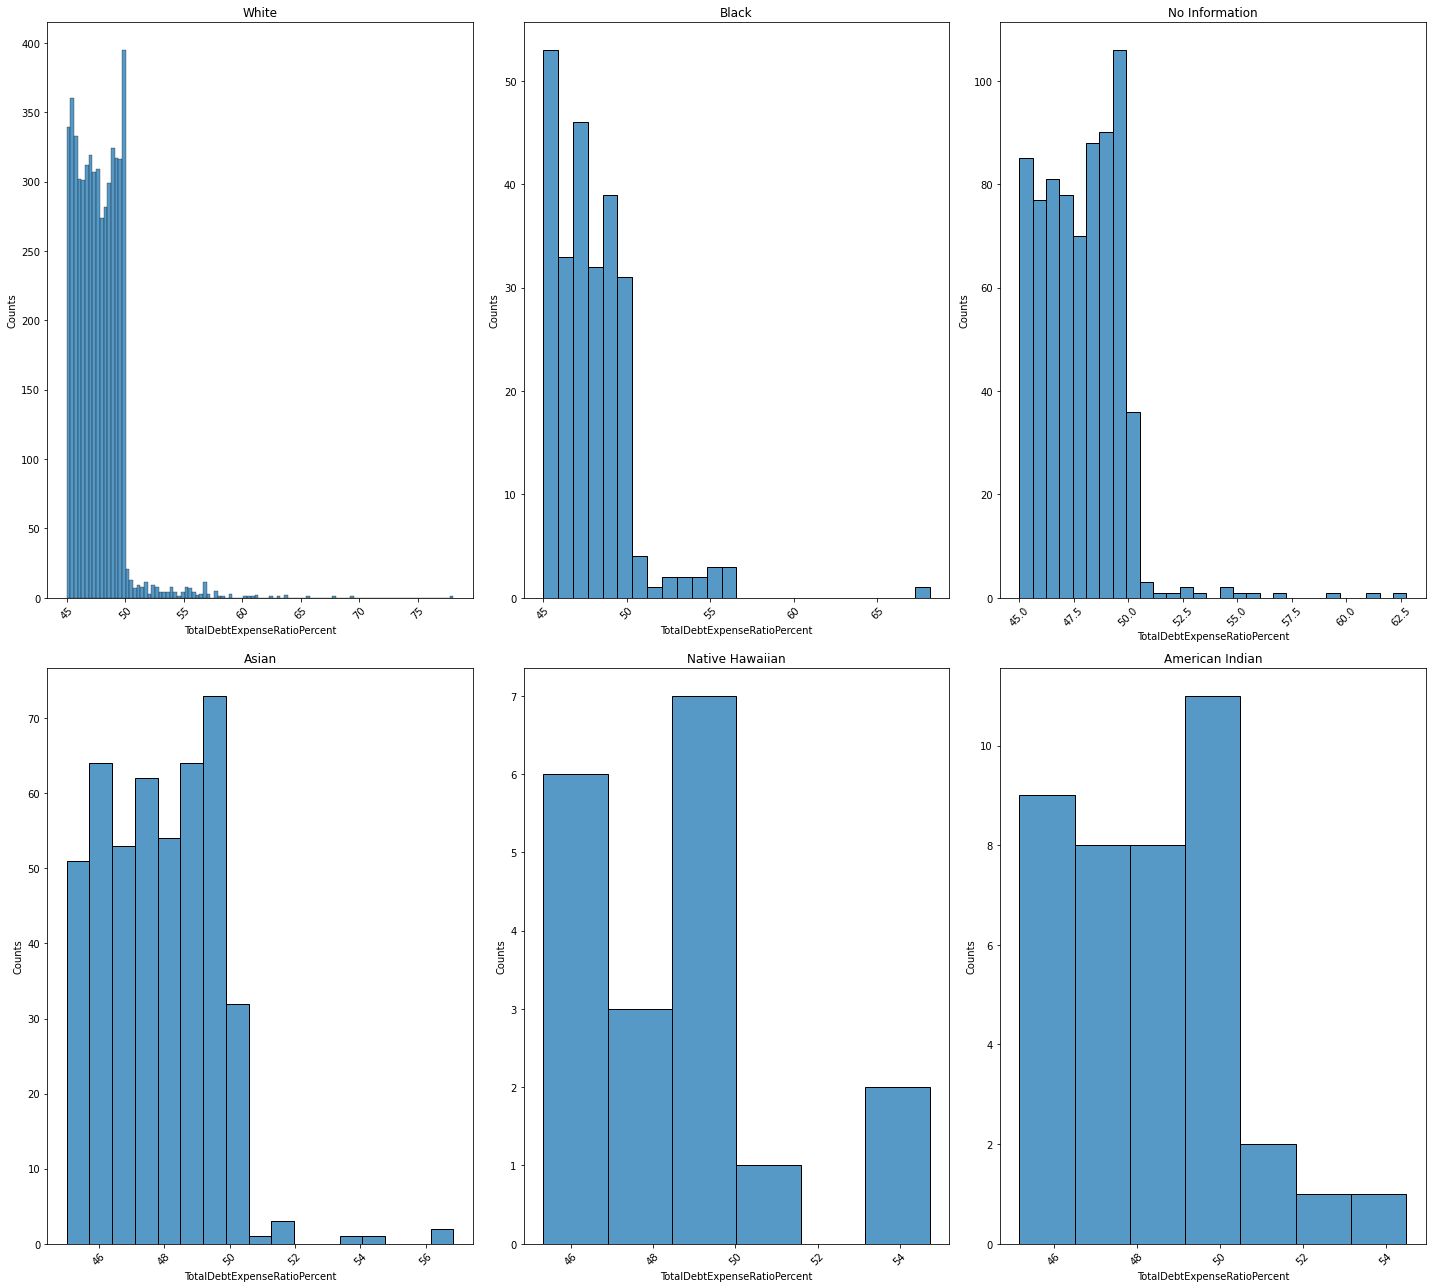

In [111]:
#Check HousingExpenseRatioPercent vs race.
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.histplot(x="TotalDebtExpenseRatioPercent",edgecolor="black", data=df_2019[(df_2019['Borrower1Race1Type']==race)&(df_2019['TotalDebtExpenseRatioPercent']>45)],ax=axes[r, c])
    axes[r, c].set_xlabel('TotalDebtExpenseRatioPercent')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show()

So even for high debt vs income ratio have similar distribution of the TotalDebtExpenseRatioPercent in all the races.

# Check if Borrower1CreditScoreValue has anything do to with race of the borrower.
Credit Scores are separated into a range: 
- 1=<620, 
- 2=620 < 660, 
- 3=660 < 700, 
- 4=700 < 760, 
- 5=760 or greater, 
- 9 = Missing or Not Applicable

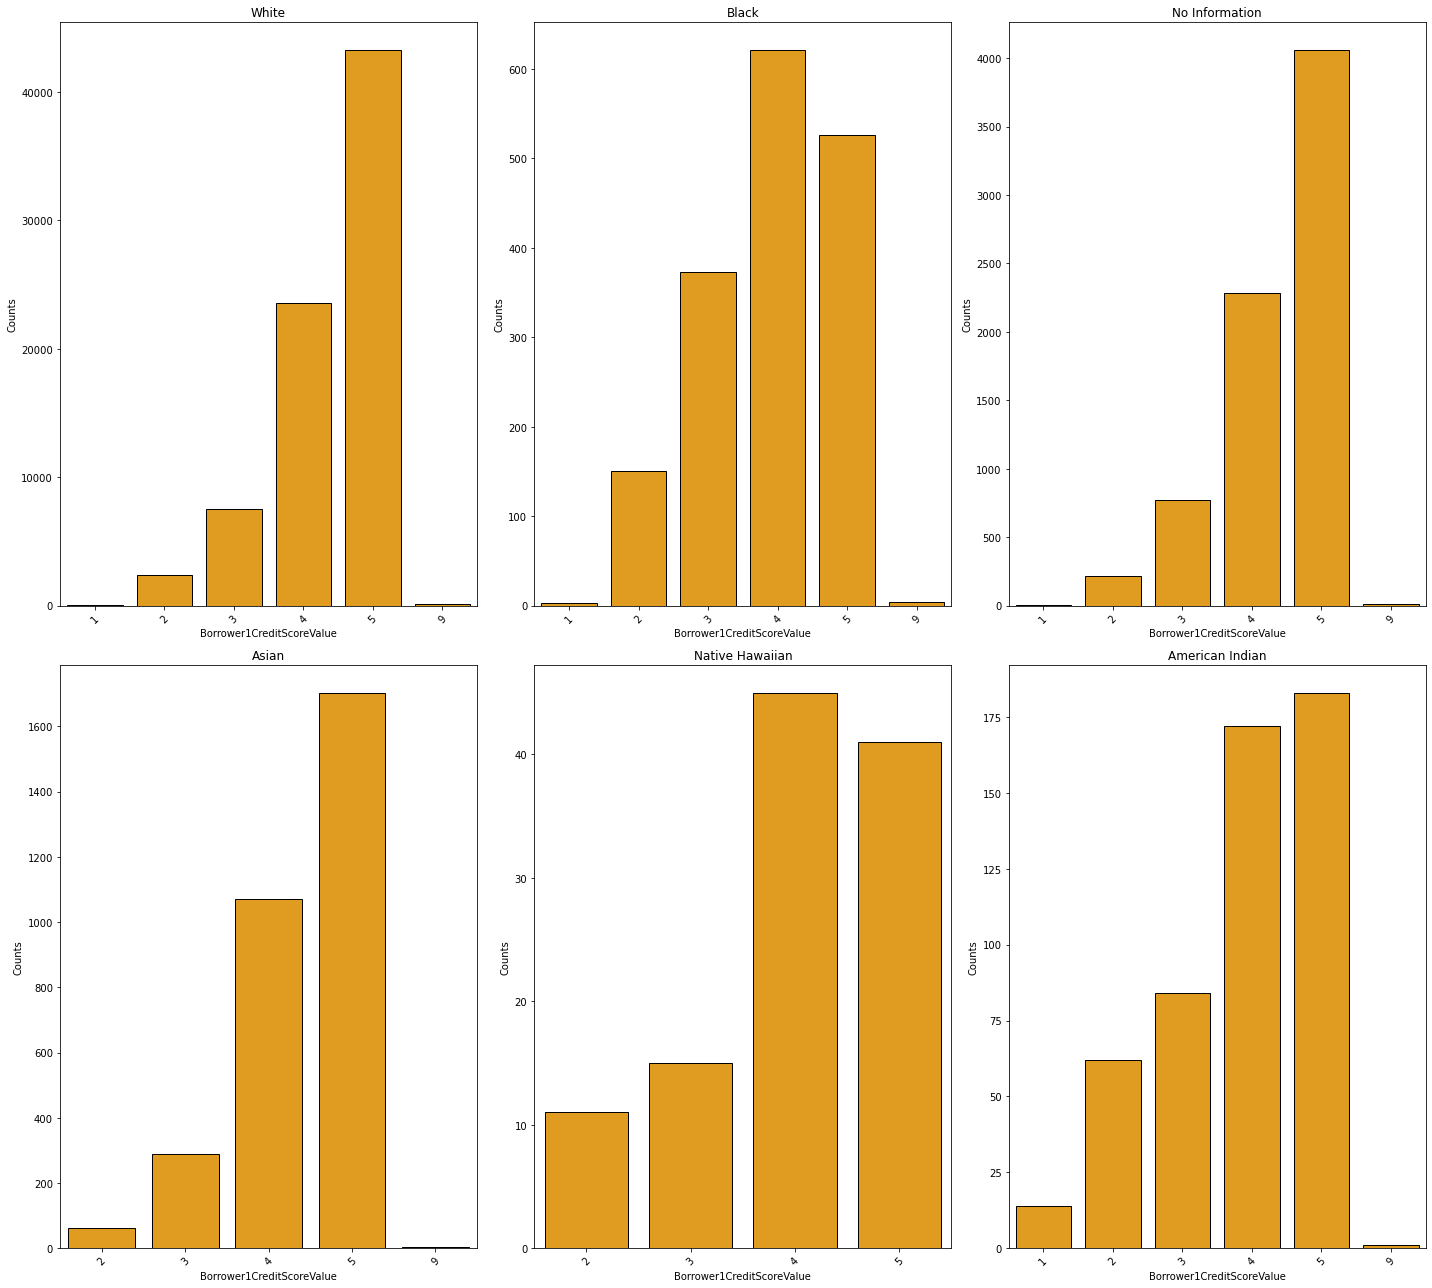

In [112]:
#Check HousingExpenseRatioPercent vs race.
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.countplot(x="Borrower1CreditScoreValue",edgecolor="black",color='orange', data=df_2019[(df_2019['Borrower1Race1Type']==race)],ax=axes[r, c])
    axes[r, c].set_xlabel('Borrower1CreditScoreValue')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show()

Hence we see different pattern in the credit score for different races. White and Asian have high number of borrowers with credit score group 5 whereas for Black and Native Hawaiian, large number of borrowers  falls in group 4 and 5. American Indian have large number of borrowers fall in group 4 and 5 with maximum numbers of borrowers in group 5.

## Let's check the credit score of Borrower2 for any racial disparity.

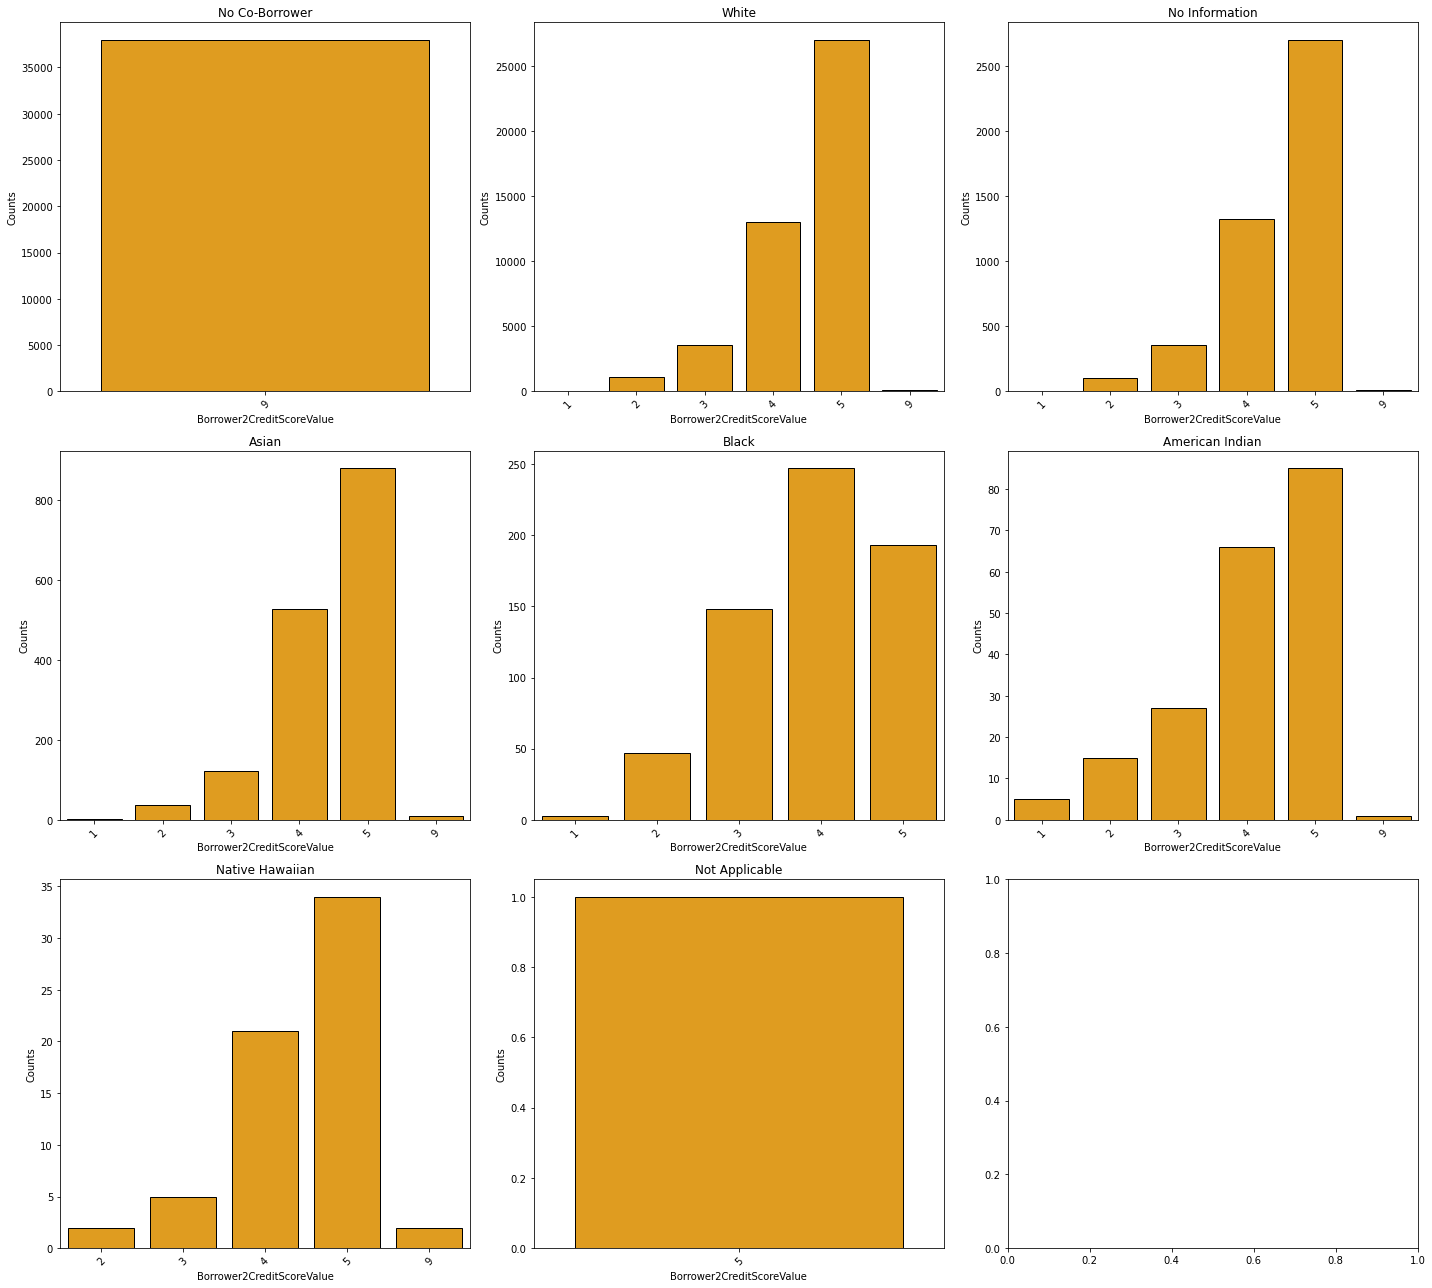

In [113]:
#Check HousingExpenseRatioPercent vs race.
r=0
c=0
f, axes = plt.subplots(3, 3,figsize = (20,18))
for race in df_2019["Borrower2Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.countplot(x="Borrower2CreditScoreValue",edgecolor="black",color='orange', data=df_2019[(df_2019['Borrower2Race1Type']==race)],ax=axes[r, c])
    axes[r, c].set_xlabel('Borrower2CreditScoreValue')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show()

For Borrower 2 , we see similar pattern in the credit score for White,Asian ,American Indian,Native Hawaiian. For Black community there is high number of borrowers are from group 4.

# Lets check if how much PMI covered on mortgage loan is related to the race of the borrower.
For more about PMI refer to this link: https://www.bankrate.com/mortgages/basics-of-private-mortgage-insurance-pmi/


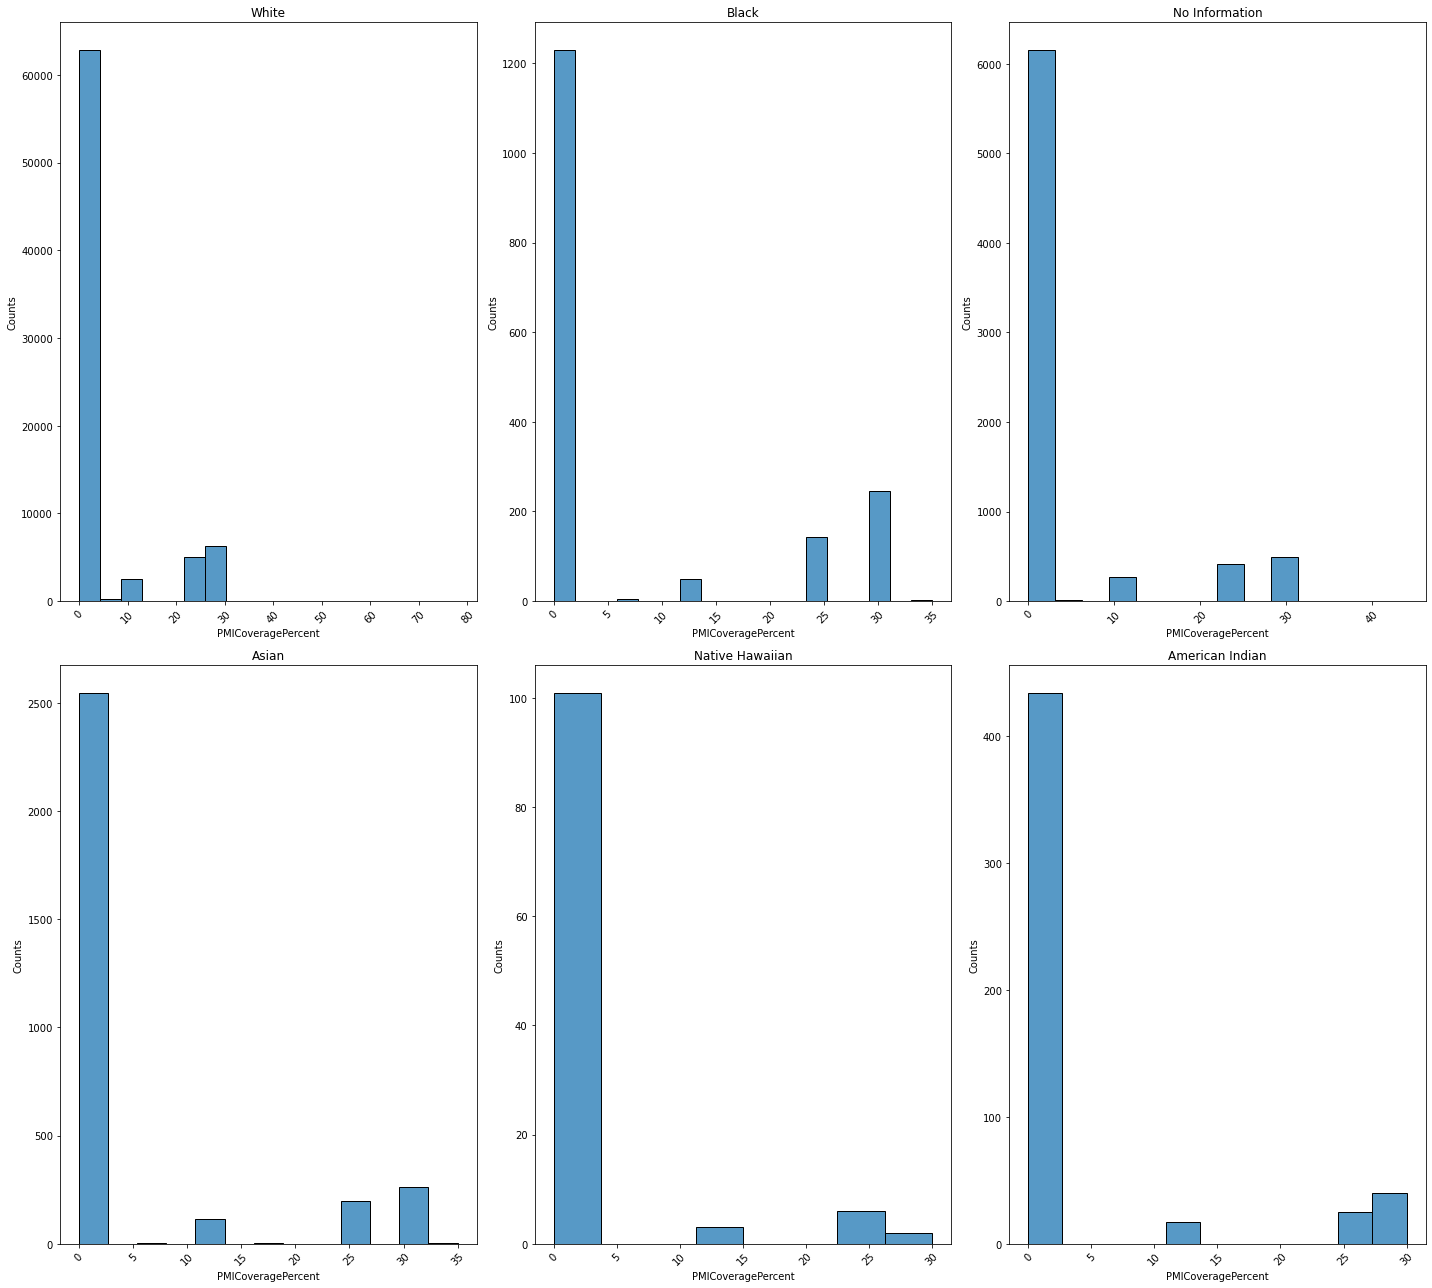

In [114]:
#Check HousingExpenseRatioPercent vs race.
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.histplot(x="PMICoveragePercent",edgecolor="black", data=df_2019[(df_2019['Borrower1Race1Type']==race)],ax=axes[r, c])
    axes[r, c].set_xlabel('PMICoveragePercent')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show()

Hence we see similar pattern of PMI percentage in all the races. 

# Lets check if what are Index source type used for diffrent races.
For more information about Index Source Type refer this link: https://www.investopedia.com/terms/m/mortgageindex.asp

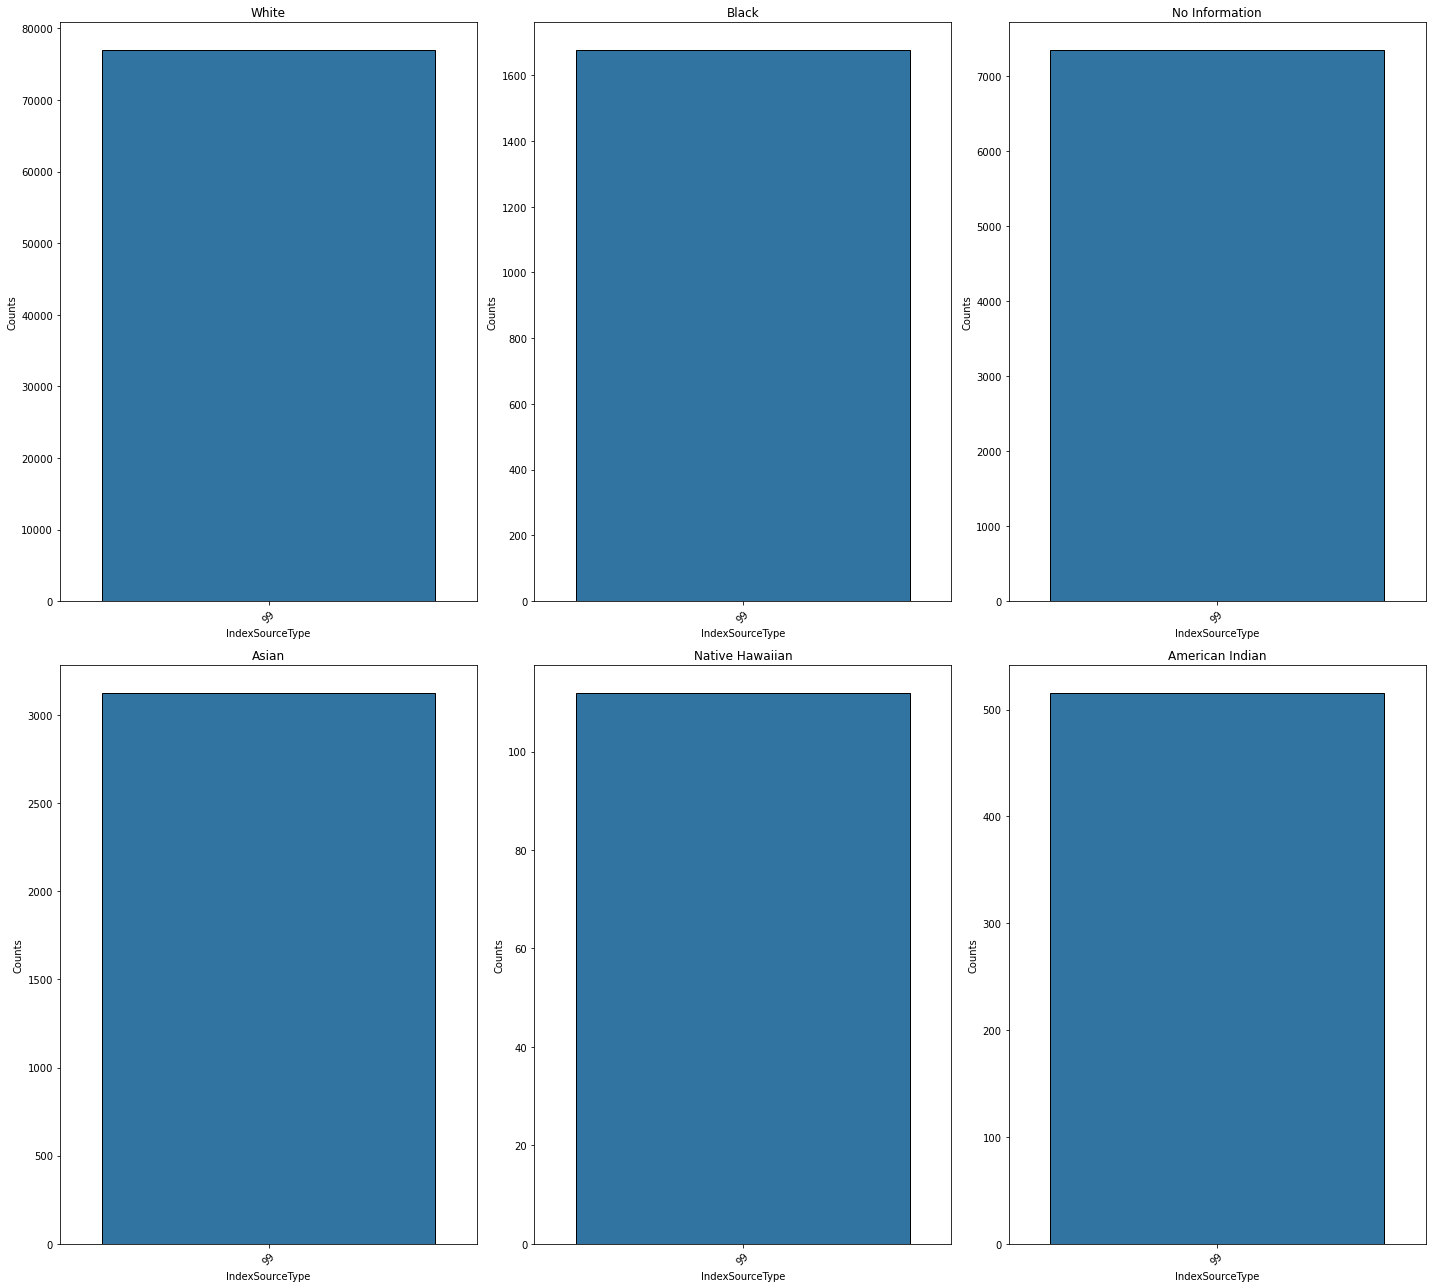

In [115]:
#Check HousingExpenseRatioPercent vs race.
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.countplot(x="IndexSourceType",edgecolor="black", data=df_2019[(df_2019['Borrower1Race1Type']==race)],ax=axes[r, c])
    axes[r, c].set_xlabel('IndexSourceType')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show()

Hence all the loans are not ARM loans. Therefore we can't find any relationship with race. We can drop IndexSourceType,MarginRatePercent columns , since they do not serve any purpose.

In [116]:
#Drop IndexSourceType,MarginRatePercent columns
df_2019.drop(columns=['IndexSourceType', 'MarginRatePercent'],inplace=True)

# Lets check if the mortgage is of high cost or low cost and how is this related to race.
More about HOEPA Loan Status Type can be found here : https://www.nolo.com/legal-encyclopedia/new-protections-high-cost-mortgages.html

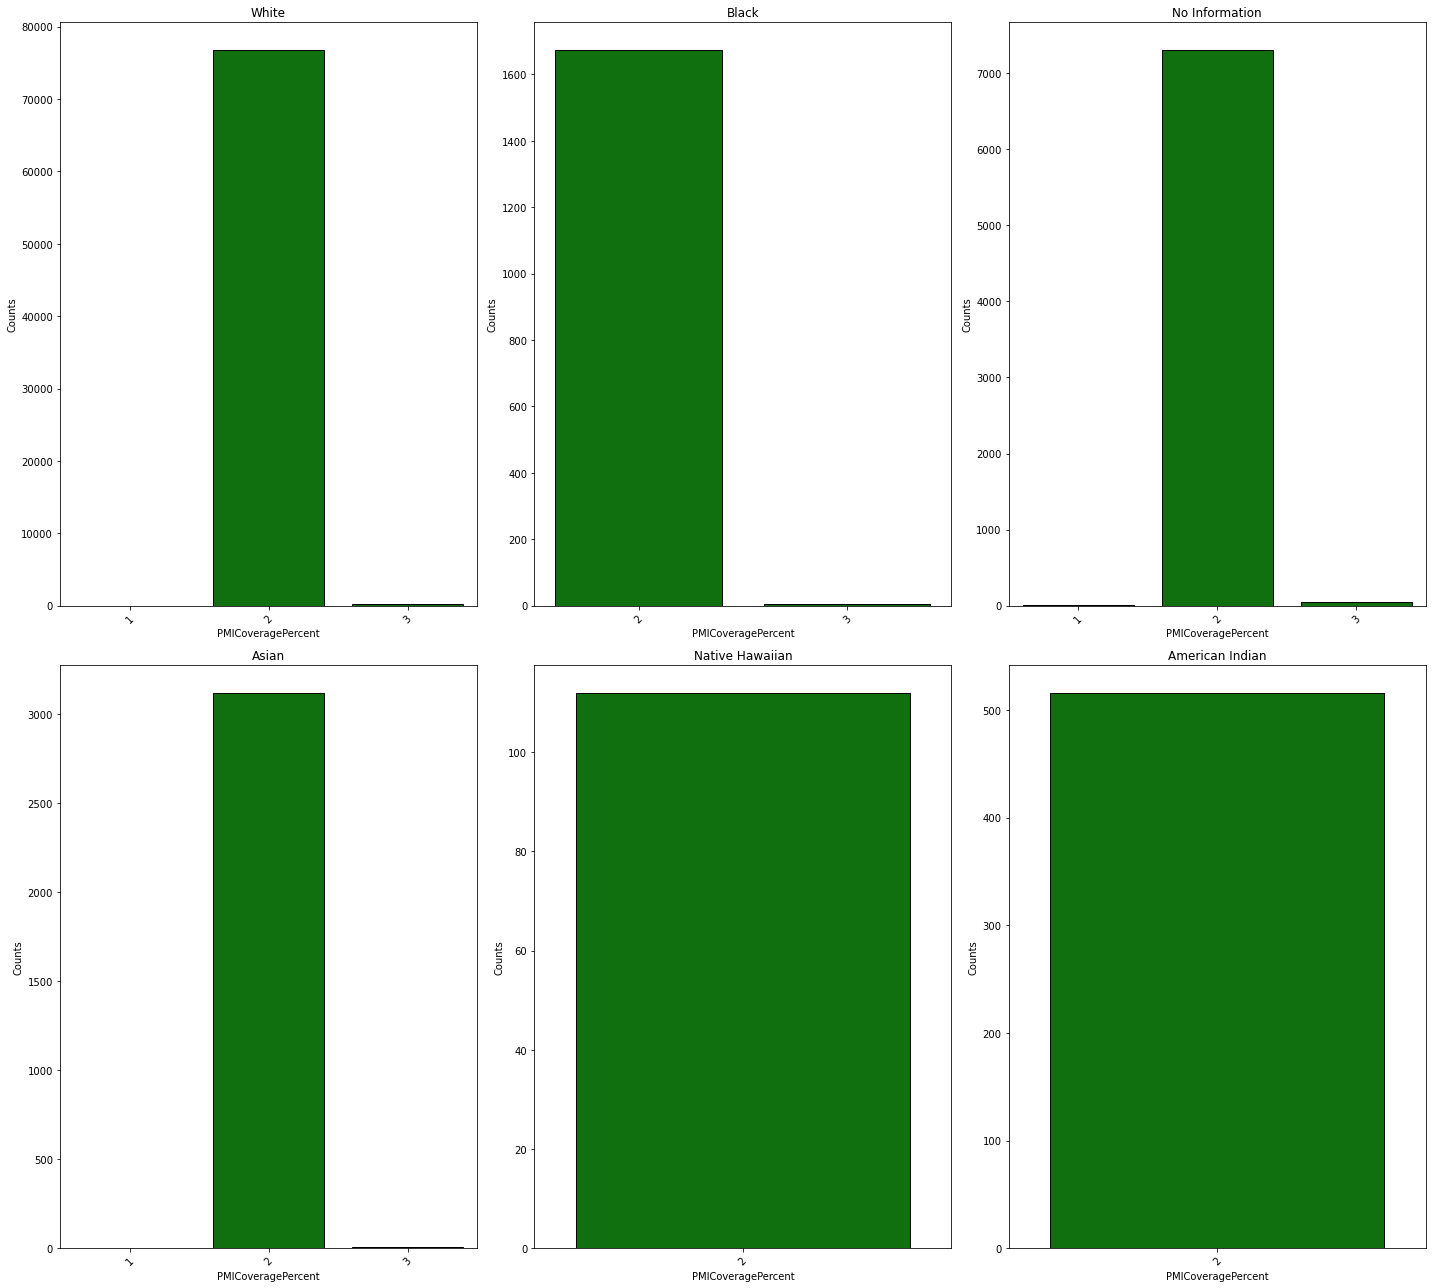

In [117]:
#Check HousingExpenseRatioPercent vs race.
r=0
c=0
f, axes = plt.subplots(2, 3,figsize = (20,18))
for race in df_2019["Borrower1Race1Type"].unique():
    if c>2:
        r=r+1
        c=0
    sns.countplot(x="HOEPALoanStatusType",edgecolor="black",color='green',data=df_2019[(df_2019['Borrower1Race1Type']==race)],ax=axes[r, c])
    axes[r, c].set_xlabel('HOEPALoanStatusType')
    axes[r, c].set_ylabel('Counts')
    plt.setp(axes[r, c].xaxis.get_majorticklabels(), rotation=45)
    axes[r, c].set_title(race)
    c=c+1
f.tight_layout()
plt.show()

Hence almost all the loans for all the races are of Not a High-Cost Mortgage type.

In [121]:
#Save the dataframe
df_2019.to_csv("Data/loan_2019_feature.csv",index=False)

# Summary
Here is the overall results found from above analysis.

1. Most loans have a maximum of 2 borrowers so focus on the race of the first two borrowers.
2. There are high numbers of White borrowers compared to other races.
3. Most Banks are from Chicago, Topeka, and Des Moines and all the cities have the majority of white borrowers to whom the loan was approved.
4. All the states are having a similar distribution of race with a majority of the white race except states with state codes 15 and 66.
5. A major disparity is found in areas with a high percentage of the minority population. In this area majority of borrowers are white even if the majority population in the area is a minority.
6. The difference between local area median income and Total monthly income used to underwrite the loan follow the same pattern for all the races. Therefore there is no disparity
based on income. 
7.  All the races have got most of the loans worth 80% of the property value except American Indians who got most of the loans worth 90% of the property value which may
indicate some disparity.
8.  The major purpose of borrowing the loan for all the races is the purchase and the most popular loan among all races is the Conventional loan.
9.  Majority of white and native Hawaiian loans have co-borrowers whereas all the other races have majority loans with one borrower.
10. Most of the borrowers are male and borrower's ages lie between 20 and 80 years and the number of loans approved tends to decrease after age 35. 
11. Intrest rate seems to be following a similar pattern for all the races.
12. NoteAmount, HousingExpenseRatioPercent, TotalDebtExpenseRatioPercent have a similar pattern for all the races.
13.  We see a different pattern in the credit score for different races. White and Asian have a high number of borrowers with credit score group 5 whereas, for Black and Native Hawaiian, a large number of borrowers falls in groups 4 and 5. American Indians have a large number of borrowers fall in groups 4 and 5 with maximum numbers of borrowers in group 5.